In [1]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

ncfile='/project2/tas1/pragallva/Fall_quarter_2018/exp_data/precip/HC0_la4m_oc4m/HC0_la4m_oc4m0.nc'
v_var=nc.Dataset(ncfile,'r')
sigma_full=v_var['pfull'][::-1]
sigma_half=v_var['phalf'][::-1]
lat_nc=v_var['lat']

In [2]:
ls /project2/tas1/pragallva/Fall_quarter_2018/exp_data/precip

HC0_la100m_oc100m/  HC0_la30m_oc30m/  HC0_la8m_oc8m/    HC30_la50m_oc5m/
HC0_la10m_oc10m/    HC0_la4m_oc4m/    HC10_la50m_oc5m/  HC30_la5m_oc50m/
HC0_la12m_oc12m/    HC0_la50m_oc50m/  HC10_la5m_oc50m/
HC0_la16m_oc16m/    HC0_la5m_oc5m/    HC20_la50m_oc5m/
HC0_la20m_oc20m/    HC0_la80m_oc80m/  HC20_la5m_oc50m/


#### Load files

In [3]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

m4      = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/*.hkl'))
m5      = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/*.hkl'))
m8      = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la8m_oc8m/*.hkl'))
m10     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la10m_oc10m/*.hkl'))
m12     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la12m_oc12m/*.hkl'))
m16     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la16m_oc16m/*.hkl'))
m20     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la20m_oc20m/*.hkl'))
m30     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la30m_oc30m/*.hkl'))
m50     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la50m_oc50m/*.hkl'))
m80     = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la80m_oc80m/*.hkl'))
m100    = (glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la100m_oc100m/*.hkl'))
sea_ice = (glob.glob('/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/seaice_isca_landice55_z0/*.hkl'))

In [9]:
# hkl.load(m4[0])

In [6]:
# hkl.load(m4[1])

In [19]:
coord=hkl.load(m4[5])
coord.keys()

['plev', 'lon', 'p_sfc', 'no_of_plevels', 'time', 'lat']

In [21]:
# coord['plev']

#### Combine all depths

In [4]:
DEPTHS       = [m4, m5, m8, m10, m12, m16, m20, m30, m50, m80, m100, sea_ice]
depth_values = [4,   5,  8,  10,  12,  16,  20,  30,  50,  80,  100,     999]
flux=[]
flux_vert=[]
div=[]
div_vert=[]
eke=[]
raw=[]
tsurf=[]
mmc_decomp=[]
mmc_decomp_vert=[]
tend_Wm2=[]
tend_PW=[]

c=5
coord=load(m5[c])
for depth in DEPTHS:           
        if (depth==sea_ice) :
            f=0; e=1; r=2; fv=3; c=4; d=5; dv=6; 
            eke.append(load(depth[e]))
            raw.append(load(depth[r]))
            flux.append(load(depth[f]))
            flux_vert.append(load(depth[fv]))
            div.append(load(depth[d])) 
            div_vert.append(load(depth[dv]))
#             mmc_decomp.append(load(depth[mmc]))
#             mmc_decomp_vert.append(load(depth[mmcv]))
            tend_Wm2.append(load(m5[twm2]))
            tend_PW.append(load(m5[tpw]))
        
        elif ((depth==m5) | (depth==m50)| (depth==m8)| (depth==m10)| (depth==m30)| (depth==m100)):
#             print depth
            f=0; e=1; mmcv=2; r=3; fv=4; twm2=5; c=6; d=7; dv=8; mmc=9; tpw=10
            eke.append(load(depth[e]))
            mmc_decomp.append(load(depth[mmc]))
            mmc_decomp_vert.append(load(depth[mmcv]))
            raw.append(load(depth[r]))
            flux.append(load(depth[f]))
            flux_vert.append(load(depth[fv]))
            div.append(load(depth[d])) 
            div_vert.append(load(depth[dv]))
            tend_Wm2.append(load(depth[twm2]))
            tend_PW.append(load(depth[tpw]))

        else:
            f=0; e=1; mmcv=2; r=3; fv=4; c=5; d=6; dv=7; mmc=8; twm2=5; tpw=10
            eke.append(load(depth[e]))
            mmc_decomp.append(load(depth[mmc]))
            mmc_decomp_vert.append(load(depth[mmcv]))
            raw.append(load(depth[r]))
            flux.append(load(depth[f]))
            flux_vert.append(load(depth[fv]))
            div.append(load(depth[d])) 
            div_vert.append(load(depth[dv]))
            tend_Wm2.append(load(m5[twm2]))
            tend_PW.append(load(m5[tpw]))

#### Load all net energy terms in PW

In [5]:
depth_values

[4, 5, 8, 10, 12, 16, 20, 30, 50, 80, 100, 999]

In [22]:
Idsensdt=[]; Idmoistdt=[]; Idhdt=[]; Idpotdt=[]; 
dsensdt=[];  dmoistdt=[];  dhdt=[];  dpotdt=[]; 
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X
for depth in range(len(DEPTHS)):
    if ((depth==1) | (depth==8)| (depth==2)| (depth==3)| (depth==7)| (depth==10)):
        Idsensdt.append(M(tend_PW[depth]['dsensdt']))
        Idmoistdt.append(M(tend_PW[depth]['dmoistdt']))
        Idpotdt.append(M(tend_PW[depth]['dpotdt']))
        Idhdt.append(M(tend_PW[depth]['dhdt']))

        dsensdt.append(M(tend_Wm2[depth]['dsensdt']))
        dmoistdt.append(M(tend_Wm2[depth]['dmoistdt']))
        dpotdt.append(M(tend_Wm2[depth]['dpotdt']))
        dhdt.append(M(tend_Wm2[depth]['dhdt']))
    else:
        Idsensdt.append(M(tend_PW[1]['dsensdt']))
        Idmoistdt.append(M(tend_PW[1]['dmoistdt']))
        Idpotdt.append(M(tend_PW[1]['dpotdt']))
        Idhdt.append(M(tend_PW[depth]['dhdt']))

        dsensdt.append(M(tend_Wm2[1]['dsensdt']))
        dmoistdt.append(M(tend_Wm2[1]['dmoistdt']))
        dpotdt.append(M(tend_Wm2[1]['dpotdt']))
        dhdt.append(M(tend_Wm2[1]['dhdt']))

tend_depths=[1,2,3,7,8,10]  

In [23]:
m4

['/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/EKE_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/flux_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/coord_dic.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/div_flux_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/div_vert_interp_dict.hkl',
 '/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/mmc_decompose_interp.hkl']

In [24]:
# flux=[]
# flux_vert=[]
# div=[]
# div_vert=[]
# eke=[]
# raw=[]
# tsurf=[]
# mmc_decomp=[]
# mmc_decomp_vert=[]
# tend_Wm2=[]
# tend_PW=[]

In [25]:
# np.array(depth_values)[tend_depths]

In [26]:
lat=div[0]['latn']
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]; TS=[]; precip=[]
for depth in range(len(DEPTHS)):
    if (depth==11):
        precip.append(M(flux[0]['precip'])) 
    else :
        precip.append(M(flux[depth]['precip'])) 
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))    
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

#### Load all MSE transport in PW

In [27]:
TE=[]; MM=[]; SE=[]; INE=[]; EKE_vert=[]; EMF_vert=[]; TEv=[]; MMv=[]; SEv=[]; NEv=[]
TE_pot=[];TE_sens=[];TE_moist=[];SE_pot=[];SE_sens=[];SE_moist=[];MM_pot=[];MM_sens=[];MM_moist=[]; 
for depth in range(len(DEPTHS)):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM'])) 
#     TE_pot.append(M(flux[depth]['TE_pot']))
    SE_pot.append(M(flux[depth]['SE_pot']))
    MM_pot.append(M(flux[depth]['MM_pot']))
    TE_moist.append(M(flux[depth]['TE_moist']))
    SE_moist.append(M(flux[depth]['SE_moist']))
    MM_moist.append(M(flux[depth]['MM_moist']))
    TE_sens.append(M(flux[depth]['TE_sens']))
    SE_sens.append(M(flux[depth]['SE_sens']))
    MM_sens.append(M(flux[depth]['MM_sens']))
    TE_pot.append(TE[depth]-(TE_moist[depth]+TE_sens[depth]))    
    INE.append(TE[depth]+SE[depth]+MM[depth])
    MMv.append(M(flux_vert[depth]['MM']))
    SEv.append(M(flux_vert[depth]['SE']))
    TEv.append(M(flux_vert[depth]['TE']))
    NEv.append(M(flux_vert[depth]['NE']))
    if (depth < len(DEPTHS)-1) :
        EKE_vert.append(eke[depth]['EKE_vert'])
        EMF_vert.append(eke[depth]['EMF_vert'])

In [28]:
raw[0].keys()

['Z', 'q', 'U', 'T', 'V', 'MSE', 'latn']

#### Load all raw data

In [29]:
Cp=1000; L=2260*1000; g=10
Z=[]; q=[]; U=[]; T=[]; V=[]; MSE=[];
for depth in range(len(DEPTHS)):
    Z.append(M(raw[depth]['Z']))
    q.append(M(raw[depth]['q']))
    U.append(M(raw[depth]['U']))
    T.append(M(raw[depth]['T']));
    V.append(M(raw[depth]['V']))
    MSE.append(M(raw[depth]['MSE']))

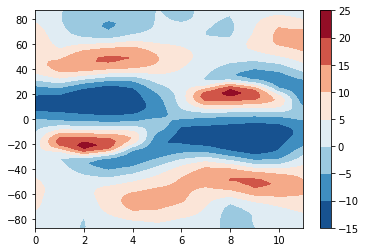

In [30]:
X=np.array(U)
py.contourf(range(12),lat,X[1,:,0,:],cmap=cm.RdBu_r); py.colorbar()

#### Integrate function

In [31]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

#### Load terms in $Wm^{-2}$

In [32]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[]; div_TEv=[]; div_MMv=[]; div_SEv=[]; div_NEv=[]
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]
div_TE_pot=[];div_TE_sens=[];div_TE_moist=[];
div_SE_pot=[];div_SE_sens=[];div_SE_moist=[];
div_MM_pot=[];div_MM_sens=[];div_MM_moist=[];


for depth in range(len(DEPTHS)):
#     print depth
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    div_SE_pot.append(M(div[depth]['SE_pot']))
    div_MM_pot.append(M(div[depth]['MM_pot']))
    div_TE_moist.append(M(div[depth]['TE_moist']))
    div_SE_moist.append(M(div[depth]['SE_moist']))
    div_MM_moist.append(M(div[depth]['MM_moist']))
    div_TE_sens.append(M(div[depth]['TE_sens']))
    div_SE_sens.append(M(div[depth]['SE_sens']))
    div_MM_sens.append(M(div[depth]['MM_sens']))
    
    div_TE_pot.append(div_TE[depth]-(div_TE_moist[depth]+div_TE_sens[depth]))
        
    div_TEv.append(div_vert[depth]['TE'])
    div_SEv.append(div_vert[depth]['SE'])
    div_MMv.append(div_vert[depth]['MM'])
    div_NEv.append(div_vert[depth]['NE'])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

# Average Northern and Southern Hemispheres

In [33]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE); EKE_vert=np.array(EKE_vert); EMF_vert=np.array(EMF_vert)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);
ISFC=np.array(ISFC); ITOA=np.array(ITOA); TS=np.array(TS)
TEv=np.array(TEv); SEv=np.array(SEv); MMv=np.array(MMv); NEv=np.array(NEv)
div_TEv=np.array(div_TEv); div_SEv=np.array(div_SEv); div_MMv=np.array(div_MMv); div_NEv=np.array(div_NEv)
Z=np.array(Z); q=np.array(q); U=np.array(U); T=np.array(T); V=np.array(V); MSE=np.array(MSE);
TE_pot=np.array(TE_pot);TE_sens=np.array(TE_sens);TE_moist=np.array(TE_moist);
SE_pot=np.array(SE_pot);SE_sens=np.array(SE_sens);SE_moist=np.array(SE_moist);
MM_pot=np.array(MM_pot);MM_sens=np.array(MM_sens);MM_moist=np.array(MM_moist);
precip=np.array(precip);
Idsensdt=np.array(Idsensdt) ; Idmoistdt=np.array(Idmoistdt); Idpotdt=np.array(Idpotdt); Idhdt=np.array(Idhdt);
dsensdt=np.array(dsensdt)   ; dmoistdt=np.array(dmoistdt); dpotdt=np.array(dpotdt); dhdt=np.array(dhdt);


In [34]:
def integrated(x):
    
    l=np.deg2rad(lat[:,None])

    def A(X):
        Y=(X-np.average(X, axis=0, weights=np.cos(np.deg2rad(lat)))[None,:])
        return Y

    x=A(x)
    x=x*np.cos(l)
    a=6371.0e3
    int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:-1,:])#int_x[::-1,:][1:,:]+/2.0
    return avg_int_r/10**15

Iprecip = np.copy(ISFC)
for d in range(len(DEPTHS)):
#     print d
    Iprecip[d,...] = integrated(precip[d,...])

In [35]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,...]+flux_flag*np.roll(x[:,l_S,...][:,::-1,...], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[...,0,None],axis=-1)

    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [36]:
TE_a   ,SE_a     , MM_a  , NE_a  , EMF_vert_a,   lat_a  = N_S_avg(TE, SE, MM, NE, EMF_vert, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a, Iprecip_a  = N_S_avg( ISFC,Iprecip,ISFC,ISFC,ISFC, lat[1:-1] )[0:2]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]
EKE_vert_a  = N_S_avg( EKE_vert  ,EKE_vert,EKE_vert ,EKE_vert ,EKE_vert , lat, flux_flag=1 )[0]

TEv_a  ,SEv_a    , MMv_a  , NEv_a    ,ignore,  lat_a = N_S_avg(TEv, SEv, MMv, NEv,NEv, lat)
CpTv_a ,gZv_a    , Lqv_a  , MSEv_a   ,precip_a,  lat_a = N_S_avg(Cp*T, g*Z, L*q, Cp*T+g*Z+L*q, precip, lat, 1)

TE_sens_a  ,SE_sens_a   , MM_sens_a  , TE_moist_a  , SE_moist_a,   lat_a  = N_S_avg(TE_sens, SE_sens, MM_sens, TE_moist, SE_moist, lat)
TE_pot_a   ,SE_pot_a    , MM_pot_a   , MM_moist_a  , ignore,   lat_a      = N_S_avg(TE_pot,   SE_pot,  MM_pot, MM_moist, SE_moist, lat)

Idsensdt_a, Idmoistdt_a  , Idpotdt_a , Idhdt_a, ignore, latr_a = N_S_avg( Idsensdt, Idmoistdt , Idpotdt , Idhdt, Idhdt, lat[1:-1] )
dsensdt_a,  dmoistdt_a  ,  dpotdt_a ,  dhdt_a,  ignore, lat_a  = N_S_avg( dsensdt,  dmoistdt  ,  dpotdt , dhdt,  dhdt, lat, flux_flag=1)


In [46]:
len(depth_values)

12

In [38]:
Ishf_a.shape

(12, 870, 13)

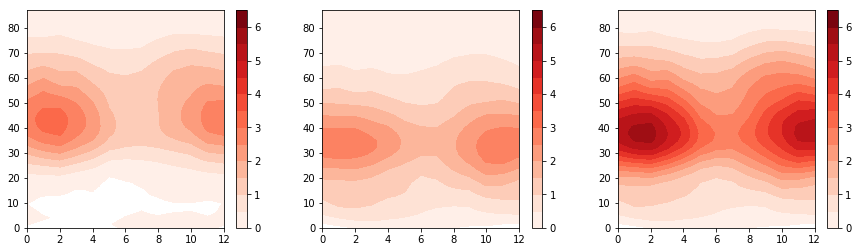

In [39]:
py.figure(figsize=(15,4))
py.subplot(1,3,1)
py.contourf(range(13), lat_a, (TE_sens_a+TE_pot_a)[-4,...], np.arange(0,7,0.5), cmap=py.cm.Reds); py.colorbar()
py.subplot(1,3,2)
py.contourf(range(13), lat_a, (TE_moist_a)[-4,...], np.arange(0,7,0.5),cmap=py.cm.Reds); py.colorbar()
py.subplot(1,3,3)
py.contourf(range(13), lat_a, (TE_sens_a+TE_pot_a+TE_moist_a)[-4,...], np.arange(0,7,0.5),cmap=py.cm.Reds); py.colorbar()

In [40]:
# p=22
# ind=((lat_a>=30) & (lat_a<=70))
# py.contourf(range(13),lat_a[ind],np.array(MMv_a)[1,ind,p,:], 20,  cmap=cm.RdBu_r); py.colorbar()
# py.plot(storm_pos[1,:],'ro-')
# py.title(str(sigma_full[p]))

In [41]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div_vert(x):
       N=50
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for p in range(len(sigma_full)):
          for m in range(13):
            div[d,:,p,m]= smooth( np.gradient((x[d,:,p,m])*(fac)/R,dtheta),N)
       return div

div_CpT=spher_div_vert(CpTv_a)
div_gZ=spher_div_vert(gZv_a)
div_Lq=spher_div_vert(Lqv_a)
div_MSE=spher_div_vert(MSEv_a)

# div_TEv_a, div_SEv_a, div_MMv_a, div_NEv_a,ignore,lat_a = N_S_avg(div_TEv, div_SEv, div_MMv, div_NEv,div_NEv, lat,flux_flag=1)


In [44]:
CpTv_a.shape

(12, 871, 40, 13)

<a list of 11 text.Text objects>

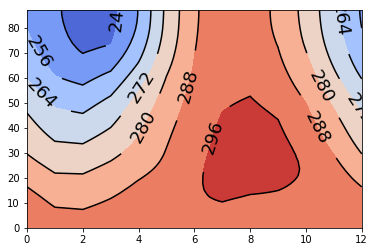

In [55]:
temp_range= np.arange(240,310,8)
py.contourf(range(13),   lat_a, CpTv_a[1,:,1,:]/(1004.0), temp_range, cmap=cm.coolwarm)
c= py.contour(range(13), lat_a, CpTv_a[1,:,1,:]/(1004.0), temp_range, colors='k')
py.clabel(c,  inline=1,fmt = '%1d',inline_spacing=20, fontsize=18)


#### Calculate divergence

In [27]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(x.shape[0]):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a
div_EMF_vert_a=spher_div(EMF_vert_a*10**10, np.cos(np.radians(lat_a)) )

div_TE_moist_a=spher_div(TE_moist_a*10**15)
div_SE_moist_a=spher_div(SE_moist_a*10**15)
div_MM_moist_a=spher_div(MM_moist_a*10**15)

div_TE_pot_a=spher_div(TE_pot_a*10**15)
div_SE_pot_a=spher_div(SE_pot_a*10**15)
div_MM_pot_a=spher_div(MM_pot_a*10**15)

div_TE_sens_a=spher_div(TE_sens_a*10**15)
div_SE_sens_a=spher_div(SE_sens_a*10**15)
div_MM_sens_a=spher_div(MM_sens_a*10**15)


#### Find the storm track position

In [28]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):           
            l_range=((lat_a>=30) & (lat_a<=60))                
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

def find_zero1(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):    
            if (((d>=3) & (d<=7)) & (m==5)) :
#                 print d,m
                l_range=((lat_a>=25) & (lat_a<=60))  
            else:
                l_range=((lat_a>=00) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc


storm_pos    = find_zero(div_TE_a)
storm_pos_NE = find_zero1(div_NE_a)


In [29]:
# IOLR_a.shape

In [30]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X= storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te  = inerp_at_max(TE_a,lat_a)
Intensity_se  = inerp_at_max(SE_a,lat_a)
Intensity_mm  = inerp_at_max(MM_a,lat_a)
Intensity_ne  = inerp_at_max(NE_a,lat_a)


Intensity_te_moist = inerp_at_max(TE_moist_a,lat_a)
Intensity_te_sens  = inerp_at_max(TE_sens_a,lat_a)
Intensity_te_pot   = inerp_at_max(TE_pot_a,lat_a)

Intensity_mm_moist = inerp_at_max(MM_moist_a,lat_a)
Intensity_mm_sens  = inerp_at_max(MM_sens_a,lat_a)
Intensity_mm_pot   = inerp_at_max(MM_pot_a,lat_a)

Intensity_se_moist = inerp_at_max(SE_moist_a,lat_a)
Intensity_se_sens  = inerp_at_max(SE_sens_a,lat_a)
Intensity_se_pot   = inerp_at_max(SE_pot_a,lat_a)

I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

I_dmoistdt = inerp_at_max(Idmoistdt_a,latr_a)
I_precip   = inerp_at_max(Iprecip_a,latr_a)

In [31]:
# np.save('/project2/tas1/pragallva/Summer_quarter_2019/codes/python_scripts/isca/jupyter_notebooks/Intensity_monthly.npy',Intensity_te[[1,-4],...])

In [32]:
# py.plot(I_SFC[1,:],'o-')
# py.plot(I_TOA[1,:],'o-')
# py.plot((I_SFC+I_TOA-I_dhdt)[1,:],'o-')
# py.plot((I_NE)[1,:],'mo--')

In [33]:
def mean(X):
     return X[...,:-1].mean(axis=-1)[...,None]
def prime(X):
    return X-mean(X)

In [34]:
r_moist_mean = mean(Intensity_te_moist)/mean(Intensity_te)
r_moist      = (Intensity_te_moist)/(Intensity_te)

In [35]:
# print np.min(r_moist[1]), np.max(r_moist[1]) 
# print np.min(r_moist[-4]), np.max(r_moist[-4]) 

In [36]:
# co= ['r','c','y','g','m','b','k','orange','brown','pink','grey','red']
# for m in range(12):
#     py.plot(depth_values[:-1], r_moist[:-1,m], 'o-' , color=co[m])
# py.axhline(r_moist_mean[1], color='k')
# # py.axvline(depth_values[1])
# py.axhline(r_moist_mean[-4], color='k')
# # py.axvline(depth_values[-4])

In [37]:
# # Isca={"CpT_a":CpTv_a[...,1,:], "gZ_a": gZv_a[...,1,:], "Lq_a": Lqv_a[...,1,:], "lat_a":lat_a,"depth_values":np.array(depth_values[:-1]),"storm_pos":storm_pos[:-1,:],"storm_pos_NE":storm_pos_NE[:-1,:],"Intensity_te":Intensity_te, "div_TE_a": div_TE_a[:-1,...],"TE_a": TE_a[:-1,...],"NE_a": NE_a[:-1,...]}
# # save("/project2/tas1/pragallva/climlab/data/Isca_data.hkl",Isca)
# ok_check = load("/project2/tas1/pragallva/climlab/data/Isca_data.hkl")


# Shift decompose

In [38]:
import numpy as np
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    div_TE_a=spher_div(TE_a*10**15)
    div_SE_a=spher_div(SE_a*10**15)
    div_MM_a=spher_div(MM_a*10**15)
    div_NE_a=div_TE_a+div_SE_a+div_MM_a
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

In [39]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(-1.0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [40]:
def threshold(I,value, pos1, pos2, pos3, pos4):
      for d in range(len(DEPTHS)):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                #N[d,m]=np.nan
                pos1[d,m]=np.nan
                pos2[d,m]=np.nan
                pos3[d,m]=np.nan
                pos4[d,m]=np.nan                
      return pos1, pos2, pos3, pos4
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 0.0, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))

(30, 60)

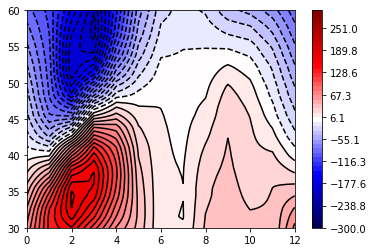

In [41]:
py.contourf(range(13), lat_a, div_TE_a[1,:,:],  np.linspace(-300,300,50), cmap=cm.seismic); py.colorbar()
py.contour(range(13), lat_a,  TE_change[1,:,:], np.linspace(-300,300,50), colors='k'); #py.colorbar()

py.ylim(30,60)

In [42]:
depth_values

[4, 5, 8, 10, 12, 16, 20, 30, 50, 80, 100, 999]

In [43]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==1: depth=5
    if d==8: depth=50
        
    title1=str(depth)+'m_shift'

    m=range(0,13)
    
    fig=py.figure(figsize=(15, 9))
    
#     print zero_div_TE[0,...]
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
#         y=np.append(y1[-1],y1)
        return np.squeeze(y1)
        
    if month_to_month==0:
        s=TE_change[d,:,:-1].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
#         print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     print TE_obs_pos.shape
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title=str(depth)+"m"
#     title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    #py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="Sep23/"
    title1="Isca_shift"+str(depth)+"m"
    
#     py.savefig(fig_dest1+title1+'.pdf')
    py.show()
    #return zero_div_TE

/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


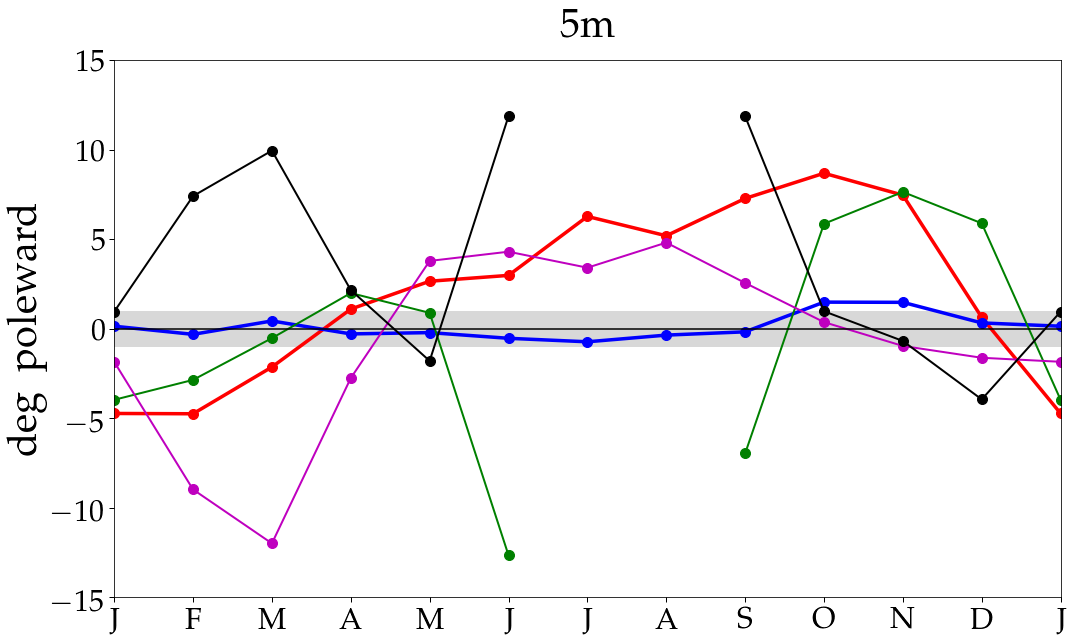

In [44]:
plot_monthly_shift(d=1,l=15,month_to_month=0,threshold_value=+1) 

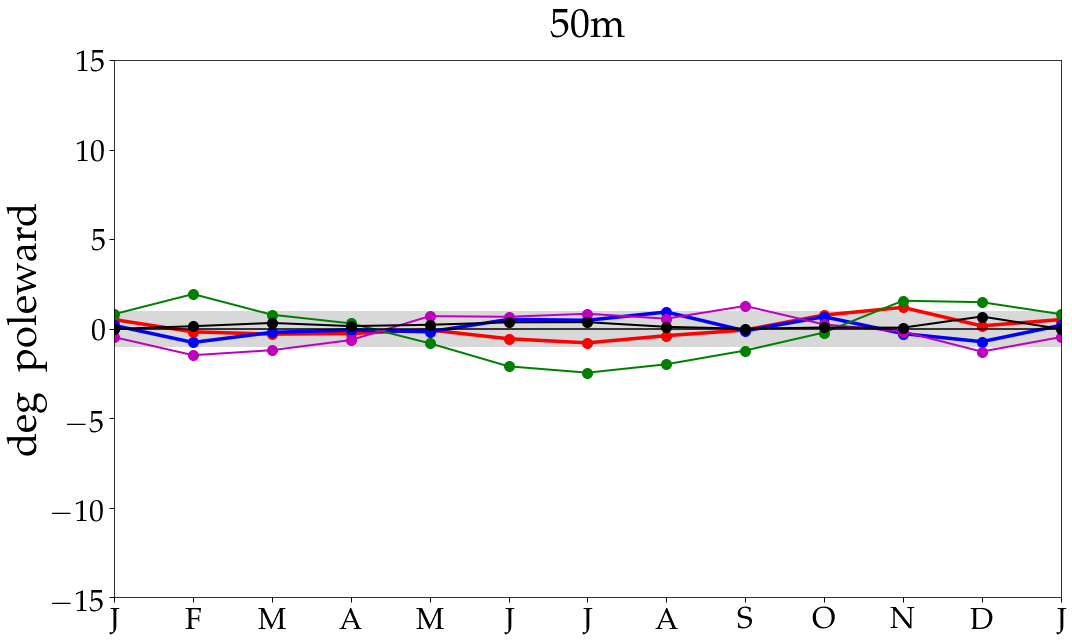

In [45]:
plot_monthly_shift(d=8,l=15,month_to_month=0,threshold_value=+1) 

In [46]:
s=TE_change[d,:,:-1].mean(axis=-1)[None,:,None]
base_pos=find_zero(s)


ISCA_mean_pos  = np.squeeze(np.array([find_zero((TE_change[1,:,:-1].mean(axis=-1)[None,:,None])), \
                           find_zero((TE_change[8,:,:-1].mean(axis=-1)[None,:,None]))]))
ISCA_pos       = storm_pos[[1,8],:]
ISCA_intensity = Intensity_te[[1,8],:]

In [47]:
ISCA_mean_pos.shape

(2,)

In [48]:
ISCA_data = {'ISCA_mean_pos':ISCA_mean_pos, 'ISCA_pos':ISCA_pos, 'ISCA_intensity':ISCA_intensity}

In [49]:
# save('/project2/tas1/pragallva/climlab/pragallva/data/ISCA_data.hkl',ISCA_data)

In [50]:
def plot_flux(d,threshold_value) :
    
    n=d+1
    pos=storm_pos
    
    mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y= np.roll(y,0,axis=-1)  
       return y
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, threshold_value)
    latns=lat

    py.subplot(3,4,n)
    b = py.contourf(range(13),lat_a,add(TE_a[d,...]), v, cmap=BuRd); 
    c=py.contour(range(13),lat_a, add(TE_a[d,...]), v, colors='k',linewidths=1.0);    
    py.plot(range(13), np.roll((pos[d,:]),0), 'ro-')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth_values[d])+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    py.ylim(0,80)

In [51]:
# fig=py.figure(figsize=(20, 10))
# for d in range(len(DEPTHS)):
#     plot_flux(d,1.0)

# Decompose Net energy in Watts/m^2

In [52]:
swabs=np.array(swabs); shf=np.array(shf); ne=np.array(ne); olr=np.array(olr); dhdt=np.array(dhdt);
SW_sfc=np.array(SW_sfc); LW_sfc=np.array(LW_sfc); SW_toa=np.array(SW_toa); shflx=np.array(shflx); lhflx=np.array(lhflx);
sfc=np.array(sfc); toa=np.array(toa); 

In [53]:
SWABS_a, SHF_a  , FNE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]

In [54]:
def inerp_at_mean(flux,lat):
  D = np.zeros(((len(DEPTHS),13)))
  for d in range(0,(len(DEPTHS))):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=np.nanmean(zero_div_TE[d,:-1])
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D

In [55]:
P_div_TE =inerp_at_mean(div_TE_a,lat_a)
P_div_SE =inerp_at_mean(div_SE_a,lat_a)
P_div_NE =inerp_at_mean(div_NE_a,lat_a)
P_div_MM =inerp_at_mean(div_MM_a,lat_a)

In [56]:
P_SWAB =inerp_at_max(SWABS_a,lat_a)
P_SHF  =inerp_at_max(SHF_a,lat_a)
P_NE   =inerp_at_max(FNE_a,lat_a)
P_OLR  =inerp_at_max(OLR_a,lat_a)
P_dhdt =inerp_at_max(dhdt_a,lat_a)

P_SWsfc = inerp_at_max(SW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(LW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(SW_toa_a,lat_a)
P_shflx = inerp_at_max(shflx_a,lat_a)
P_lhflx = inerp_at_max(lhflx_a,lat_a)

P_sfc = inerp_at_max(sfc_a,lat_a)
P_precip = inerp_at_max(precip_a/(24.0*60.0*60.0),lat_a)
P_toa = inerp_at_max(toa_a,lat_a)
P_dmoistdt = inerp_at_max(dmoistdt_a,lat_a)

##### Trying something for drawing my schematic for AOFD 2019

In [57]:
def schematic_check(d,m,y,x=latr_a, c='b-',labels=None, lw=2.5 ):
    if labels is None:
        labels=mticks[m]
    py.plot(x,y[d,:,m],c, lw=lw, label=labels)
    py.axvline(storm_pos[d,m], color='k')
    py.axhline(0)
    py.xlim(storm_pos[d,m]-20,storm_pos[d,m]+20)


/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


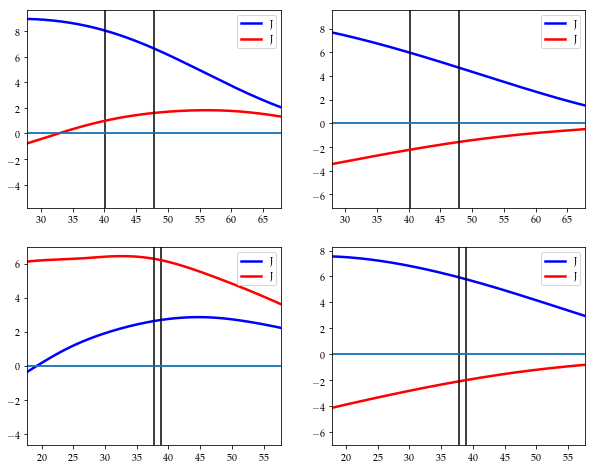

In [58]:
py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
py.subplot(2,2,1)
m=0; y=Ishf_a; d=1
schematic_check(d,m,y=Ishf_a,x=latr_a, c='b' )
m=5
schematic_check(d,m,y=Ishf_a,x=latr_a, c='r' )
py.legend(loc='best')

py.subplot(2,2,2)
m=0; y=Iswabs_a; d=1
schematic_check(d,m,y,x=latr_a, c='b' )
m=5
schematic_check(d,m,y,x=latr_a, c='r' )
py.legend(loc='best')

py.subplot(2,2,3)
m=0; y=Ishf_a; d=-4
schematic_check(d,m,y=Ishf_a,x=latr_a, c='b' )
m=5
schematic_check(d,m,y=Ishf_a,x=latr_a, c='r' )
py.legend(loc='best')

py.subplot(2,2,4)
m=0; y=Iswabs_a; d=-4
schematic_check(d,m,y,x=latr_a, c='b' )
m=5
schematic_check(d,m,y,x=latr_a, c='r' )
py.legend(loc='best')



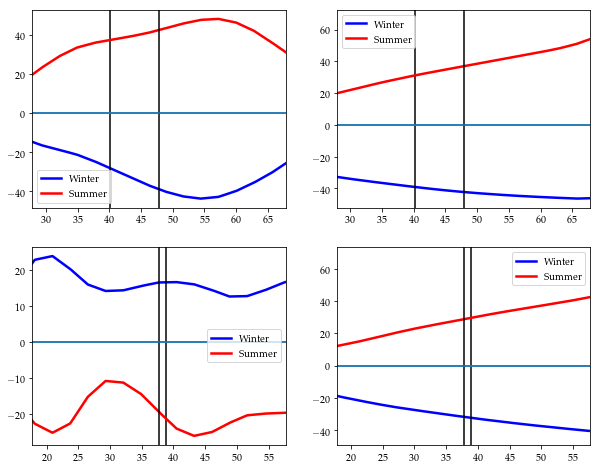

In [59]:
py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
Summer=5; Winter=-1
py.subplot(2,2,1)
m=Winter; y=SHF_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter' )
m=Summer
schematic_check(d,m,y,x=lat_a, c='r',labels='Summer' )
py.legend(loc='best')

py.subplot(2,2,2)
m=Winter; y=SWABS_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter' )
m=Summer
schematic_check(d,m,y,x=lat_a, c='r',labels='Summer' )
py.legend(loc='best')

py.subplot(2,2,3)
m=Winter; y=SHF_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter' )
m=Summer
schematic_check(d,m,y,x=lat_a, c='r',labels='Summer' )
py.legend(loc='best')

py.subplot(2,2,4)
m=Winter; y=SWABS_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter' )
m=Summer
schematic_check(d,m,y,x=lat_a, c='r',labels='Summer' )
py.legend(loc='best')



Text(0.5, 1.0, '50')

/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


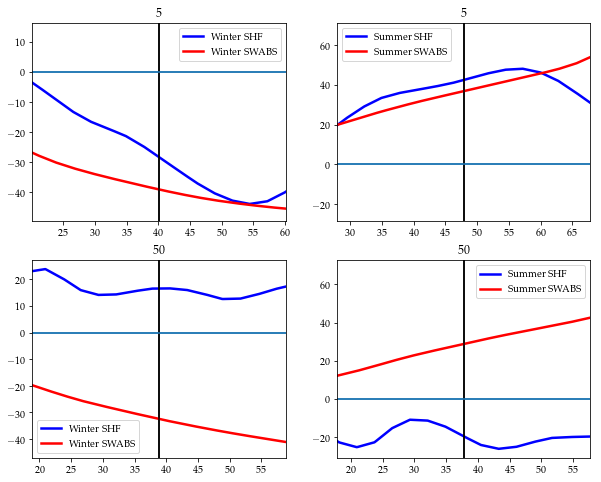

In [60]:
py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
Summer=5; Winter=-1
py.subplot(2,2,1)
m=Winter; 
y=SHF_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SWABS_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r',labels='Winter SWABS' )
py.legend(loc='best')
py.title('%1d'%(depth_values[d]))

py.subplot(2,2,2)
m=Summer
y=SHF_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Summer SHF' )
y=SWABS_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r',labels='Summer  SWABS' )
py.legend(loc='best')
py.title('%1d'%(depth_values[d]))

py.subplot(2,2,3)
m=Winter; 
y=SHF_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SWABS_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r',labels='Winter SWABS' )
py.legend(loc='best')
py.title('%1d'%(depth_values[d]))

py.subplot(2,2,4)
m=Summer
y=SHF_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Summer SHF' )
y=SWABS_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r',labels='Summer  SWABS' )
py.legend(loc='best')
py.title('%1d'%(depth_values[d]))


Text(0.5, 1.0, '50')

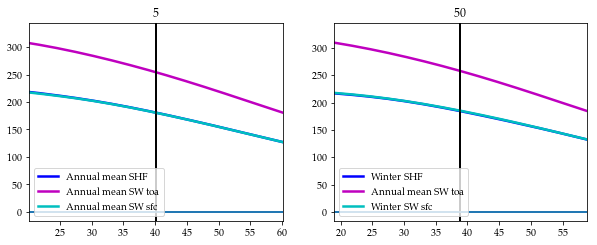

In [61]:
py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
Summer=5; Winter=-1
py.subplot(2,2,1)
m=0; 
y=SHF_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Annual mean SHF' )
y=SW_toa_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='m',labels='Annual mean SW toa' )
y=SW_sfc_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,-y,x=lat_a, c='c',labels='Annual mean SW sfc' )
py.legend(loc='best')
py.title('%1d'%(depth_values[d]))

py.subplot(2,2,2)
m=Winter; 
y=SHF_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SW_toa_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='m',labels='Annual mean SW toa' )
y=SW_sfc_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,-y,x=lat_a, c='c',labels='Winter SW sfc' )
py.legend(loc='best')
py.title('%1d'%(depth_values[d]))



In [62]:
def schematic_check(d,m,y,x=latr_a, c='b-',labels=None, lw=2.5 ):
    if labels is None:
        labels=mticks[m]
    py.plot(x,y[d,:,m],c, lw=lw, label=labels)
    py.axvline(storm_pos[d,m], color='k')
    py.axhline(0)
#     py.xlim(storm_pos[d,m]-10,storm_pos[d,m]+10)


Text(0.5, 1.0, '50 m')

/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


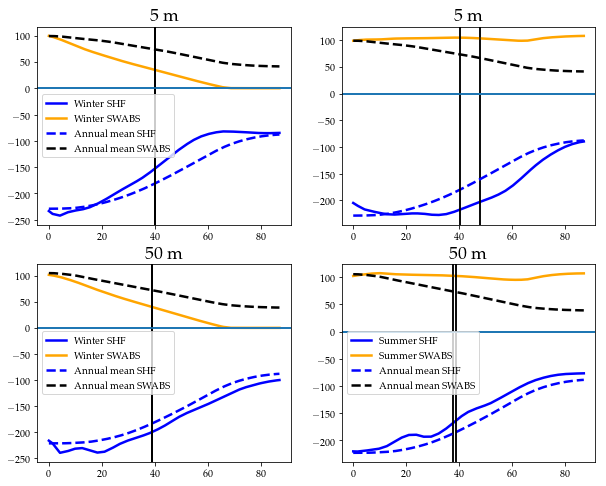

In [63]:
py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
Summer=5; Winter=-1
py.subplot(2,2,1)
m=Winter; 
y=-SHF_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SWABS_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Winter SWABS' )
y=-SHF_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
y=SWABS_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )


# y=SW_sfc_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,-y,x=lat_a, c='c',labels='Winter SW SFC' )
# y=SW_toa_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='r',labels='Winter SW TOA' )
# y=OLR_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='g',labels='Winter OLR' )
py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)

py.subplot(2,2,2)
m=Summer
y=-SHF_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Summer SHF' )
y=SWABS_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Summer  SWABS' )
y=-SHF_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
y=SWABS_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )

# y=SW_sfc_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,-y,x=lat_a, c='c',labels='Summer SW SFC' )
# y=SW_toa_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='r',labels='Summer SW TOA' )
# # y=OLR_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # schematic_check(d,m,y,x=lat_a, c='g',labels='Summer OLR' )
# py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)

py.subplot(2,2,3)
m=Winter; 
y=-SHF_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SWABS_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Winter SWABS' )
y=-SHF_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
y=SWABS_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )

# y=SW_sfc_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,-y,x=lat_a, c='c',labels='Winter SW SFC')
# y=SW_toa_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='r',labels='Winter SW TOA' )
# y=OLR_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='g',labels='Winter OLR' )

py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)

py.subplot(2,2,4)
m=Summer
y=-SHF_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Summer SHF' )
y=SWABS_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Summer  SWABS' )
y=-SHF_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
y=SWABS_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )

# y=SW_sfc_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,-y,x=lat_a, c='c',labels='Summer SW SFC' )
# y=SW_toa_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='r',labels='Summer SW TOA' )
# y=OLR_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='g',labels='Summer OLR' )
py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)


Text(0.5, 1.0, '50 m')

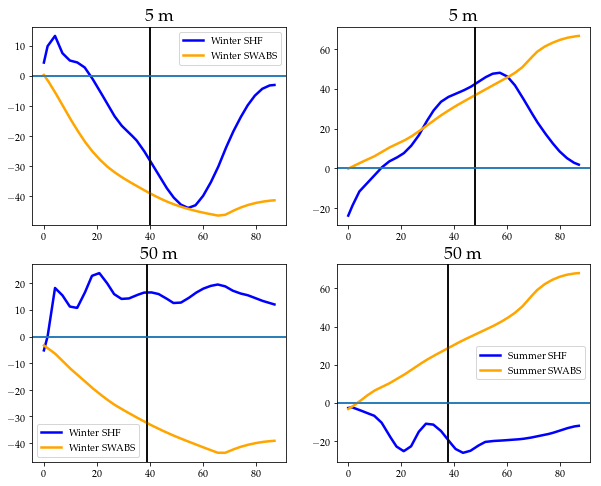

In [64]:
def schematic_check(d,m,y,x=latr_a, c='b-',labels=None, lw=2.5 ):
    if labels is None:
        labels=mticks[m]
    py.plot(x,y[d,:,m],c, lw=lw, label=labels)
    py.axvline(storm_pos[d,m], color='k')
    py.axhline(0)
#     py.xlim(storm_pos[d,m]-10,storm_pos[d,m]+10)



py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
Summer=5; Winter=-1
py.subplot(2,2,1)
m=Winter; 
y=SHF_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SWABS_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Winter SWABS' )
# y=SHF_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
# y=SWABS_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )
py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)

py.subplot(2,2,2)
m=Summer
y=SHF_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Summer SHF' )
y=SWABS_a; d=1; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Summer  SWABS' )
# y=SHF_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
# y=SWABS_a; d=1; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )
py.title('%1d m'%(depth_values[d]), fontsize=18)

py.subplot(2,2,3)
m=Winter; 
y=SHF_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Winter SHF' )
y=SWABS_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Winter SWABS' )
# y=SHF_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
# y=SWABS_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )
py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)

py.subplot(2,2,4)
m=Summer
y=SHF_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b',labels='Summer SHF' )
y=SWABS_a; d=-4; y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='orange',labels='Summer  SWABS' )
# y=SHF_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='b--',labels='Annual mean SHF' )
# y=SWABS_a; d=-4; y=y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,0,y,x=lat_a, c='k--',labels='Annual mean SWABS' )
py.legend(loc='best')
py.title('%1d m'%(depth_values[d]), fontsize=18)


In [65]:
# SWABS_a, SHF_a  , FNE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
# SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
# sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]

(0, 350)

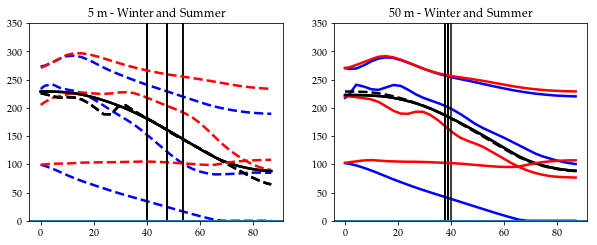

In [66]:
py.figure(figsize=(10,8))
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
Summer=5; Winter=-1
py.subplot(2,2,1)
m=Winter; 
y=SHF_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b--', labels='SHF winter')
schematic_check(1, -1,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SHF-mean')
schematic_check(1, 9,y,x=lat_a, c='k--', labels='SHF-mean')

y=OLR_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b--', labels='SHF winter')
# schematic_check(1,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')

y=SWABS_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b--', labels='SHF winter')
# schematic_check(1,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')


# py.legend(loc='best')
py.ylim(0,350)
py.title('%1d m - Winter'%(depth_values[d]))

m=Summer; 
y=SHF_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r--', labels='SHF summer')
schematic_check(d,-1,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-')
schematic_check(d, 9,y,x=lat_a, c='k--', labels='SHF-mean')


y=OLR_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r--', labels='SHF summer')
# schematic_check(1,Winter,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,Winter,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')

y=SWABS_a; d=1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r--', labels='SHF summer')
# schematic_check(1,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')


# py.legend(loc='best')
py.title('%1d m - Winter and Summer'%(depth_values[d]))
py.ylim(0,350)

py.subplot(2,2,2)
m=Winter; 
y=SHF_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b-', labels='SHF winter')
schematic_check(d,-1,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SHF-mean')

y=OLR_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b-', labels='SHF winter')
# schematic_check(1,Winter,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,Winter,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')

y=SWABS_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='b-', labels='SHF summer')


# py.ylim(0,250)
py.title('%1d m - Winter'%(depth_values[d]))

# py.subplot(2,2,2)
m=Summer; 
y=SHF_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r-', labels='SHF summer')
schematic_check(d,-1,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='')
schematic_check(1,-1,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k--', labels='')

y=OLR_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r-', labels='SHF summer')
# schematic_check(1,Winter,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,Winter,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')

y=SWABS_a; d=-4; #y=y-y[...,:-1].mean(axis=-1)[...,None]
schematic_check(d,m,y,x=lat_a, c='r-', labels='SHF summer')
# schematic_check(1,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y-', labels='OLR-mean')
# schematic_check(-4,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='y--', labels='OLR-mean')

# py.legend(loc='best')
py.title('%1d m - Winter and Summer'%(depth_values[d]))
py.ylim(0,350)

In [67]:
def D(X):
    return X#-np.mean(X[:,:-1],axis=-1)[:,None]

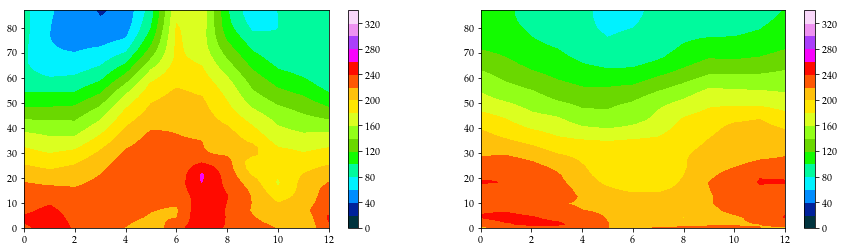

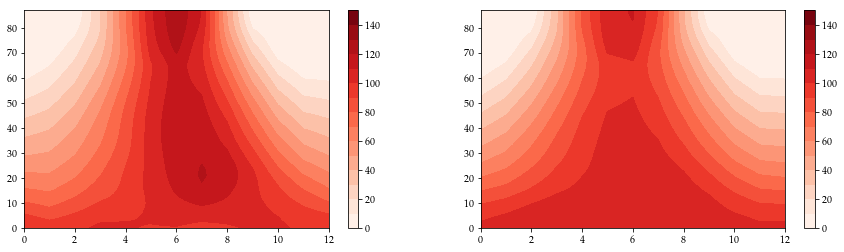

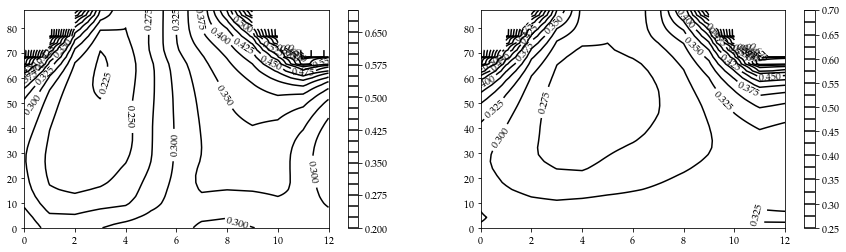

In [68]:
lrange=np.arange(0,350,20)
py.figure(figsize=(15,4))
py.subplot(1,2,1)
py.contourf(range(13), lat_a, D(SHF_a[1,...]),lrange, cmap=py.cm.gist_ncar);
py.colorbar()

py.subplot(1,2,2)
py.contourf(range(13), lat_a, D(SHF_a[-4,...]), lrange, cmap=py.cm.gist_ncar);
py.colorbar()

lrange=np.arange(0,160,10)
py.figure(figsize=(15,4))
py.subplot(1,2,1)
py.contourf(range(13), lat_a, D(SWABS_a[1,...]),lrange, cmap=py.cm.Reds);
py.colorbar()

py.subplot(1,2,2)
py.contourf(range(13), lat_a, D(SWABS_a[-4,...]), lrange, cmap=py.cm.Reds);
py.colorbar()


lrange=20#np.arange(10,160,10)
py.figure(figsize=(15,4))
py.subplot(1,2,1)
co=py.contour(range(13), lat_a, D((SWABS_a/SW_toa_a)[1,...]),lrange, colors='k');
py.clabel(co)
py.colorbar()

py.subplot(1,2,2)
co=py.contour(range(13), lat_a, D((SWABS_a/SW_toa_a)[-4,...]), lrange, colors='k');
py.clabel(co)
py.colorbar()

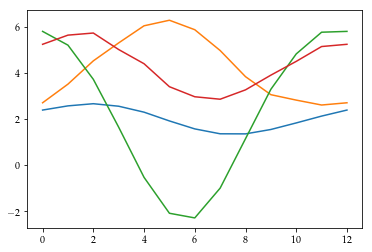

In [69]:
py.plot(I_OLR[-4,:])
py.plot(I_SHF[-4,:])
py.plot(I_SWAB[-4,:])
py.plot(Intensity_te[-4,:])

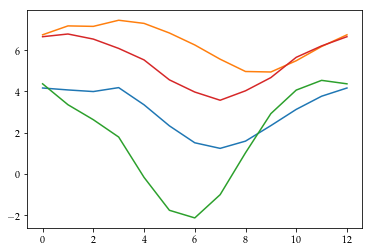

In [70]:
py.plot(I_OLR[-1,:])
py.plot(I_SHF[-1,:])
py.plot(I_SWAB[-1,:])
py.plot(Intensity_te[-1,:])

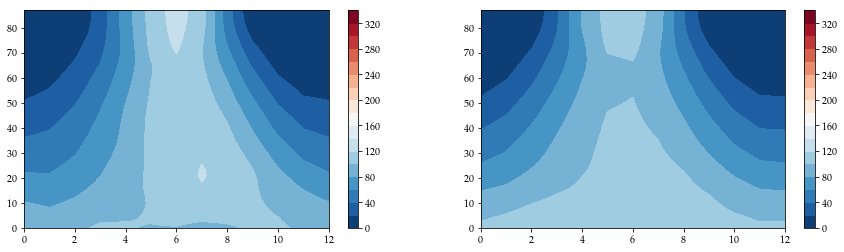

In [71]:
py.figure(figsize=(15,4))
py.subplot(1,2,1)
py.contourf(range(13), lat_a, SWABS_a[1,...], np.arange(0,360,20) ,cmap=py.cm.RdBu_r);
py.colorbar()

py.subplot(1,2,2)
py.contourf(range(13), lat_a, SWABS_a[-4,...], np.arange(0,360,20) ,cmap=py.cm.RdBu_r);
py.colorbar()

In [72]:
# py.figure(figsize=(10,8))
# mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
# Summer=5; Winter=-1
# py.subplot(2,2,1)
# m=Winter; 
# y=SHF_a; 
# d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='b--', labels='SHF - shallow Winter')
# schematic_check(d,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SHF-mean')

# d=-4;
# schematic_check(d,m,y,x=lat_a, c='b-',  labels='SHF - deep Winter' )
# schematic_check(d,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SHF-mean')

# py.subplot(2,2,2)
# m=Summer; 
# y=SHF_a; 
# d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# schematic_check(d,m,y,x=lat_a, c='r--', labels='SHF - shallow Summer')
# schematic_check(d,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SHF-mean')

# d=-4;
# schematic_check(d,m,y,x=lat_a, c='r-',  labels='SHF - deep Summer' )
# schematic_check(d,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SHF-mean')


# py.legend(loc='best')
# py.ylim(0,250)
# # py.title('%1d m - Winter'%(depth_values[d]))

# # # # py.subplot(2,2,2)
# # py.subplot(2,2,2)
# # m=Winter; 
# # y=SWABS_a; 
# # d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # schematic_check(d,m,y,x=lat_a, c='b--', labels='SWABS - shallow Winter')
# # schematic_check(d,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SWABS - shallow Winter')
# # d=-4;
# # schematic_check(d,m,y,x=lat_a, c='b-',  labels='SWABS - deep Winter' )
# # schematic_check(d,m,y[...,:-1].mean(axis=-1)[...,None],x=lat_a, c='k-', labels='SWABS - shallow Winter')

# # m=Summer; 

# # d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # schematic_check(d,m,y,x=lat_a, c='r--', labels='SWABS - shallow Summer')
# # d=-4;
# # schematic_check(d,m,y,x=lat_a, c='r-',  labels='SWABS - deep Summer' )
# # py.ylim(0,250)


# # py.subplot(2,2,3)
# # m=Winter; 
# # y=Ishf_a; 
# # d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # schematic_check(d,m,y,x=latr_a, c='b--', labels='I SHF - shallow Winter')
# # d=-4;
# # schematic_check(d,m,y,x=latr_a, c='b-',  labels='I SHF - deep Winter' )

# # m=Summer; 
# # y=Ishf_a; 
# # d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # schematic_check(d,m,y,x=latr_a, c='r--', labels='I SHF - shallow Summer')
# # d=-4;
# # schematic_check(d,m,y,x=latr_a, c='r-',  labels='I SHF - deep Summer' )


# # # py.legend(loc='best')
# # # # py.ylim(0,250)
# # # # py.title('%1d m - Winter'%(depth_values[d]))

# # # # # py.subplot(2,2,2)
# # # py.subplot(2,2,4)
# # # m=Winter; 
# # # y=Iswabs_a; 
# # # d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # # schematic_check(d,m,y,x=latr_a, c='b--', labels='I SWABS - shallow Winter')
# # # d=-4;
# # # schematic_check(d,m,y,x=latr_a, c='b-',  labels='I SWABS - deep Winter' )

# # # m=Summer; 

# # # d= 1; #y=y-y[...,:-1].mean(axis=-1)[...,None]
# # # schematic_check(d,m,y,x=latr_a, c='r--', labels='I SWABS - shallow Summer')
# # # d=-4;
# # # schematic_check(d,m,y,x=latr_a, c='r-',  labels='I SWABS - deep Summer' )
# # # # py.ylim(0,250)

In [73]:
# py.figure(figsize=(15,12))
# mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
# Summer=5; Winter=0
# py.subplot(3,2,1)
# m=Winter; y=SHF_a; d=0; y=y-y[...,:-1].mean(axis=-1).mean(axis=-1)[...,None,None]
# schematic_check(d,m,y,x=lat_a, c='b' )
# m=Summer
# schematic_check(d,m,y,x=lat_a, c='r' )
# py.legend(loc='best')

# py.subplot(3,2,2)
# m=Winter; y=SWABS_a; d=0; y=y-y[...,:-1].mean(axis=-1).mean(axis=-1)[...,None,None]
# schematic_check(d,m,y,x=lat_a, c='b' )
# m=Summer
# schematic_check(d,m,y,x=lat_a, c='r' )
# py.legend(loc='best')

# py.subplot(3,2,3)
# m=Winter; y=SHF_a; d=-4; y=y-y[...,:-1].mean(axis=-1).mean(axis=-1)[...,None,None]
# schematic_check(d,m,y,x=lat_a, c='b' )
# m=Summer
# schematic_check(d,m,y,x=lat_a, c='r' )
# py.legend(loc='best')

# py.subplot(3,2,4)
# m=Winter; y=SWABS_a; d=-4; y=y-y[...,:-1].mean(axis=-1).mean(axis=-1)[...,None,None]
# schematic_check(d,m,y,x=lat_a, c='b' )
# m=Summer
# schematic_check(d,m,y,x=lat_a, c='r' )
# py.legend(loc='best')

# py.subplot(3,2,5)
# m=Winter; y=SHF_a; d=-1; y=y-y[...,:-1].mean(axis=-1).mean(axis=-1)[...,None,None]
# schematic_check(d,m,y,x=lat_a, c='b' )
# m=Summer
# schematic_check(d,m,y,x=lat_a, c='r' )
# py.legend(loc='best')

# py.subplot(3,2,6)
# m=Winter; y=SWABS_a; d=-1; y=y-y[...,:-1].mean(axis=-1).mean(axis=-1)[...,None,None]
# schematic_check(d,m,y,x=lat_a, c='b' )
# m=Summer
# schematic_check(d,m,y,x=lat_a, c='r' )
# py.legend(loc='best')




In [74]:
# ['Net_rad', 'TOA_d', 'SW_toa_d', 'shflx_u', 'olr', 'precip', \
#  'lhflx_u', 'SHF', 'flux_oceanq', 'SFC_u', 'SW_sfc_d', 'LW_sfc_d', 'SWABS']

In [75]:
ls /project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m0/coord_dic.hkl

/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m0/coord_dic.hkl


In [76]:
# hkl.load('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m0/coord_dic.hkl')

## Critical depth

In [77]:
# d=4;i=0
# file_loc="/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/"
# file_loc2="/project2/tas1/pragallva/Summer_quarter_2018/post_process_data/"
# rad_file= "zonal_radiation_dic.hkl"
# smalat=(load(file_loc+'HC0_la'+str(d)+'m_oc'+str(d)+'m'+str(i)+'/'+"coord_dic.hkl"))["lat"]
# swabs_all=[]
# shf_all=[]
# SWd_all=[]
# SWu_all=[]
# olr_all=[]
# N=10
# def append_all(field,d):
#     x=[]
#     for i in range(N):
#         x.append(load(file_loc+'HC0_la'+str(d)+'m_oc'+str(d)+'m'+str(i)+'/'+rad_file)[field])
#     y= np.reshape( np.array(x), (12*N, 64))
#     return y


# def append2(field,d):
#     x=[]
#     for i in range(N):
#         x.append(load(file_loc2+'seaice_isca_landice55_z0'+str(i)+'/'+rad_file)[field])
#     y= np.reshape( np.array(x), (12*N, 64))
#     return y

# for d in depth_values:    
#     if d==999:
#         swabs_all.append(append2('SWABS',d))
#         shf_all.append(append2('SHF',d))
#         SWd_all.append(append2('SW_sfc_d',d))
#         SWu_all.append(append2('SW_toa_d',d))
#         olr_all.append(append2('olr',d))
#     else :
#         swabs_all.append(append_all('SWABS',d))
#         shf_all.append(append_all('SHF',d))
#         SWd_all.append(append_all('SW_sfc_d',d))
#         SWu_all.append(append_all('SW_toa_d',d))
#         olr_all.append(append_all('olr',d))
    
# def A(y): 
#     y=np.array(y).transpose(0,2,1)
#     return y#-y.mean(axis=1)[:,None,:]
# swabs_all=A(swabs_all); shf_all=A(shf_all); SWd_all=A(SWd_all) ; olr_all=A(olr_all);
# SWu_all=A(SWu_all)

In [78]:
swabs_all_a, shf_all_a, SWd_all_a, olr_all_a, SWu_all_a, smalat_a = \
N_S_avg( swabs_all, shf_all, SWd_all, olr_all, SWu_all, smalat,flux_flag=1)#

NameError: name 'swabs_all' is not defined

In [92]:
from scipy.interpolate import interp1d
a= lambda x: np.append(x,x[...,0,None],axis=-1)
storm_pos_all=a(np.dstack([storm_pos[:,0:-1]]*N).transpose(0,2,1).reshape(len(DEPTHS),12*N))  ## I tried to remove the sea ice file from here
def all_at_max(flux,lat):
  D = np.zeros((flux.shape[0],12*N+1))
  for d in range(0,len(DEPTHS)):
    for m in range(0,12*N+1):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos_all
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

NameError: name 'N' is not defined

In [ ]:
P_SWAB_all  =all_at_max(swabs_all_a,smalat_a)
P_SHF_all   =all_at_max(shf_all_a,smalat_a)
P_OLR_all   =all_at_max(olr_all_a,smalat_a)
P_SWtoa_all =all_at_max(SWu_all_a,smalat_a)
P_SWsfc_all =all_at_max(SWd_all_a,smalat_a)

### Calculate phase difference

In [79]:
import numpy, scipy
from scipy.signal import correlate
def PHASE(X,Y):
  period=12.0
  delta= lambda x: (x-x[:].mean())/(x-x[:].mean()).std()
  lag=np.zeros(len(DEPTHS))
  
  for j in range(len(DEPTHS)):      
      A=delta(X[j,:]); B=delta(Y[j,:]);
      dt=np.arange(1-len(A),len(A))      
      xcorr=correlate(A,B)
      shift=dt[xcorr.argmax()]
      lag[j] = shift #2*np.pi*(((0.5 + shift/period) % 1.0) - 0.5)

#       py.figure(figsize=(15,20))
#       py.subplot(12,1,j+1)
#       py.plot(range(1,len(A)+1),A,'r-',label=r'$\Delta SWABS / std(\Delta SWABS)$')   
#       py.plot(range(1,len(B)+1),B,'b-',label='$\Delta SHF / std(\Delta SHF)$')   
#       if j==0: py.legend(loc=(0,1.01),fontsize=20)
#       py.title("depth= "+str(depth_values[j])+"m, lag ="+ str(lag[j])+" months",fontsize=20)
#       py.tight_layout()

  #phase=np.cos(2*np.pi*lag/period)
  phase= (2*np.pi*lag/period)
  return lag, phase
 
phase_swabs_shf=PHASE(P_SWAB_all,P_SHF_all)

lag   = phase_swabs_shf[0]
phase = phase_swabs_shf[1]

NameError: name 'P_SWAB_all' is not defined

#### Calculate seasonal amplitude

In [162]:
def amp(X):
    A=np.zeros(len(DEPTHS))
    for d in range(len(DEPTHS)):
       A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
    return A

# Iamp=amp(Intensity_te)

##### Calculate e-folding depth 

In [163]:
from scipy.optimize import curve_fit

def efolding_depth(field,co='m'):

    def func(x, a, c, d):
        return a*np.exp(-c*x)+d
    x=depth_values[:-1]; y= amp(field)[:-1]
    popt, pcov = curve_fit(func, x, y, p0=(1, 1e-6, 1))
    xx= np.arange(1,100,1)
    e_depth = 1/popt[1] 
#     py.plot(x, y, co+'o')
#     py.plot(xx, func(xx, *popt), co+'-')
#     py.axvline(e_depth,color=co)
    return e_depth, xx, func(xx, *popt)
    

In [164]:
e_Pne   = efolding_depth(P_NE,'m')[0]
e_Polr  = efolding_depth(P_OLR,'g')[0]
e_Pdhdt = efolding_depth(P_dhdt,'k')[0]
e_I     = efolding_depth(Intensity_te,'k')[0]

amp_PNE_NH_SH = np.array([ 50.85997198,  24.14184012])

/project2/tas1/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [166]:
print (e_I)

8.243999157148261


# Diffusivity

In [80]:
import numpy.ma as ma

threshold=0.001
mask_of_TE      = ma.masked_greater_equal(TEv_a, threshold)  ### Positive transient eddies
mask_of_div_MSE = ma.masked_less_equal(div_MSE, -1*threshold) ### Negative MSE gradient

not_mask_of_TE      = ma.masked_less(TEv_a, threshold)  ### Positive transient eddies
not_mask_of_div_MSE = ma.masked_greater(div_MSE, -1*threshold) ### Negative MSE gradient
masked_div_MSE = ma.masked_where( ma.getmask(not_mask_of_div_MSE) , div_MSE)
masked_TE      = ma.masked_where( ma.getmask(not_mask_of_TE), TEv_a)


In [81]:
level=1
dm_by_dphi=masked_div_MSE[...,level,:]
not_mask_of_TE_a      = ma.masked_less(TE_a, threshold)  ### Positive transient eddies
masked_TE_a      = ma.masked_where( ma.getmask(not_mask_of_TE_a), TE_a)
diffusivity_sfc= -TE_a/dm_by_dphi


def mean(X):
     return X[...,:-1].mean(axis=-1)[...,None]
def prime(X):
    return X-mean(X)


D_mean = mean(diffusivity_sfc)
Im_mean= mean(dm_by_dphi)
I_mean = mean(TE_a)

D_prime = prime(diffusivity_sfc)
Im_prime= prime(dm_by_dphi)
I_prime = prime(TE_a)

i1= mean(D_prime*Im_prime)
i1= (np.asarray( [np.squeeze(i1)]*13).transpose(1,2,0))
i2= -1*D_prime*Im_prime
i3= -1*D_prime*Im_mean
i4= -1*D_mean*Im_prime

i1_a = inerp_at_max(i1,lat_a)
i2_a = inerp_at_max(i2,lat_a)
i3_a = inerp_at_max(i3,lat_a)
i4_a = inerp_at_max(i4,lat_a)

#i_a       =inerp_at_max(i_sum,lat_a)
# teprime_a=inerp_at_max(TE_prime,lat_a)


##### check Ray Pierrehumbert Figure 8

In [82]:
# @hidden_cell
# from matplotlib import cm
# import matplotlib
# norm = matplotlib.colors.Normalize(vmin=0, vmax=1000)
# rgba_color = cm.jet(norm(400),bytes=True) 

In [83]:

# from matplotlib import cm
# import matplotlib
# norm = matplotlib.colors.Normalize(vmin=0, vmax=1000)
# rgba_color = cm.jet(norm(400),bytes=True) # D_a          = inerp_at_max(diffusivity_sfc,lat_a)[:-1,:-1]
# dm_by_dphi_a = inerp_at_max(dm_by_dphi     ,lat_a)[:-1,:-1]
# color_index  = np.linspace(0.0,1.0,12)
# markershape= ["o", "v", "^", "*", "h", "+", "X",  "D", "d", "s", "P", ">"]

In [84]:
# fig=py.figure(figsize=(12,7))
# for d in range(11):
#     for m in range(12):
#         py.plot( dm_by_dphi_a[d,m], D_a[d,m],  markershape[d], markersize=15, markeredgecolor='black', color=py.cm.jet(color_index[m]), label=str(depth_values[:-1][d]) )
# py.xlabel(r"dm/(a d$\phi$) (Jm/kg) ", fontsize=20)
# py.ylabel("Diffusivity ($10^{15} kg/(ms)$)", fontsize=20)
# py.tick_params(labelsize=18,size=4,width=2)

# bounds=[1,2,3,4,5,6,7,8,9,10,11,12]
# cmap = mpl.colors.ListedColormap(py.cm.jet(color_index))
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# ax1 = fig.add_axes([0.05, 1.00, 0.9, 0.15])
# cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
#                                 norm=norm,
#                                 ticks=bounds,  # optional
#                                 spacing='proportional',
#                                 orientation='horizontal')
# cb1.set_label('Months', fontsize=20)

# from matplotlib.lines import Line2D
# legend_elements = [ Line2D([0], [0], marker = markershape[i], color='k', label=depth_values[:-1][i], markersize=15) for i in range(11)]
# # ax2 = fig.add_axes()
# ax1.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(1.1, -5.5), fontsize=20)

In [85]:
# cmap = mpl.colors.ListedColormap([color_index[i] for i in range(12)])


## Decomposing the moist and sensible diffusivity

In [86]:
def save_from_zero_error(threshold,yy):
    y = np.copy(yy)
    ind=(np.where((y<threshold) & (y>0)))
    y[ind]=threshold
    ind=(np.where((y>-1*threshold) & (y<0)))
    y[ind]=-1*threshold
    return y

divCpT = save_from_zero_error(0.0002,div_CpT)
divLq  = save_from_zero_error(0.0002,div_Lq)
divgZ  = save_from_zero_error(0.0002,div_gZ)

divMSE = save_from_zero_error(0.0002,div_CpT+ div_Lq+ div_gZ)
divDSE = save_from_zero_error(0.0002,div_CpT+ div_gZ)

D_sens=np.copy(divCpT); D_moist=np.copy(divCpT); D_pot=np.copy(divCpT)
D_mse= np.copy(divCpT); D_dse= np.copy(divCpT)

for p in range(len(sigma_full)):
    D_sens[...,p,:]  = -TE_sens_a /divCpT[...,p,:]
    D_moist[...,p,:] = -TE_moist_a/divLq[...,p,:]
    D_pot[...,p,:]   = -TE_pot_a  /divgZ[...,p,:]
    D_mse[...,p,:]   = -TE_a      /divMSE[...,p,:]
    D_dse[...,p,:]   = -(TE_sens_a+TE_pot_a)/divDSE[...,p,:]

       
delta_Dsens_mean_divCpT_a = np.zeros((len(depth_values), len(sigma_full), 13))
mean_Dsens_delta_divCpT_a = np.copy(delta_Dsens_mean_divCpT_a)
delta_Dmoist_mean_divLq_a = np.copy(delta_Dsens_mean_divCpT_a)
mean_Dmoist_delta_divLq_a = np.copy(delta_Dsens_mean_divCpT_a)
delta_Dpot_mean_divgZ_a   = np.copy(delta_Dsens_mean_divCpT_a)
mean_Dpot_delta_divgZ_a   = np.copy(delta_Dsens_mean_divCpT_a)

delta_Dmse_mean_divMSE_a = np.copy(delta_Dsens_mean_divCpT_a)
mean_Dmse_delta_divMSE_a = np.copy(delta_Dsens_mean_divCpT_a)
delta_Ddse_mean_divDSE_a   = np.copy(delta_Dsens_mean_divCpT_a)
mean_Ddse_delta_divDSE_a   = np.copy(delta_Dsens_mean_divCpT_a)


delta_Dsens_mean_divCpT = -(prime(D_sens) * mean(divCpT))
mean_Dsens_delta_divCpT = -(mean(D_sens)  * prime(divCpT))
delta_Dmoist_mean_divLq = -(prime(D_moist)* mean(divLq))
mean_Dmoist_delta_divLq = -(mean(D_moist) * prime(divLq))
delta_Dpot_mean_divgZ   = -(prime(D_pot)  * mean(divgZ))
mean_Dpot_delta_divgZ   = -(mean(D_pot)   * prime(divgZ))

delta_Dmse_mean_divMSE  = -(prime(D_mse)  * mean(divMSE))
mean_Dmse_delta_divMSE  = -(mean(D_mse)   * prime(divMSE))
delta_Ddse_mean_divDSE  = -(prime(D_dse)  * mean(divDSE))
mean_Ddse_delta_divDSE  = -(mean(D_dse)   * prime(divDSE))

for p in range(len(sigma_full)):
    delta_Dsens_mean_divCpT_a[...,p,:] = inerp_at_max(delta_Dsens_mean_divCpT[...,p,:],lat_a)
    mean_Dsens_delta_divCpT_a[...,p,:] = inerp_at_max(mean_Dsens_delta_divCpT[...,p,:],lat_a)

    delta_Dmoist_mean_divLq_a[...,p,:] = inerp_at_max(delta_Dmoist_mean_divLq[...,p,:],lat_a)
    mean_Dmoist_delta_divLq_a[...,p,:] = inerp_at_max(mean_Dmoist_delta_divLq[...,p,:],lat_a)

    delta_Dpot_mean_divgZ_a[...,p,:]   = inerp_at_max(delta_Dpot_mean_divgZ[...,p,:]  ,lat_a)
    mean_Dpot_delta_divgZ_a[...,p,:]   = inerp_at_max(mean_Dpot_delta_divgZ[...,p,:]  ,lat_a)
    
    delta_Dmse_mean_divMSE_a[...,p,:]   = inerp_at_max(delta_Dmse_mean_divMSE[...,p,:]  ,lat_a)
    mean_Dmse_delta_divMSE_a[...,p,:]   = inerp_at_max(mean_Dmse_delta_divMSE[...,p,:]  ,lat_a)
    delta_Ddse_mean_divDSE_a[...,p,:]   = inerp_at_max(delta_Ddse_mean_divDSE[...,p,:]  ,lat_a)
    mean_Ddse_delta_divDSE_a[...,p,:]   = inerp_at_max(mean_Ddse_delta_divDSE[...,p,:]  ,lat_a)


## Shift decomposition for diffusivity

In [87]:
D_mse.shape
def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(x.shape[0]):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)


In [88]:
def spher_div_vert1(x):
       N=100
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for p in range(len(sigma_full)):
          for m in range(13):
            div[d,:,p,m]= smooth( np.gradient((x[d,:,p,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div

Dy_mse   = spher_div_vert1(10**15*D_mse)
Gy_mse   = spher_div_vert1(10**15*divMSE)
Dy_dse   = spher_div_vert1(10**15*D_dse)
Gy_dse   = spher_div_vert1(10**15*divDSE)
Dy_sens  = spher_div_vert1(10**15*D_sens)
Gy_sens  = spher_div_vert1(10**15*divCpT)
Dy_moist = spher_div_vert1(10**15*D_moist)
Gy_moist = spher_div_vert1(10**15*divLq)
Dy_pot   = spher_div_vert1(10**15*D_pot)
Gy_pot   = spher_div_vert1(10**15*divgZ)

delta_Dy_G_mse_mean    = -(prime(Dy_mse)  * mean(divMSE))
delta_D_Gy_mse_mean    = -(prime(D_mse)   * mean(Gy_mse))
delta_Dy_G_dse_mean    = -(prime(Dy_dse)  * mean(divDSE))
delta_D_Gy_dse_mean    = -(prime(D_dse)   * mean(Gy_dse))
delta_Dy_G_sens_mean   = -(prime(Dy_sens) * mean(divCpT))
delta_D_Gy_sens_mean   = -(prime(D_sens)  * mean(Gy_sens))
delta_Dy_G_moist_mean  = -(prime(Dy_moist) * mean(divLq))
delta_D_Gy_moist_mean  = -(prime(D_moist)  * mean(Gy_moist))
delta_Dy_G_pot_mean    = -(prime(Dy_pot)  * mean(divgZ))
delta_D_Gy_pot_mean    = -(prime(D_pot)   * mean(Gy_pot))

Dy_mean_delta_G_mse    = -(mean(Dy_mse)  * prime(divMSE))
D_mean_delta_Gy_mse    = -(mean(D_mse)   * prime(Gy_mse))
Dy_mean_delta_G_dse    = -(mean(Dy_dse)  * prime(divDSE))
D_mean_delta_Gy_dse    = -(mean(D_dse)   * prime(Gy_dse))
Dy_mean_delta_G_sens   = -(mean(Dy_sens) * prime(divCpT))
D_mean_delta_Gy_sens   = -(mean(D_sens)  * prime(Gy_sens))
Dy_mean_delta_G_moist  = -(mean(Dy_moist)* prime(divLq))
D_mean_delta_Gy_moist  = -(mean(D_moist) * prime(Gy_moist))
Dy_mean_delta_G_pot    = -(mean(Dy_pot)  * prime(divgZ))
D_mean_delta_Gy_pot    = -(mean(D_pot)   * prime(Gy_pot))


Fo_mse    =  mean(div_TE_a)[:,:,None,:]
Fo_dse    =  mean(div_TE_sens_a+div_TE_pot_a)[:,:,None,:]
Fo_sens   =  mean(div_TE_sens_a)[:,:,None,:]
Fo_moist  =  mean(div_TE_moist_a)[:,:,None,:]
Fo_pot    =  mean(div_TE_pot_a)[:,:,None,:]

F_D_mse   =  delta_Dy_G_mse_mean   + delta_D_Gy_mse_mean
F_D_dse   =  delta_Dy_G_dse_mean   + delta_D_Gy_dse_mean
F_D_sens  =  delta_Dy_G_sens_mean  + delta_D_Gy_sens_mean
F_D_pot   =  delta_Dy_G_pot_mean   + delta_D_Gy_pot_mean
F_D_moist =  delta_Dy_G_moist_mean + delta_D_Gy_moist_mean

F_G_mse   =  Dy_mean_delta_G_mse   + D_mean_delta_Gy_mse
F_G_dse   =  Dy_mean_delta_G_dse   + D_mean_delta_Gy_dse
F_G_sens  =  Dy_mean_delta_G_sens  + D_mean_delta_Gy_sens
F_G_pot   =  Dy_mean_delta_G_pot   + D_mean_delta_Gy_pot
F_G_moist =  Dy_mean_delta_G_moist + D_mean_delta_Gy_moist


In [89]:
F_D_mse.shape

(12, 871, 40, 13)

In [90]:
import numpy as np

def smooth_multi(y, box_pts,smoothing=1,ax=1):
    box = np.ones(box_pts)/box_pts
    y_smooth=np.apply_along_axis(np.convolve, ax, y, box, mode='same')
    if smoothing == 1 :
        return y_smooth
    else :
        return y

def calculate_shift(delta, base=div_TE_a):          
    TE_change=base+delta    
    a = lambda x: smooth_multi(x,1,1) #np.append(x[:,:,-1,None],x,axis=-1)    
    return a(TE_change)

F_D_mse1   =  calculate_shift(F_D_mse,  Fo_mse)
F_D_dse1   =  calculate_shift(F_D_dse,  Fo_dse)
F_D_sens1  =  calculate_shift(F_D_sens, Fo_sens)
F_D_pot1   =  calculate_shift(F_D_pot,  Fo_pot)
F_D_moist1 =  calculate_shift(F_D_moist,Fo_moist)

F_G_mse1   =  calculate_shift(F_G_mse,  Fo_mse)
F_G_dse1   =  calculate_shift(F_G_dse,  Fo_dse)
F_G_sens1  =  calculate_shift(F_G_sens, Fo_sens)
F_G_pot1   =  calculate_shift(F_G_pot,  Fo_pot)
F_G_moist1 =  calculate_shift(F_G_moist,Fo_moist)


In [91]:
def find_zero(div,zero=0, i='D'):
  depths=div.shape[0];
  months=div.shape[-1];
  pres  = div.shape[2]
  zero_loc = np.zeros((depths,pres,months))
  for p in range(0,pres):
      for d in range(0,depths):
          for m in range(0,months):
            if (i=='D'):
                if ((d==0) & (m==10)) :
                   l_range=((lat_a>=50) & (lat_a<=60))
                elif ((d==1) & ((m==7) | (m==8))) :
                   l_range=((lat_a>=50) & (lat_a<=60))
                elif ((d==2) & ((m==7) | (m==8) | (m==9) | (m==10))) :
                   l_range=((lat_a>=50) & (lat_a<=60))
                elif ((d==3) & ((m==8) | (m==9) | (m==10))) :
                   l_range=((lat_a>=47) & (lat_a<=60))
                elif ((d==4) & ((m==8) | (m==9) | (m==10))) :
                   l_range=((lat_a>=45) & (lat_a<=60))
                elif ((d==5) & ((m==9))) :
                   l_range=((lat_a>=45) & (lat_a<=60))
                elif ((d==11) & ((m==4)| (m==8))) :
                   l_range=((lat_a>=45) & (lat_a<=60))
                else:
                    l_range=((lat_a>=33) & (lat_a<=60))
            if (i=='G'):
                if ((d==2) & (m==4)) :
                   l_range=((lat_a>=33) & (lat_a<=40))
                else:
                   l_range=((lat_a>=33) & (lat_a<=60))                
            interpolation_function = interp1d(div[d,l_range,p,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,p,m]=interpolation_function(zero)
            except ValueError as err:
                zero_loc[d,p,m]=np.nan        
  return zero_loc

def threshold(I,value, position):
      for d in range(len(DEPTHS)):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                for l in range(np.shape(position)[0]):
                   position[l][d,p,m]=np.nan
      return position

# positions = threshold(Intensity_te, 0.00, [find_zero(d_changes[i],i) for i in range(7)])
# positions[0]= find_zero(d_changes[0],0,zero=0)

In [92]:
F_D_mse_pos   =  find_zero(F_D_mse1)
# F_D_dse_pos   =  find_zero(F_D_dse1, zero=-5)
F_D_dse_pos   =  find_zero(F_D_dse1, zero=0)
F_D_dse_pos[1,...]   =  find_zero(F_D_dse1, zero=-5)[1,...]
F_D_sens_pos  =  find_zero(F_D_sens1)
F_D_pot_pos   =  find_zero(F_D_pot1)
F_D_moist_pos =  find_zero(F_D_moist1)

F_G_mse_pos   =  find_zero(F_G_mse1,i='G')
F_G_dse_pos   =  find_zero(F_G_dse1,i='G')
F_G_sens_pos  =  find_zero(F_G_sens1,i='G')
F_G_pot_pos   =  find_zero(F_G_pot1,i='G')
F_G_moist_pos =  find_zero(F_G_moist1,i='G')

Fo_mse_pos    =  find_zero(div_TE_a[...,None,:],-1)
Fo_dse_pos    =  find_zero((div_TE_sens_a+div_TE_pot_a)[...,None,:])

mean_Fo_mse_pos   =  find_zero(div_TE_a[:,:,:-1].mean(axis=-1)[...,None,None],0)
mean_Fo_dse_pos   =  find_zero((div_TE_sens_a+div_TE_pot_a)[:,:,:-1].mean(axis=-1)[...,None,None],0)



In [93]:
depth_values

[4, 5, 8, 10, 12, 16, 20, 30, 50, 80, 100, 999]

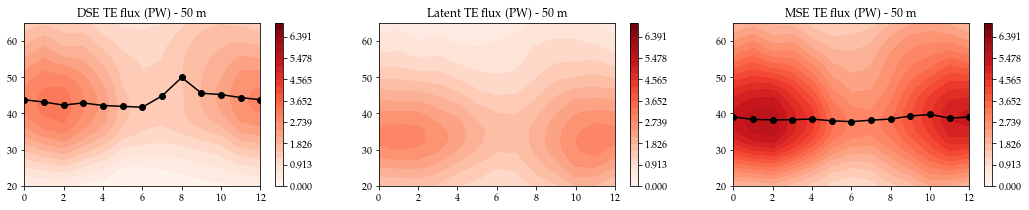

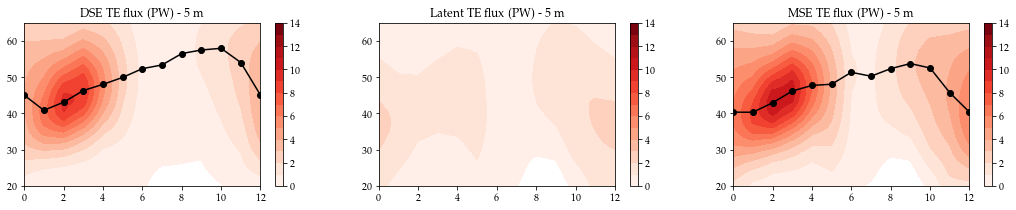

In [94]:
d=-4
def flux_plot(d,rr=np.arange(0,7,0.5)):
    py.figure(figsize=(18,3))
    py.subplot(1,3,1)
    py.contourf(range(13), lat_a, (TE_sens_a+TE_pot_a)[d,...],rr , cmap=py.cm.Reds); py.colorbar()
    py.title('DSE TE flux (PW) - %1d m'%(depth_values[d]))
    py.ylim(20,65)

    py.plot(Fo_dse_pos[d,0,:], 'ko-')
    py.subplot(1,3,2)
    py.contourf(range(13), lat_a, (TE_moist_a)[d,...], rr,cmap=py.cm.Reds); py.colorbar()
    py.title('Latent TE flux (PW) - %1d m'%(depth_values[d]))
    py.ylim(20,65)

    py.subplot(1,3,3)
    py.contourf(range(13), lat_a, (TE_sens_a+TE_pot_a+TE_moist_a)[d,...], rr,cmap=py.cm.Reds); py.colorbar()
    py.plot(Fo_mse_pos[d,0,:], 'ko-')
    py.title('MSE TE flux (PW) - %1d m'%(depth_values[d]))
    py.ylim(20,65)


flux_plot(-4,np.linspace(0,7,24))
flux_plot(1,np.arange(0,15,1))

In [95]:

Dy_mse   = spher_div_vert1(10**15*D_mse)
Gy_mse   = spher_div_vert1(10**15*divMSE)
Dy_dse   = spher_div_vert1(10**15*D_dse)
Gy_dse   = spher_div_vert1(10**15*divDSE)
Dy_sens  = spher_div_vert1(10**15*D_sens)
Gy_sens  = spher_div_vert1(10**15*divCpT)
Dy_moist = spher_div_vert1(10**15*D_moist)
Gy_moist = spher_div_vert1(10**15*divLq)
Dy_pot   = spher_div_vert1(10**15*D_pot)
Gy_pot   = spher_div_vert1(10**15*divgZ)


In [96]:
# D_phi_mse = F_D_mse_pos[:,1,:] - np.nanmean(Fo_mse_pos[:,0,:-1], axis=-1)[...,None]
# G_phi_mse = F_G_mse_pos[:,1,:] - np.nanmean(Fo_mse_pos[:,0,:-1], axis=-1)[...,None]

# D_phi_dse = F_D_dse_pos[:,1,:] - np.nanmean(Fo_dse_pos[:,0,:-1], axis=-1)[...,None]
# G_phi_dse = F_G_dse_pos[:,1,:] - np.nanmean(Fo_dse_pos[:,0,:-1], axis=-1)[...,None]

# Delta_Fo_mse_pos    =  Fo_mse_pos[:,0,:]-np.nanmean(Fo_mse_pos[:,0,:-1], axis=-1)[...,None]
# Delta_Fo_dse_pos    =  Fo_dse_pos[:,0,:]-np.nanmean(Fo_dse_pos[:,0,:-1], axis=-1)[...,None]


In [97]:
(div_TE_sens_a+div_TE_pot_a).shape

(12, 871, 13)

In [98]:
D_phi_mse = F_D_mse_pos[:,1,:] - mean_Fo_mse_pos[:,0,:]
G_phi_mse = F_G_mse_pos[:,1,:] - mean_Fo_mse_pos[:,0,:]

D_phi_dse = F_D_dse_pos[:,1,:] - mean_Fo_dse_pos[:,0,:]
G_phi_dse = F_G_dse_pos[:,1,:] - mean_Fo_dse_pos[:,0,:]

Delta_Fo_mse_pos    =  Fo_mse_pos[:,0,:]-mean_Fo_mse_pos[:,0,:]
Delta_Fo_dse_pos    =  Fo_dse_pos[:,0,:]-mean_Fo_dse_pos[:,0,:]


In [99]:
# Dy_mse   = spher_div_vert1(10**15*D_mse)
# Gy_mse   = spher_div_vert1(10**15*divMSE)
# Dy_dse   = spher_div_vert1(10**15*D_dse)
# Gy_dse   = spher_div_vert1(10**15*divDSE)
# Dy_sens  = spher_div_vert1(10**15*D_sens)
# Gy_sens  = spher_div_vert1(10**15*divCpT)
# Dy_moist = spher_div_vert1(10**15*D_moist)
# Gy_moist = spher_div_vert1(10**15*divLq)
# Dy_pot   = spher_div_vert1(10**15*D_pot)
# Gy_pot   = spher_div_vert1(10**15*divgZ)


(30, 60)

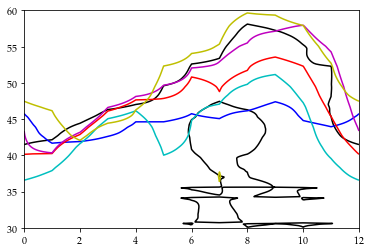

In [100]:
d=1
py.contour(range(13), lat_a, F_D_mse1[d,:,1,:], levels=[0], colors='k'); #py.colorbar()
py.contour(range(13), lat_a, F_G_mse1[d,:,1,:], levels=[0], colors='b'); #py.colorbar()
py.contour(range(13), lat_a, (div_TE_a)[d,:,:], levels=[0], colors='r'); #py.colorbar()

py.contour(range(13), lat_a, (div_TE_moist_a)[d,:,:], levels=[0], colors='c'); #py.colorbar()
py.contour(range(13), lat_a, (div_TE_sens_a)[d,:,:], levels=[0], colors='m'); #py.colorbar()
py.contour(range(13), lat_a, (div_TE_pot_a)[d,:,:], levels=[0], colors='y'); #py.colorbar()


py.ylim(30,60)
# py.contour(range(13), lat_a, -F_D_dse1[d,:,1,:], levels=[5], colors='k'); #py.colorbar()
# py.contour(range(13), lat_a, -F_G_dse1[d,:,1,:], levels=[0], colors='b'); #py.colorbar()
# py.contour(range(13), lat_a, -(div_TE_sens_a+div_TE_pot_a)[d,:,:], levels=[0], colors='r'); #py.colorbar()

py.ylim(30,60)


(30, 60)

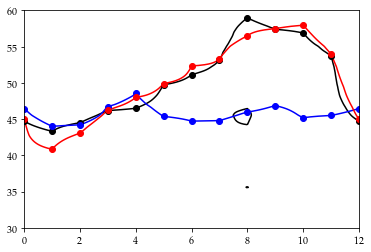

In [101]:
d=1

py.plot(F_D_dse_pos[d,1,:], 'ko')
py.contour(range(13), lat_a, -F_D_dse1[d,:,1,:], levels=[5], colors='k'); #py.colorbar()

py.plot(F_G_dse_pos[d,1,:], 'bo')
py.contour(range(13), lat_a, F_G_dse1[d,:,1,:], levels=[0], colors='b'); #py.colorbar()

py.plot(Fo_dse_pos[d,0,:], 'ro')
py.contour(range(13), lat_a, (div_TE_sens_a+div_TE_pot_a)[d,:,:], levels=[0], colors='r'); #py.colorbar()

py.ylim(30,60)
# py.plot(F_G_dse_pos[-4,1,:], 'b-')
# py.plot(Fo_dse_pos[-4,0,:], 'r-')
# py.ylim(mean_Fo_dse_pos[-4,0,0]-15, mean_Fo_dse_pos[-4,0,0]+15)
# py.show()

(30, 60)

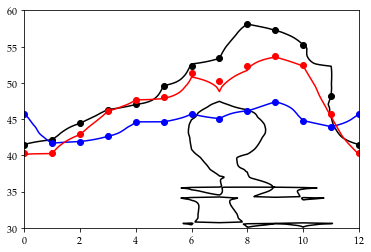

In [102]:
d=1

py.plot(F_D_mse_pos[d,1,:], 'ko')
py.contour(range(13), lat_a, F_D_mse1[d,:,1,:], levels=[0], colors='k'); #py.colorbar()

py.plot(F_G_mse_pos[d,1,:], 'bo')
py.contour(range(13), lat_a, F_G_mse1[d,:,1,:], levels=[0], colors='b'); #py.colorbar()

py.plot(Fo_mse_pos[d,0,:], 'ro')
py.contour(range(13), lat_a, (div_TE_sens_a+div_TE_pot_a+div_TE_moist_a)[d,:,:], levels=[0], colors='r'); #py.colorbar()

py.ylim(30,60)
# py.plot(F_G_dse_pos[-4,1,:], 'b-')
# py.plot(Fo_dse_pos[-4,0,:], 'r-')
# py.ylim(mean_Fo_dse_pos[-4,0,0]-15, mean_Fo_dse_pos[-4,0,0]+15)
# py.show()

/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


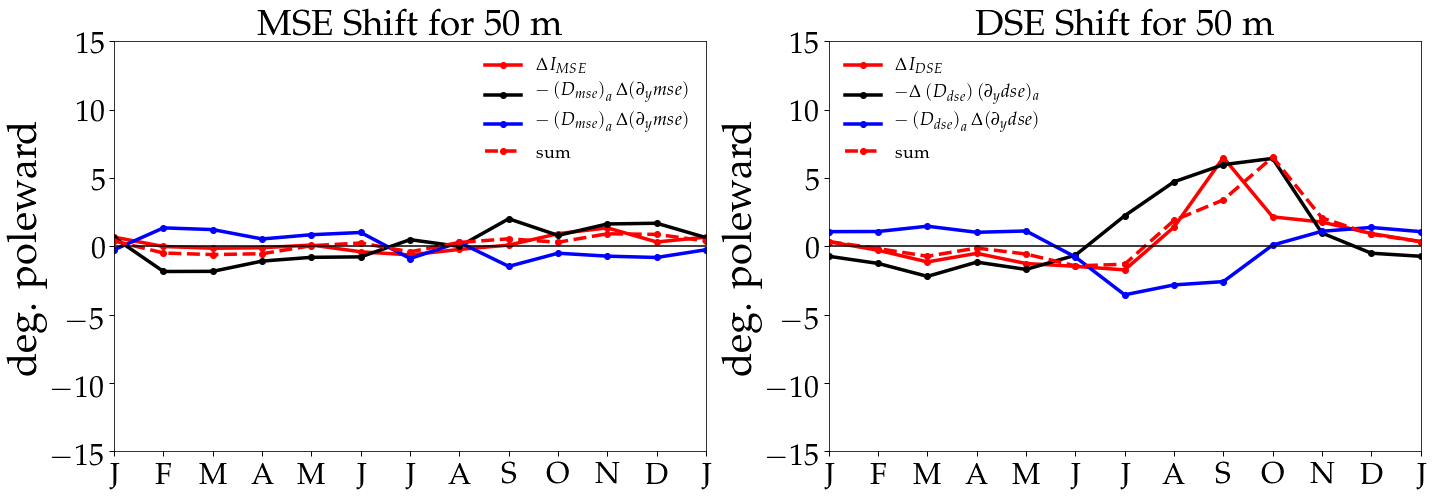

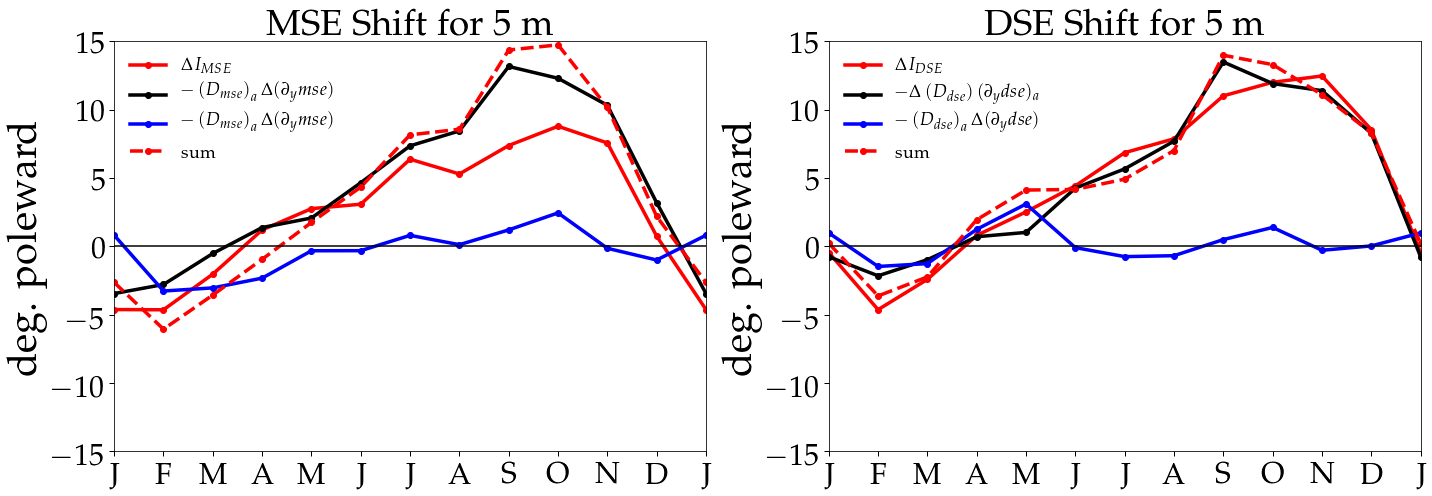

In [103]:
def prime(X):
    return X#-mean(X)

mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
p=1
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
l_range=((lat_a>=20) & (lat_a<=70)) 
for d in [-4,1]:
      
    py.figure(figsize=(20,7))
    
    py.subplot(1,2,1)
    py.plot(range(13), prime(Delta_Fo_mse_pos[d,:]),   'ro-', lw=3.5, label=r'$\Delta I_{MSE}$')
    py.plot(range(13), prime(D_phi_mse[d,:]), 'ko-', lw=3.5, label=r'$-\left(D_{mse}\right)_{a}\Delta(\partial_{y}{mse})$')
    py.plot(range(13), prime(G_phi_mse[d,:]), 'bo-', lw=3.5, label=  r'$-\left(D_{mse}\right)_{a}\Delta(\partial_{y}{mse})$')
    py.plot(range(13), prime(G_phi_mse[d,:])+prime(D_phi_mse[d,:]), 'ro--', lw=3.5, label=  'sum')

    #     py.ylim(-6,6)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
    py.legend( fontsize=18, loc='best',frameon=False)    #py.axhline(0,color='k')
    l=6; ylab= "deg. poleward"
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
    py.axhline(0,color='k')
    l=15
    py.ylim(-1*l,1*l)
    py.title("MSE Shift for %1d m"%(depth_values[d]),fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)    

    py.tight_layout()
    
    py.subplot(1,2,2)
    py.plot(range(13), prime(Delta_Fo_dse_pos[d,:]),   'ro-', lw=3.5, label=r'$\Delta I_{DSE}$')
    py.plot(range(13), prime(D_phi_dse[d,:]), 'ko-', lw=3.5, label=r'$-\Delta\left(D_{dse}\right)(\partial_{y}{dse})_{a}$')
    py.plot(range(13), prime(G_phi_dse[d,:]), 'bo-', lw=3.5, label=  r'$-\left(D_{dse}\right)_{a}\Delta(\partial_{y}{dse})$')
    py.plot(range(13), prime(G_phi_dse[d,:])+prime(D_phi_dse[d,:]), 'ro--', lw=3.5, label=  'sum')

    #     py.ylim(-6,6)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
    py.legend( fontsize=18, loc='best',frameon=False)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
    py.axhline(0,color='k')
    l=15
    py.ylim(-1*l,1*l)
    py.title("DSE Shift for %1d m"%(depth_values[d]),fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)    

    py.tight_layout()        
#     py.suptitle('%1d m'%(depth_values[d]), fontsize=35, y=1.05)
    py.savefig("Nov11/Isca_Diffusivity_shift_with_sum%1dm.pdf"%(depth_values[d]))
    

Text(0.5, 1.0, '-4')

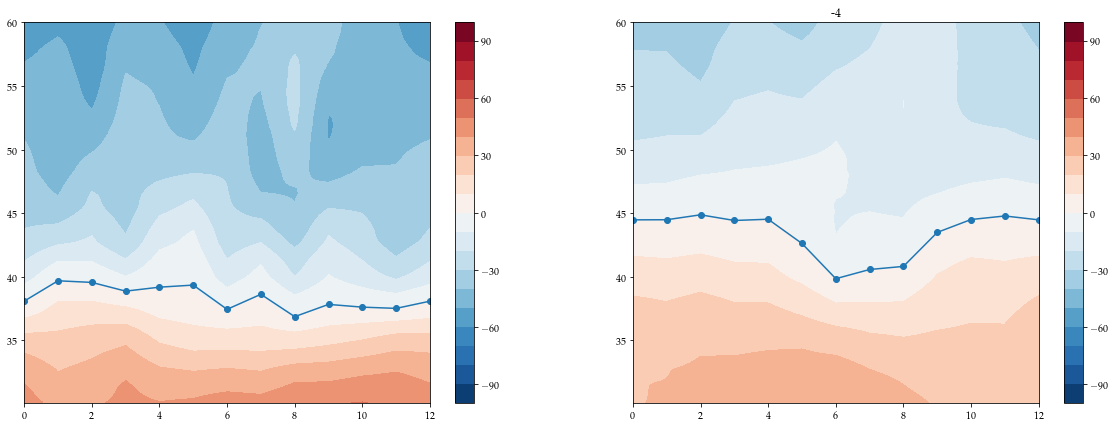

In [104]:
d=-4
py.figure(figsize=(20,7))
py.subplot(1,2,1)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_G_mse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_G_mse_pos[d,1,:],'o-')
py.subplot(1,2,2)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_G_dse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_G_dse_pos[d,1,:],'o-')
py.title(d)

Text(0.5, 1.0, '-4')

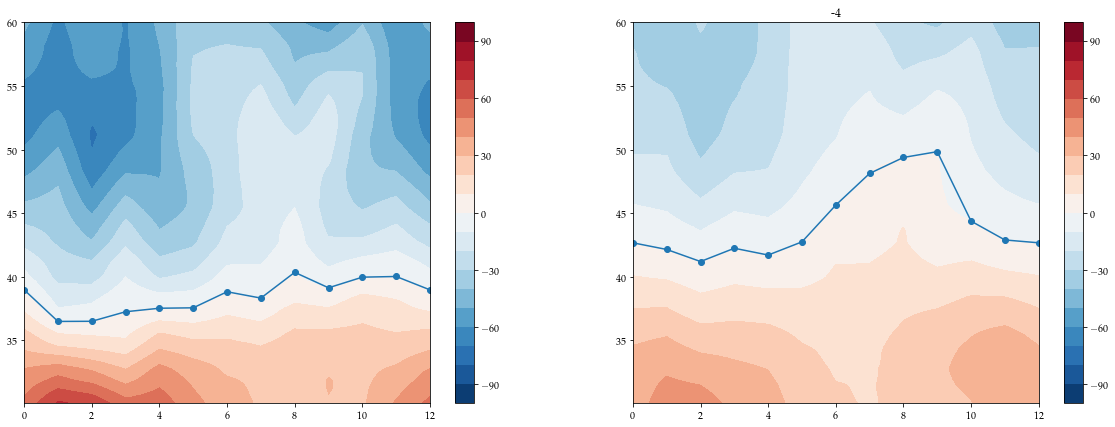

In [105]:
d=-4
py.figure(figsize=(20,7))
py.subplot(1,2,1)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_D_mse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_D_mse_pos[d,1,:],'o-')
py.subplot(1,2,2)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_D_dse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_D_dse_pos[d,1,:],'o-')
py.title(d)


Text(0.5, 1.0, '1')

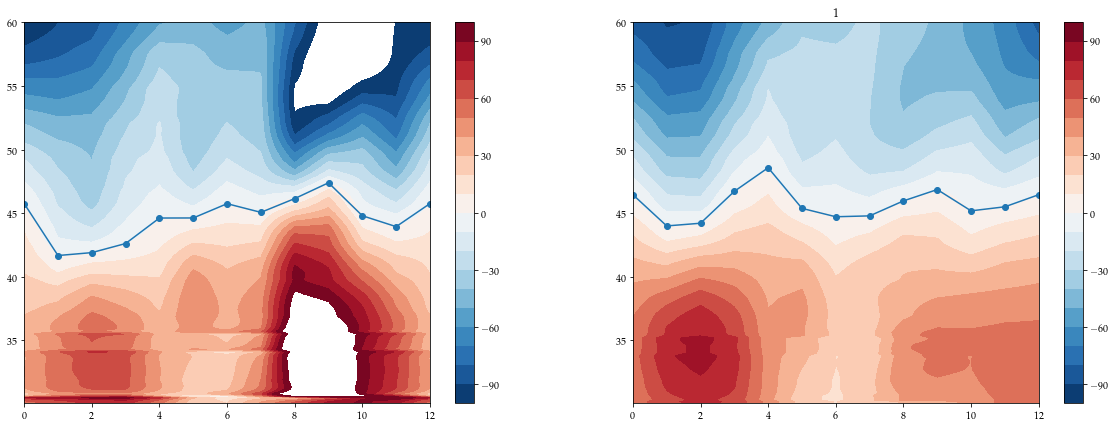

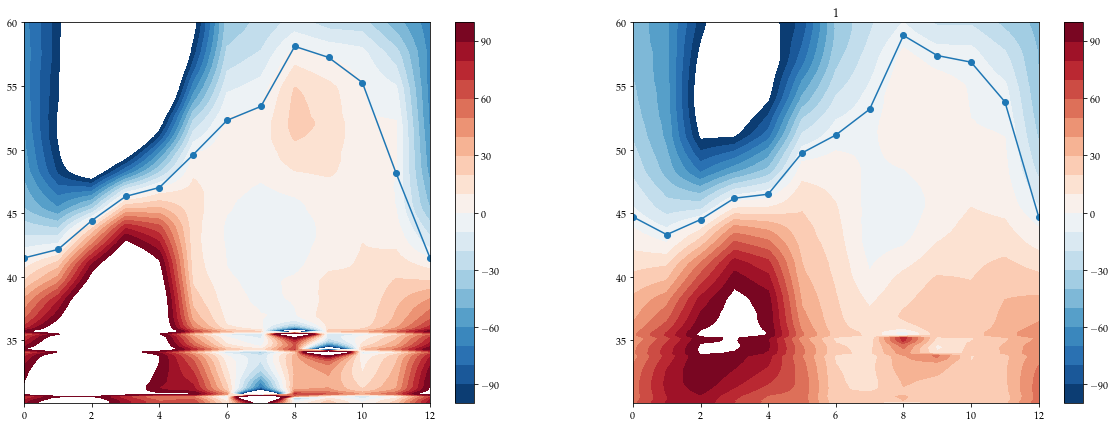

In [106]:
d=1
py.figure(figsize=(20,7))
py.subplot(1,2,1)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_G_mse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_G_mse_pos[d,1,:],'o-')
py.subplot(1,2,2)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_G_dse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_G_dse_pos[d,1,:],'o-')
py.title(d)

d=1
py.figure(figsize=(20,7))
py.subplot(1,2,1)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_D_mse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_D_mse_pos[d,1,:],'o-')
py.subplot(1,2,2)
l_range=((lat_a>=30) & (lat_a<=60)) 
py.contourf(range(13),lat_a[l_range],(F_D_dse1)[d,l_range,1,:], np.arange(-100,110,10), cmap= cm.RdBu_r); py.colorbar()
py.plot(F_D_dse_pos[d,1,:],'o-')
py.title(d)


In [107]:
level=level

threshold=0.001
high =10**10

mask_of_TE_a            = ma.masked_less(TE_a, threshold)  ### Positive transient eddies
mask_of_div_MSE_a       = ma.masked_greater(div_MSE[...,level,:], -1*threshold) ### Negative MSE gradient
masked_div_MSE_a        = ma.masked_where( ma.getmask(mask_of_div_MSE_a) , div_MSE[...,level,:])
masked_TE_a             = ma.masked_where( ma.getmask(mask_of_TE_a), TE_a)

def mask_of_extreme_high_low(y,high):
    sh   = ma.masked_greater(y, high)
    sl   = ma.masked_less(y, -1*high)  
    maskh= ma.getmask(sh)
    maskl= ma.getmask(sl)
    masked_s = ma.masked_where( maskh, y)
    masked_s = ma.masked_where( maskl, masked_s)
    return masked_s


def smooth_multi(y, box_pts,smoothing=1,ax=1):
    box = np.ones(box_pts)/box_pts
    y_smooth=np.apply_along_axis(np.convolve, ax, y, box, mode='same')
    if smoothing == 1 :
        return y_smooth
    else :
        return y
    

dm_by_dphi      =  masked_div_MSE_a
diffusivity_sfc = -masked_TE_a/dm_by_dphi


dm2_by_dphi2              = spher_div(div_MSE[...,level,:])*10**15
dm2_by_dphi2              = ma.masked_where( ma.getmask(mask_of_div_MSE_a), dm2_by_dphi2)
dm2_by_dphi2              = ma.masked_where( ma.getmask(mask_of_TE_a), dm2_by_dphi2)

div_diffusivity_sfc       = spher_div(diffusivity_sfc)*10**15
div_diffusivity_sfc       = ma.masked_where( ma.getmask(mask_of_TE_a), div_diffusivity_sfc)
div_diffusivity_sfc       = ma.masked_where( ma.getmask(mask_of_div_MSE_a), div_diffusivity_sfc)
div_diffusivity_sfc       = mask_of_extreme_high_low(div_diffusivity_sfc,high=10**9)

Im_dD_by_dphi             = -1*dm_by_dphi*div_diffusivity_sfc
D_dIm_by_dphi             = -1*diffusivity_sfc*dm2_by_dphi2

N=1
d1  =   smooth_multi(-1*mean(div_diffusivity_sfc)*prime(dm_by_dphi),N,-1) 
d2  =   smooth_multi(-1*prime(div_diffusivity_sfc)*mean(dm_by_dphi),N,1)
d3  =   smooth_multi(-1*prime(div_diffusivity_sfc)*prime(dm_by_dphi),N,1) 

d4  =   smooth_multi(-1*mean(diffusivity_sfc)*prime(dm2_by_dphi2),N,1)
d5  =   smooth_multi(-1*prime(diffusivity_sfc)*mean(dm2_by_dphi2),N,1)
d6  =   smooth_multi(-1*prime(diffusivity_sfc)*prime(dm2_by_dphi2),N,1)

d3m =   smooth_multi(-1*np.asarray( [np.squeeze(mean(d3))]*13).transpose(1,2,0),N)
d4m =   smooth_multi(-1*np.asarray( [np.squeeze(mean(d4))]*13).transpose(1,2,0),N)

F   =    mean(div_TE_a)

In [108]:
import numpy as np
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    div_TE_a=spher_div(TE_a*10**15)
    
    te=div_TE_a
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
    
    TE_change=base_pos+diff(div_TE_a)
    d1_change=base_pos+diff(d1)
    d2_change=base_pos+diff(d2)
    d3_change=base_pos+diff(d3)
    d4_change=base_pos+diff(d4)
    d5_change=base_pos+diff(d5)
    d6_change=base_pos+diff(d6)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(TE_change), a(d1_change), a(d2_change), a(d3_change), a(d4_change), a(d5_change), a(d6_change)

d_changes = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

In [109]:
def find_zero(div,i,zero=0):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            if ((d==0) & ((m==6) | (m==7) | (m==8)) & (i==2)) :
               #print d, m 
               l_range=((lat_a>=45) & (lat_a<=60))
            else:
                l_range=((lat_a>=33) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(zero)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [110]:
def threshold(I,value, position):
      for d in range(len(DEPTHS)):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                for l in range(np.shape(position)[0]):
                   position[l][d,m]=np.nan
      return position

positions = threshold(Intensity_te, 0.00, [find_zero(d_changes[i],i) for i in range(7)])
positions[0]= find_zero(d_changes[0],0,zero=0)

In [111]:
# p=1
# py.rc('text', usetex=True)
# py.rc('font', family='serif', serif='Palatino',weight='bold')
# l_range=((lat_a>=20) & (lat_a<=70)) 
# for d in [1,-4]:
    
#     py.figure(figsize=(15,4))
    
#     py.subplot(1,2,1)
#     py.plot(range(13), prime(Intensity_te_sens+Intensity_te_moist+Intensity_te_pot)[d,:],   'r.-', label=r'$\Delta I_{MSE}$')
#     py.plot(range(13),(delta_Dsens_mean_divCpT_a+delta_Dmoist_mean_divLq_a+delta_Dpot_mean_divgZ_a)[d,p,:],'k.-',label=r"$-\Delta\left(D_{T}\right)\partial_{y}(C_{p}T)_{a}-\Delta\left(D_{q}\right)\partial_{y}(Lq)_{a}-\Delta\left(D_{z}\right)\partial_{y}(gZ)_{a}$")     
#     py.plot(range(13),(mean_Dsens_delta_divCpT_a+mean_Dmoist_delta_divLq_a+mean_Dpot_delta_divgZ_a)[d,p,:], 'b.-', label=r"$-\left(D_{T}\right)_{a}\Delta\partial_{y}(C_{p}T)-\left(D_{q}\right)_{a}\Delta\partial_{y}(Lq)-\left(D_{z}\right)_{a}\Delta\partial_{y}(gZ)$")
#     py.ylim(-6,6)
#     py.xlim(0,12)
#     py.tick_params(labelsize=15,size=4,width=2)
#     if d==1:
#         py.legend( fontsize=17, bbox_to_anchor=(0.02,1.0),frameon=False)
#     py.axhline(0,color='k')
#     py.tight_layout()
    
#     py.subplot(1,2,2)
#     py.plot(range(13), prime(Intensity_te_sens+Intensity_te_pot)[d,:],   'r.-', label=r'$\Delta I_{DSE}$')
#     py.plot(range(13), (delta_Dsens_mean_divCpT_a+delta_Dpot_mean_divgZ_a)[d,p,:], 'k.-', label=r"$-\Delta\left(D_{T}\right)\partial_{y}(C_{p}T)_{a}-\Delta\left(D_{z}\right)\partial_{y}(gZ)_{a}$")
#     py.plot(range(13), (mean_Dsens_delta_divCpT_a+mean_Dpot_delta_divgZ_a)[d,p,:], 'b.-', label=r"$-\left(D_{T}\right)_{a}\Delta\partial_{y}(C_{p}T)-\left(D_{z}\right)_{a}\Delta\partial_{y}(gZ)$")
#     py.ylim(-6,6)
#     py.xlim(0,12)
#     py.tick_params(labelsize=18,size=4,width=2)
#     if d==1:
#         py.legend( fontsize=17, bbox_to_anchor=(0.2,1.0),frameon=False)
#     py.axhline(0,color='k')
#     py.tight_layout()
        
#     py.suptitle('%1d m'%(depth_values[d]), fontsize=25, y=1.05)
    
    

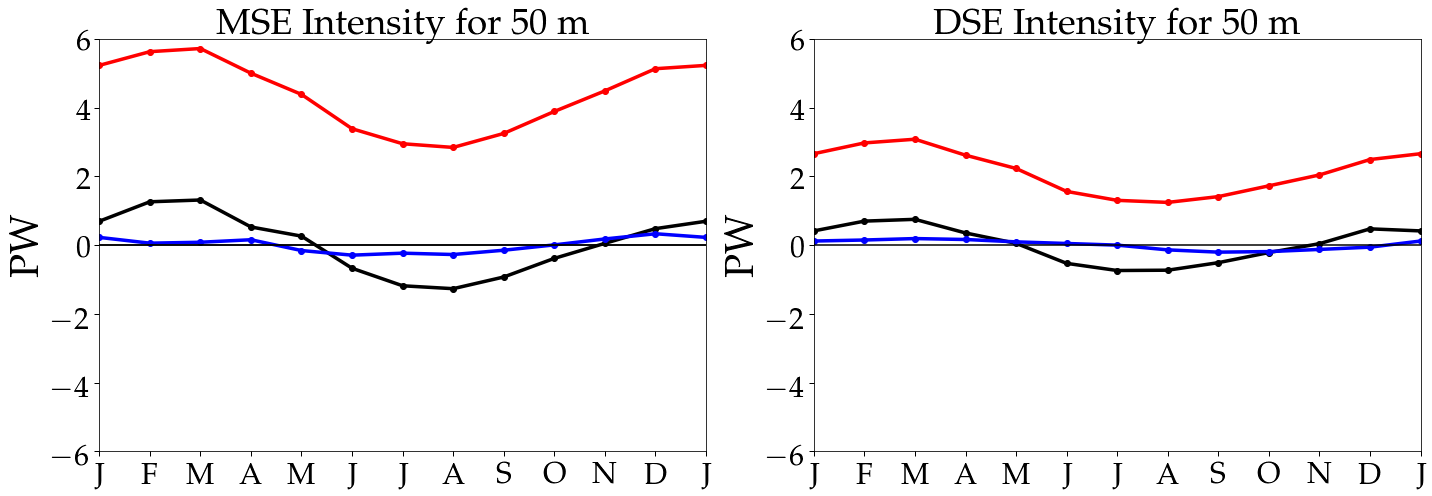

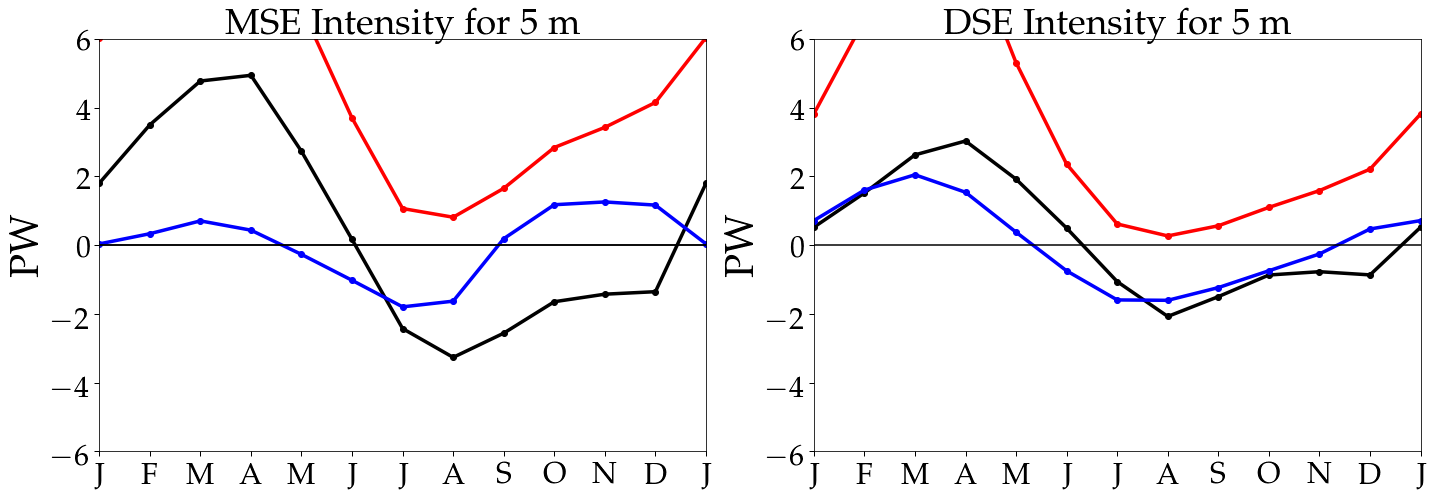

In [112]:
mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
p=1
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
l_range=((lat_a>=20) & (lat_a<=70)) 
for d in [-4,1]:
    
   
    py.figure(figsize=(20,7))
    
    py.subplot(1,2,1)
    py.plot(range(13), prime(Intensity_te_sens+Intensity_te_moist+Intensity_te_pot)[d,:],   'ro-', lw=3.5, label=r'$\Delta I_{MSE}$')
    py.plot(range(13), (delta_Dmse_mean_divMSE_a)[d,p,:], 'ko-', lw=3.5, label=r'$-\left(D_{mse}\right)_{a}\Delta(\partial_{y}{mse})$')
    py.plot(range(13), (mean_Dmse_delta_divMSE_a)[d,p,:], 'bo-', lw=3.5, label=  r'$-\left(D_{mse}\right)_{a}\Delta(\partial_{y}{mse})$')
    py.ylim(-6,6)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
#     if d==1:
#         py.legend( fontsize=18, bbox_to_anchor=(0.05,1.0),frameon=False)
    py.axhline(0,color='k')
    l=6; ylab= "PW"
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title("MSE Intensity for %1d m"%(depth_values[d]),fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)    

    py.tight_layout()
    
    py.subplot(1,2,2)
    py.plot(range(13), prime(Intensity_te_sens+Intensity_te_pot)[d,:],   'ro-', lw=3.5, label=r'$\Delta I_{DSE}$')
    py.plot(range(13), (delta_Ddse_mean_divDSE_a)[d,p,:], 'ko-', lw=3.5, label=r'$-\Delta\left(D_{dse}\right)(\partial_{y}{dse})_{a}$')
    py.plot(range(13), (mean_Ddse_delta_divDSE_a)[d,p,:], 'bo-', lw=3.5, label=  r'$-\left(D_{dse}\right)_{a}\Delta(\partial_{y}{dse})$')
    py.ylim(-6,6)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
#     if d==1:
#         py.legend( fontsize=18, bbox_to_anchor=(0.05,1.0),frameon=False)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title("DSE Intensity for %1d m"%(depth_values[d]),fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)    

    py.tight_layout()        
#     py.suptitle('%1d m'%(depth_values[d]), fontsize=35, y=1.05)
#     py.savefig("May8/Diffusivity_intensity_%1dm.pdf"%(depth_values[d]))


/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


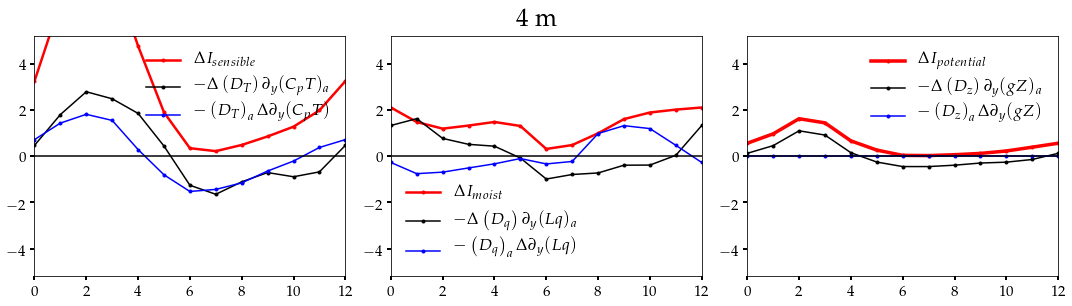

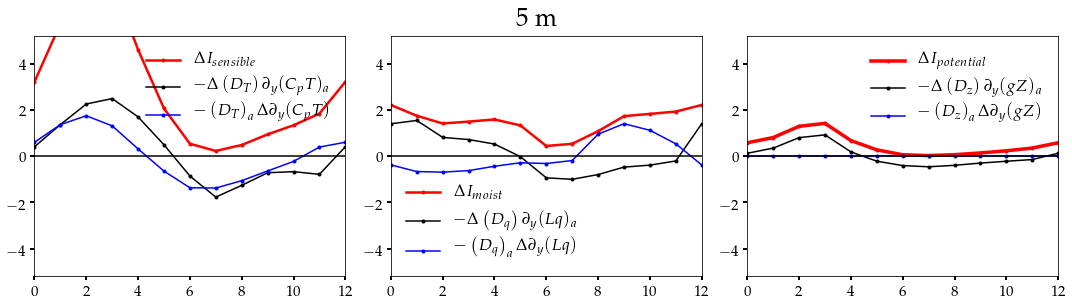

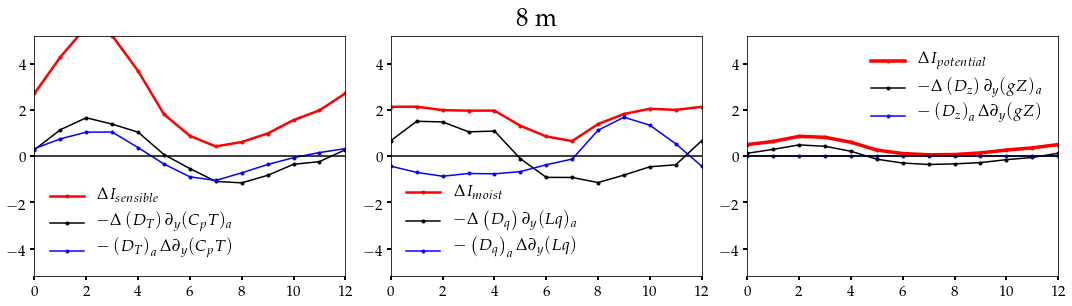

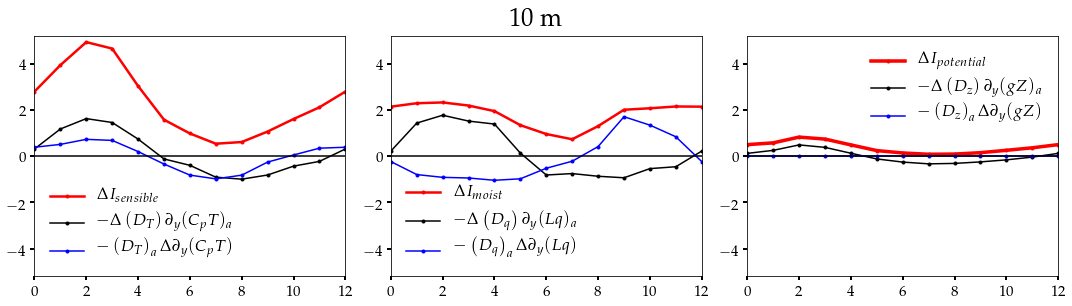

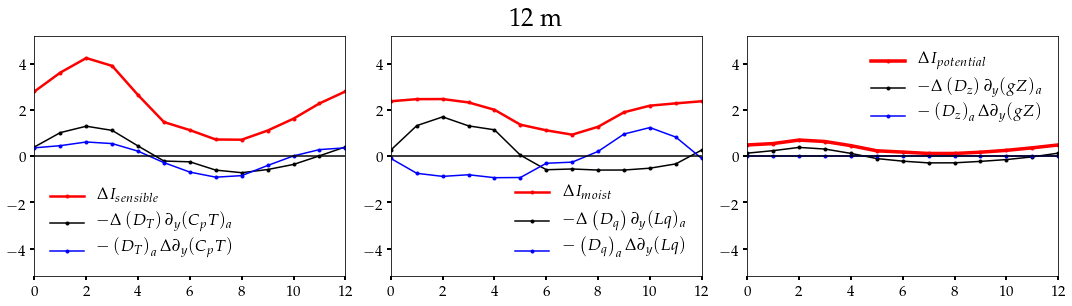

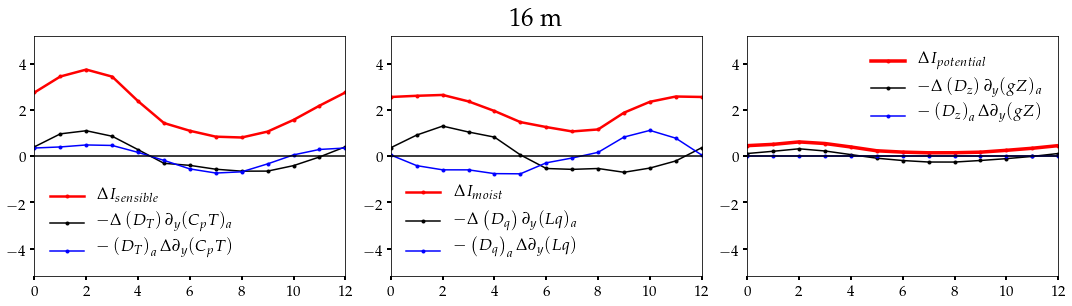

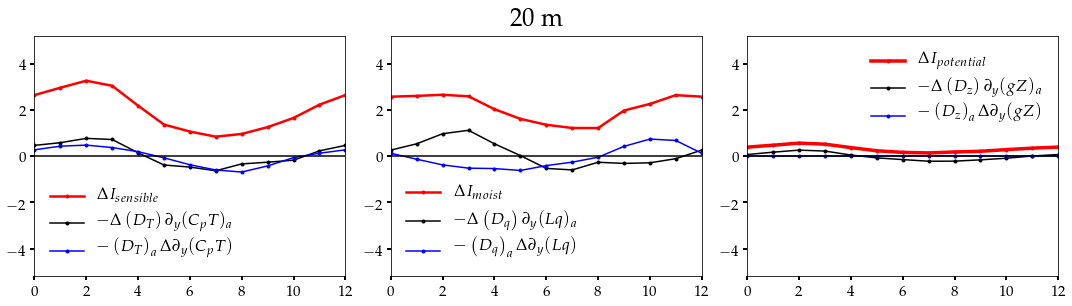

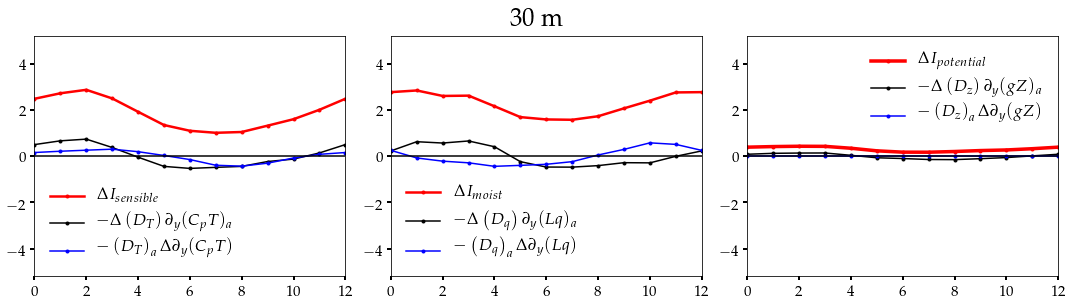

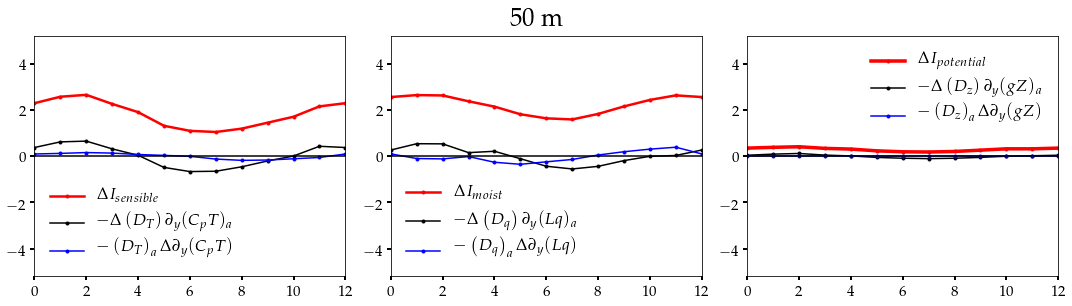

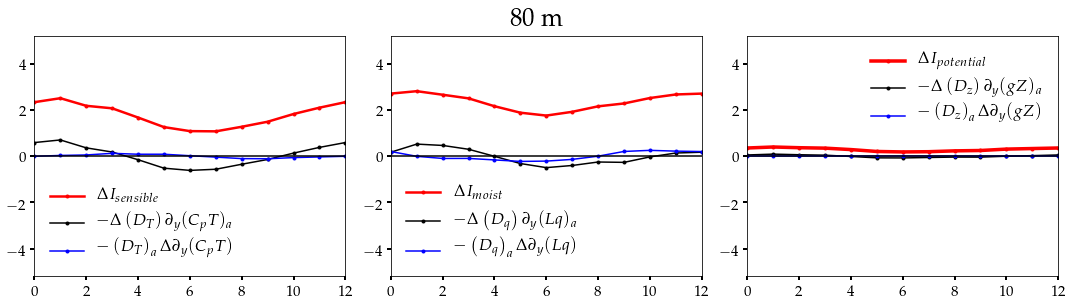

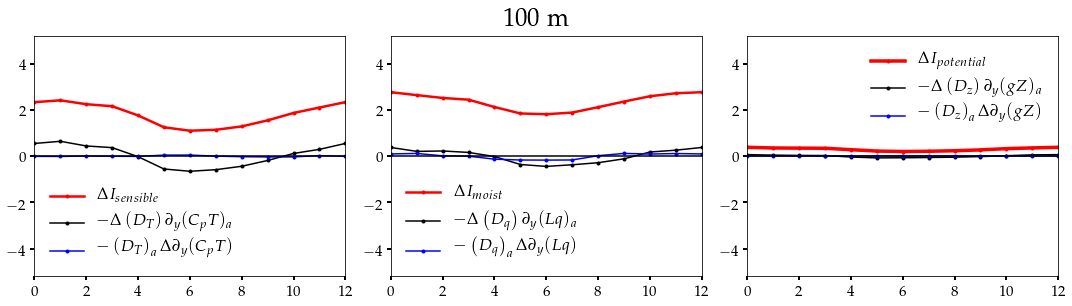

In [113]:
p=1
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
l_range=((lat_a>=20) & (lat_a<=70)) 
for d in range(len(depth_values[:-1])):
    
    py.figure(figsize=(15,4))
    
    py.subplot(1,3,1)
    py.plot(range(13), prime(Intensity_te_sens)[d,:],    'r.-', lw=2.5, label=r'$\Delta I_{sensible}$')
    py.plot(range(13), delta_Dsens_mean_divCpT_a[d,p,:], 'k.-', label=r'$-\Delta\left(D_{T}\right)\partial_{y}(C_{p}T)_{a}$')
    py.plot(range(13), mean_Dsens_delta_divCpT_a[d,p,:], 'b.-', label=r'$-\left(D_{T}\right)_{a}\Delta\partial_{y}(C_{p}T)$')
    py.ylim(-5.2,5.2)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
    py.legend( fontsize=17, loc='best', frameon=False)
    py.axhline(0,color='k')
    py.tight_layout()
    
    py.subplot(1,3,2)
    py.plot(range(13), prime(Intensity_te_moist)[d,:],   'r.-', lw=2.5, label=r'$\Delta I_{moist}$')
    py.plot(range(13), delta_Dmoist_mean_divLq_a[d,p,:], 'k.-', label=r'$-\Delta\left(D_{q}\right)\partial_{y}(Lq)_{a}$')
    py.plot(range(13), mean_Dmoist_delta_divLq_a[d,p,:], 'b.-', label=r'$-\left(D_{q}\right)_{a}\Delta\partial_{y}(Lq)$') 
    py.ylim(-5.2,5.2)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
    py.legend( fontsize=17, loc='best', frameon=False)
    py.axhline(0,color='k')
    py.tight_layout()
    
    py.subplot(1,3,3)
    py.plot(range(13), prime(Intensity_te_pot)[d,:],     'r.-', lw=3.5, label=r'$\Delta I_{potential}$')
    py.plot(range(13), delta_Dpot_mean_divgZ_a[d,p,:],   'k.-', label=r'$-\Delta\left(D_{z}\right)\partial_{y}(gZ)_{a}$')
    py.plot(range(13), mean_Dpot_delta_divgZ_a[d,p,:],   'b.-', label=r'$-\left(D_{z}\right)_{a}\Delta\partial_{y}(gZ)$') 
    py.ylim(-5.2,5.2)
    py.xlim(0,12)
    py.tick_params(labelsize=15,size=4,width=2)
    py.legend( fontsize=17, loc='best', frameon=False)
    py.axhline(0,color='k')
    py.tight_layout()
    
    py.suptitle('%1d m'%(depth_values[d]), fontsize=25, y=1.05)


In [ ]:
    D_sens[...,p,:]  = -TE_sens_a /divCpT[...,p,:]
    D_moist[...,p,:] = -TE_moist_a/divLq[...,p,:]
    D_pot[...,p,:]   = -TE_pot_a  /divgZ[...,p,:]
    D_mse[...,p,:]   = -TE_a      /divMSE[...,p,:]
    D_dse[...,p,:]   = -(TE_sens_a+TE_pot_a)/divDSE[...,p,:]


In [141]:
D_sens.shape

(12, 871, 40, 13)

In [144]:
np.shape(depth_values)

(12,)

<Figure size 432x288 with 0 Axes>

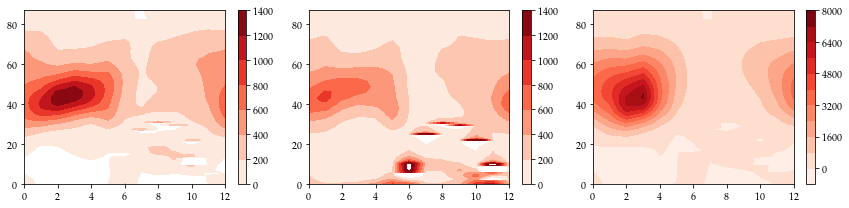

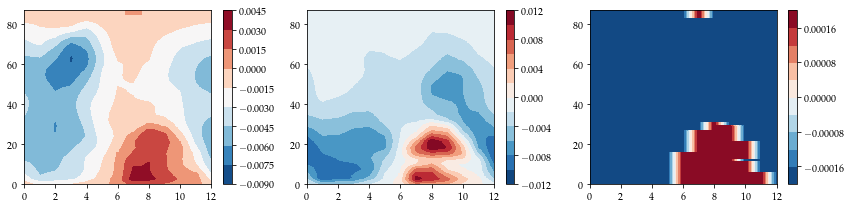

In [159]:
py.figure(1)
d=1
py.figure(figsize=(12,3))
py.subplot(1,3,1)
py.contourf(range(13), lat_a, D_sens[d,:,0,:],  np.arange(0,1500,200), cmap=py.cm.Reds); py.colorbar()
py.subplot(1,3,2)
py.contourf(range(13), lat_a, D_moist[d,:,0,:], np.arange(0,1500,200), cmap=py.cm.Reds); py.colorbar()
py.subplot(1,3,3)
py.contourf(range(13), lat_a, D_pot[d,:,0,:], 10, cmap=py.cm.Reds); py.colorbar()
py.tight_layout()

py.figure(2)
d=1
py.figure(figsize=(12,3))
py.subplot(1,3,1)
py.contourf(range(13), lat_a, divCpT[d,:,1,:],  10, cmap=py.cm.RdBu_r); py.colorbar()
py.subplot(1,3,2)
py.contourf(range(13), lat_a, divLq[d,:,1,:], 10, cmap=py.cm.RdBu_r); py.colorbar()
py.subplot(1,3,3)
py.contourf(range(13), lat_a, divgZ[d,:,1,:], 10, cmap=py.cm.RdBu_r); py.colorbar()
py.tight_layout()

# Dy_mse   = spher_div_vert1(10**15*D_mse)
# Gy_mse   = spher_div_vert1(10**15*divMSE)
# Dy_dse   = spher_div_vert1(10**15*D_dse)
# Gy_dse   = spher_div_vert1(10**15*divDSE)
# Dy_sens  = spher_div_vert1(10**15*D_sens)
# Gy_sens  = spher_div_vert1(10**15*divCpT)
# Dy_moist = spher_div_vert1(10**15*D_moist)
# Gy_moist = spher_div_vert1(10**15*divLq)
# Dy_pot   = spher_div_vert1(10**15*D_pot)
# Gy_pot   = spher_div_vert1(10**15*divgZ)

In [157]:
divCpT[...,:,:].shape

(12, 871, 40, 13)

In [ ]:
# amp_PNE_NH_SH = np.array([ 50.85997198,  24.14184012])

# # def amp(X):
# #     A=np.zeros(len(DEPTHS))
# #     for d in range(len(DEPTHS)):
# #        A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
# #     return A

# def amp(X):
#     A=np.zeros(len(DEPTHS))
#     for d in range(len(DEPTHS)):
#        A[d]=(X[d,1])-(X[d,6]) 
#     return np.abs(A)

# py.rc('text', usetex=True)
# py.rc('font', family='serif', serif='Palatino',weight='bold')

# py.figure(figsize=(14,15))


# py.subplot(3,1,1) 
# color = 'r'
# py.ylabel(r"$Wm^{-2}$", fontsize=25, color='k', x=2.0)  # we already handled the x-label with ax1
# py.plot(np.array(depth_values)[:-1],L*amp(P_precip)[:-1],'s-',color='b', lw=2.0,mfc='none',markersize=12,label=r'$\Delta {LP}$'); 
# py.plot(np.array(depth_values)[:-1], amp(P_dmoistdt)[:-1],'d-',color='m', lw=2.0,mfc='none',markersize=12,label=r'$\Delta {d(Lq)/dt}$'); 
# py.plot(depth_values[:-2],amp(P_lhflx)[:-2],'o-',color='r', lw=2.5,mfc='none',markersize=15,label=r'$\Delta {LE}$'); 
# py.tick_params(axis='y', labelcolor='k', labelsize=20, size=4, width=2 )
# py.tick_params(axis='x', labelsize=20,size=4,width=2)
# py.legend(loc='best',ncol= 1,fontsize=25,frameon=False)
# # py.ylim(120,310)
# py.title('seasonal amplitude [Feb - July]', fontsize=25)
# py.xticks(depth_values[:-1])
# py.tight_layout()  # otherwise the right y-label is slightly clipped
# py.axhline(0,color='k')
# py.xlim(-2,85)
# # py.savefig('Jan28/critical_depth.pdf')
# py.show()

In [ ]:
amp_PNE_NH_SH = np.array([ 50.85997198,  24.14184012])

some_depths = [0,1,2,4,5,6,7,8,9]
tend_depths = [0,1,2,3,4,5,6,7,8,9]
# def amp(X):
#     A=np.zeros(len(DEPTHS))
#     for d in range(len(DEPTHS)):
#        A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
#     return A

def amp(X):
    A=np.zeros(len(DEPTHS))
    for d in range(len(DEPTHS)):
       A[d]=(X[d,1])-(X[d,6]) 
    return A

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

py.figure(figsize=(14,15))


py.subplot(3,1,1) 
color = 'r'
py.ylabel(r"$PW$", fontsize=25, color='k', x=2.0)  # we already handled the x-label with ax1
py.plot(np.array(depth_values)[some_depths],L*amp(I_precip/(24.0*60.0*60.0))[some_depths],'s-',color='r', lw=2.0,mfc='none',markersize=12,label=r'$\Delta I_{LP}$'); 
py.plot(np.array(depth_values)[tend_depths], amp(I_dmoistdt)[tend_depths],'d-',color='m', lw=2.0,mfc='none',markersize=12,label=r'$\Delta I_{d(Lq)/dt}$'); 
py.plot(depth_values[:-2],amp(I_lhflx)[:-2],'o-',color='b', lw=2.5,mfc='none',markersize=15,label=r'$\Delta I_{LE}$'); 
py.tick_params(axis='y', labelcolor='k', labelsize=20, size=4, width=2 )
py.tick_params(axis='x', labelsize=20,size=4,width=2)
py.legend(loc='best',ncol= 1,fontsize=25,frameon=False)
# py.ylim(120,310)
py.title('seasonal amplitude [Feb - July]', fontsize=25)
py.xticks(depth_values[:-1])
py.tight_layout()  # otherwise the right y-label is slightly clipped
py.axhline(0,color='k')
py.xlim(-2,85)
# py.savefig('Jan28/critical_depth.pdf')
py.show()

In [ ]:
# py.rc('text', usetex=True)
# py.rc('font', family='serif', serif='Palatino',weight='bold')

# py.figure(figsize=(14,15))


# py.subplot(3,1,1) 
# color = 'r'
# py.ylabel(r"$Wm^{-2}$", fontsize=25, color='k', x=2.0)  # we already handled the x-label with ax1
# py.plot(depth_values[:-1],Intensity_te[:-1,:-1].mean(axis=-1),'s-',color='b', lw=2.0,mfc='none',markersize=12,label=r'$\Delta F_{SFC}$'); 
# py.tick_params(axis='y', labelcolor='k', labelsize=20, size=4, width=2 )
# py.tick_params(axis='x', labelsize=20,size=4,width=2)
# py.xlim(-2,105)
# py.legend(loc='best',ncol= 2,fontsize=25,frameon=False)
# # py.ylim(120,310)
# py.title(r' Annual mean intensity' , fontsize=25)
# py.xticks(depth_values[:-1])



# py.subplot(3,1,2) 
# color = 'r'
# py.ylabel(r"$Wm^{-2}$", fontsize=25, color='k', x=2.0)  # we already handled the x-label with ax1
# py.plot(depth_values[:-1],storm_pos[:-1,:-1].mean(axis=-1),'s-',color='b', lw=2.0,mfc='none',markersize=12,label=r'$\Delta F_{SFC}$'); 
# py.tick_params(axis='y', labelcolor='k', labelsize=20, size=4, width=2 )
# py.tick_params(axis='x', labelsize=20,size=4,width=2)
# py.xticks(depth_values[:-1])
# py.xlim(30,100)
# py.legend(loc='best',ncol= 2,fontsize=25,frameon=False)
# # py.ylim(120,310)
# py.ylim(36,40)
# py.title(r' Annual mean  position' , fontsize=25)
# # py.xticks(depth_values[:-1])
# py.tight_layout()  # otherwise the right y-label is slightly clipped

# py.tight_layout()  # otherwise the right y-label is slightly clipped

# Shift decomposition

In [ ]:
def check_depth(de):
    de_values=np.array(depth_values)
    d=np.squeeze(np.where((de_values)==de))
    return d

import numpy as np
def calculate_F_changes_from_depth_change(df,di):
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)

    def diff(x):
         return x[df,:,:]-x[di,:,:]
    base_pos=te[di,:,:]
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: x#np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

In [ ]:
def find_zero_for_depth_change(div, di, df,mm=0):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((months))

  for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if ( (df==1) & (m==9) & (mm==1) ):
                l_range=((lat_a>=47) & (lat_a<=60))
            elif ( (df==1) & (m==8) & (mm==1) ):
                l_range=((lat_a>=47) & (lat_a<=60))
            else :
                l_range=((lat_a>=30) & (lat_a<=60))
            interpolation_function = interp1d(div[l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[m]=np.nan        
  return zero_loc

def return_zeros(pos1, pos2, pos3, pos4, di, df):             
       return find_zero_for_depth_change(pos1,di, df), find_zero_for_depth_change(pos2,di, df, 1), find_zero_for_depth_change(pos3,di, df), find_zero_for_depth_change(pos4,di, df)   


In [ ]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(df,di,l,n) :

        
    df=check_depth(df)
    di=check_depth(di)
    
    SE_change, MM_change, TE_change, NE_change = calculate_F_changes_from_depth_change(df,di)
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = return_zeros((TE_change), (SE_change), (MM_change), (NE_change), di, df)
        
    n=d+1      
    m=range(0,13)
   
    def add_month_to_end(y1) :
        y=y1#np.append(y1[-1],y1)
        return y
        

    s=div_TE_a[di,:,:][None,:,:]
    base_pos=storm_pos[di,:]
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']

    TE_obs_pos         = add_month_to_end(zero_div_TE-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)
    
    #title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1=str(depth_values[df])+r"$m - $"+str(depth_values[di])+r"$ m$"
    py.title(title1,fontsize=40,y=1.03)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()


In [ ]:
# df=check_depth(5)
# di=check_depth(10)
# SE_change, MM_change, TE_change, NE_change = calculate_F_changes_from_depth_change(df,di)
# zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = return_zeros((TE_change), (SE_change), (MM_change), (NE_change), di, df)

In [ ]:
# fig=py.figure(figsize=(20, 7))
# py.subplot(1,2,1)
# plot_monthly_shift(df=5,di=10,l=20,n=0)
# py.subplot(1,2,2)
# plot_monthly_shift(df=10,di=50,l=10*2,n=2)
# # py.subplot(2,2,4)
# # plot_monthly_shift(df=50,di=100,l=20,n=3)
# # py.savefig('/project2/tas1/pragallva/Summer_quarter_2018/figures/Isca/shift_diff_betw_depths.pdf')

# First figure

In [ ]:
# amp_PNE_NH_SH = np.array([ 50.85997198,  24.14184012])

# def amp(X):
#     A=np.zeros(len(DEPTHS))
#     for d in range(len(DEPTHS)):
#        A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
#     return A


# py.rc('text', usetex=True)
# py.rc('font', family='serif', serif='Palatino',weight='bold')

# py.figure(figsize=(14,8))
# ax1 = py.subplot(2,1,1) 
# color = 'm'
# # ax1.set_xlabel('Mixed layer depth')
# ax1.set_ylabel(r"$Wm^{-2}$", fontsize=25, color=color)
# ax1.plot(depth_values[:-1],amp(P_NE)[:-1],'o-',color=color, lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{NE}$'); 
# # ax1.plot(efolding_depth(P_NE)[1], efolding_depth(P_NE)[2], 'm-', lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{NE}$ exp fit')
# # ax1.hlines(y=amp_PNE_NH_SH[0],color='r',xmin=-5, xmax=5)
# # ax1.hlines(y=amp_PNE_NH_SH[1],color='b',xmin=-5, xmax=5)

# ax1.scatter(-1, amp_PNE_NH_SH[0], marker=">", s=200, c='y')
# ax1.scatter(-1, amp_PNE_NH_SH[1], marker=">", s=200, c='c')

# ax1.tick_params(axis='y', labelcolor=color, labelsize=20, size=4, width=2)
# ax1.set_xticks(depth_values[:-1])
# ax1.tick_params(axis='x', labelsize=20,size=4,width=2)
# ax1.set_xlim(-2,110)
# py.legend(loc='lower right',fontsize=25,frameon=False)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'r'
# ax2.set_ylabel(r"$Wm^{-2}$", fontsize=25, color=color, x=2.0)  # we already handled the x-label with ax1
# ax2.plot(depth_values[:-1],amp(P_sfc)[:-1],'s-',color='b', lw=2.0,mfc='none',markersize=12,label=r'$\Delta F_{SFC}$'); 
# ax2.plot(depth_values[:-1],amp(P_toa)[:-1],'o-',color='r', lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{TOA}$'); 
# ax2.plot(depth_values[:-1],amp(P_SWsfc)[:-1],'o--',color='r', lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{TOA}$'); 
# ax2.tick_params(axis='y', labelcolor=color, labelsize=20, size=4, width=2 )
# ax2.tick_params(axis='x', labelsize=20,size=4,width=2)
# ax2.set_xlim(-2,110)
# py.legend(loc='best',ncol= 2,fontsize=25,frameon=False)
# py.ylim(120,310)
# py.title(r'$F_{NE}$ ,  '+r'$ F_{SFC}$,  '+ r'$ F_{TOA}$'  +' seasonal amplitude', fontsize=25)

# py.tight_layout()  # otherwise the right y-label is slightly clipped


# ax3 = py.subplot(2,1,2)
# ax3.plot(depth_values[:-1],-lag[:-1],'ko-',lw=2.5,mfc='none',markersize=15);
# ax3.scatter(-1, 0, marker=">", s=200, c='y')
# ax3.scatter(-1, 6, marker=">", s=200, c='c')
# ax3.set_xlim(-2,110)
# py.ylim(-1,7)
# py.xticks(depth_values[:-1])
# py.tick_params(labelsize=20,size=4,width=2)
# py.ylabel('months', fontsize=25)
# py.xlabel("Mixed layer depth", fontsize=25)
# py.title('Phase lag between SWABS and SHF', fontsize=25)

# py.tight_layout()

# # py.savefig('Jan28/critical_depth.pdf')
# py.show()

In [115]:
# def amp(X):
#     A=np.zeros(len(DEPTHS))
#     for d in range(len(DEPTHS)):
#        A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
#     return A


# py.rc('text', usetex=True)
# py.rc('font', family='serif', serif='Palatino',weight='bold')

# py.figure(figsize=(14,8))
# ax1 = py.subplot(2,1,1) 
# color = 'b'
# # ax1.set_xlabel('Mixed layer depth')
# ax1.set_ylabel(r"PW", fontsize=25, color=color)
# ax1.plot(depth_values[:-1],Intensity_te[:-1,:-1].mean(axis=-1),'o-',color=color, lw=2.5,mfc='none',markersize=15,label='Intensity'); 

# # ax1.scatter(-1, amp_PNE_NH_SH[0], marker=">", s=200, c='y')
# # ax1.scatter(-1, amp_PNE_NH_SH[1], marker=">", s=200, c='c')

# ax1.tick_params(axis='y', labelcolor=color, labelsize=20, size=4, width=2)
# ax1.set_xticks(depth_values[:-1])
# ax1.tick_params(axis='x', labelsize=20,size=4,width=2)
# ax1.set_xlim(-2,110)
# # ax1.set_ylim(4,5.5)
# py.legend(loc='upper center',fontsize=25,frameon=False)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'r'
# ax2.set_ylabel(r"deg poleward", fontsize=25, color=color, x=2.0)  # we already handled the x-label with ax1
# ax2.plot(depth_values[:-1],storm_pos[:-1,:-1].mean(axis=-1),'s-',color=color, lw=2.0,mfc='none',markersize=12,label='Position'); 
# ax2.tick_params(axis='y', labelcolor=color, labelsize=20, size=4, width=2 )
# ax2.tick_params(axis='x', labelsize=20,size=4,width=2)
# ax2.set_xlim(-2,110)
# # ax2.set_ylim(3,6)
# py.legend(loc='upper right',ncol= 1,fontsize=25,frameon=False)
# # py.ylim(120,310)
# py.title("Annual mean storm track intensity and position", fontsize=25)

# py.tight_layout()  # otherwise the right y-label is slightly clipped

# # py.savefig('Jan28/critical_depth.pdf')
# py.show()

/project2/tas1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


NameError: name 'P_SWsfc_all' is not defined

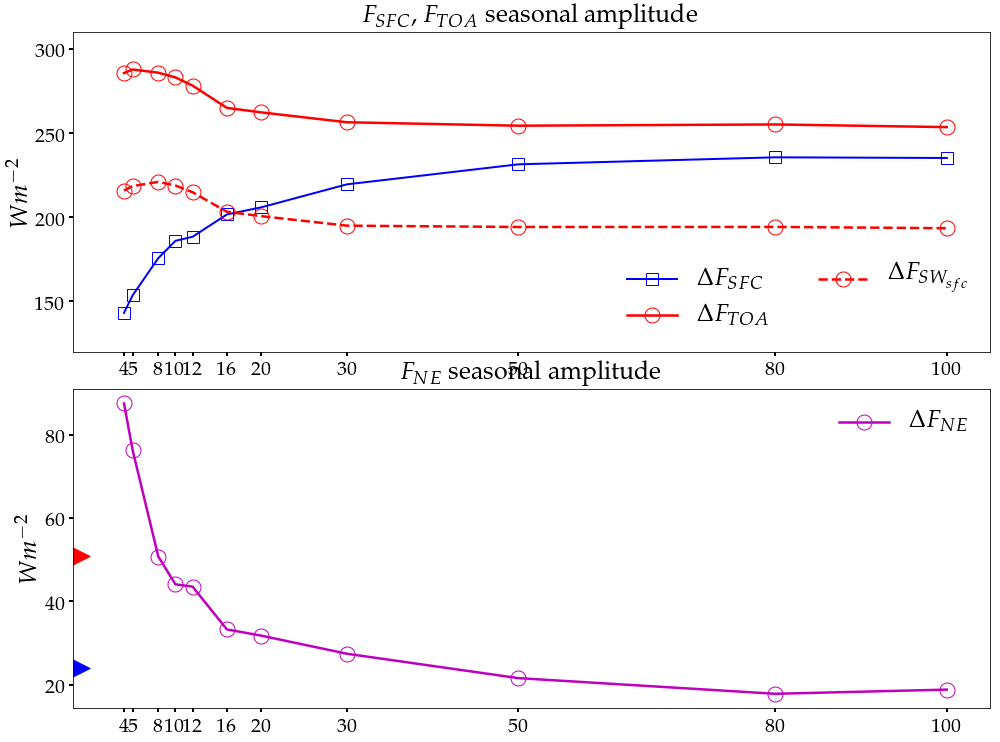

In [116]:
amp_PNE_NH_SH = np.array([ 50.85997198,  24.14184012])

def amp(X):
    A=np.zeros(len(DEPTHS))
    for d in range(len(DEPTHS)):
       A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
    return A


py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

py.figure(figsize=(14,15))


py.subplot(3,1,1) 
color = 'r'
py.ylabel(r"$Wm^{-2}$", fontsize=25, color='k', x=2.0)  # we already handled the x-label with ax1
py.plot(depth_values[:-1],amp(P_sfc)[:-1],'s-',color='b', lw=2.0,mfc='none',markersize=12,label=r'$\Delta F_{SFC}$'); 
py.plot(depth_values[:-1],amp(P_toa)[:-1],'o-',color='r', lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{TOA}$'); 
py.plot(depth_values[:-1],amp(P_SWsfc)[:-1],'o--',color='r', lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{SW_{sfc}}$'); 

py.tick_params(axis='y', labelcolor='k', labelsize=20, size=4, width=2 )
py.tick_params(axis='x', labelsize=20,size=4,width=2)
py.xlim(-2,105)
py.legend(loc='best',ncol= 2,fontsize=25,frameon=False )
py.ylim(120,310)
py.title(r'$ F_{SFC}$,  '+ r'$ F_{TOA}$'  +' seasonal amplitude', fontsize=25)
py.xticks(depth_values[:-1])
py.tight_layout()  # otherwise the right y-label is slightly clipped


py.subplot(3,1,2) 
color = 'm'
# ax1.set_xlabel('Mixed layer depth')
py.ylabel(r"$Wm^{-2}$", fontsize=25, color='k')
py.plot(depth_values[:-1],amp(P_NE)[:-1],'o-',color=color, lw=2.5,mfc='none',markersize=15,label=r'$\Delta F_{NE}$'); 
py.scatter(-1, amp_PNE_NH_SH[0], marker=">", s=300, c='r')
py.scatter(-1, amp_PNE_NH_SH[1], marker=">", s=300, c='b')
py.tick_params(axis='y', labelcolor='k', labelsize=20, size=4, width=2)
py.xticks(depth_values[:-1])
py.tick_params(axis='x', labelsize=20,size=4,width=2)
py.xlim(-2,105)
py.legend(loc='upper right',fontsize=25,frameon=False)
py.title(r'$F_{NE}$ '+ 'seasonal amplitude', fontsize=25)


# P_SWAB_all  =all_at_max(swabs_all_a,smalat_a)
# P_SHF_all   =all_at_max(shf_all_a,smalat_a)
# P_OLR_all   =all_at_max(olr_all_a,smalat_a)
# P_SWtoa_all =all_at_max(SWu_all_a,smalat_a)
# P_SWsfc_all =all_at_max(SWd_all_a,smalat_a) 


phase_swtoa_swsfc=PHASE(P_SWsfc_all,P_SWtoa_all)
# lag_sw_sfc   = phase_swabs_shf[0]
# phase = phase_swabs_shf[1]

phase_shf_swab=PHASE(P_SWAB_all,P_SHF_all)

py.subplot(3,1,3)
py.plot(depth_values[:-1],np.abs(phase_shf_swab[0])[:-1],'ko-',lw=2.5,mfc='none',markersize=15, label=r'$\Delta F_{SHF}$ and $\Delta F_{SWABS}$');
py.plot(depth_values[:-1],np.abs(phase_swtoa_swsfc[0])[:-1],'ro--',lw=2.5,mfc='none',markersize=15, label=r'$\Delta F_{SW_{sfc}}$ and $\Delta F_{SW_{TOA}}$');
py.scatter(-1, 0, marker=">", s=300, c='r')
py.scatter(-1, 6, marker=">", s=300, c='b')
py.xlim(-2,105)
# py.ylim(-1,7)
py.xticks(depth_values[:-1])
py.tick_params(labelsize=20,size=4,width=2)
py.ylabel('months', fontsize=25)
py.xlabel("Mixed layer depth", fontsize=25)
py.title('Seasonal phase lag', fontsize=25)
py.legend(loc='center right',fontsize=25,frameon=False)

py.tight_layout()

# py.savefig('Sep18/critical_depth.pdf')
py.show()

In [ ]:
I

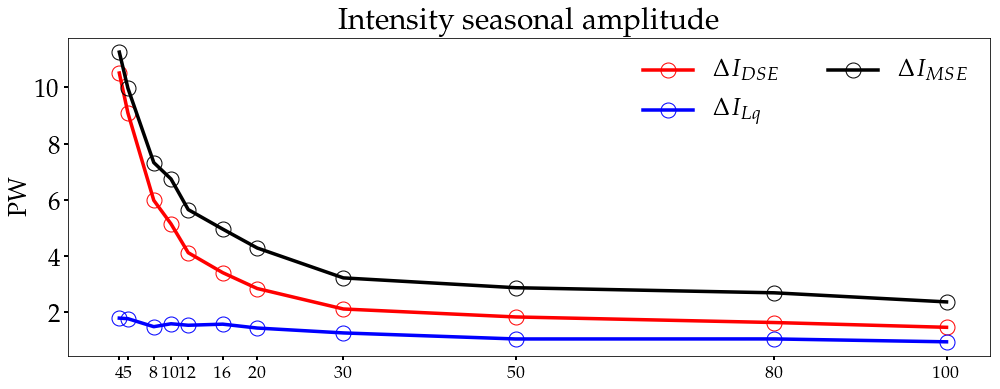

In [124]:
amp_PNE_NH_SH = np.array([ 50.85997198,  24.14184012])
Mp=6; Mm=Mp+6
def amp(X):
    A=np.zeros(len(DEPTHS))
    for d in range(len(DEPTHS)):
       A[d]=np.nanmax(X[d,:])-np.nanmin(X[d,:]) 
       #A[d]=(X[d,Mp])-np.nanmin(X[d,Mm]) 
    return A


py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

py.figure(figsize=(14,15))


py.subplot(3,1,1) 
color = 'r'
py.ylabel(r"PW", fontsize=25, color='k', x=2.0)  # we already handled the x-label with ax1
# py.plot(depth_values[:-1],amp(I_SFC-I_dhdt)[:-1],'o-',color='k', lw=3.5,mfc='none',markersize=15,label=r'$\Delta I$'); 
# py.plot(depth_values[:-1],amp(I_TOA)[:-1],'o-',color='r', lw=3.5,mfc='none',markersize=15,label=r'$\Delta I$'); 
py.plot(depth_values[:-1],amp(Intensity_te_sens+Intensity_te_pot)[:-1],'o-',color='r', lw=3.5,mfc='none',markersize=15,label=r'$\Delta I_{DSE}$'); 
py.plot(depth_values[:-1],amp(Intensity_te_moist)[:-1],'o-',color='b', lw=3.5,mfc='none',markersize=15,label=r'$\Delta I_{Lq}$'); 
py.plot(depth_values[:-1],amp(Intensity_te)[:-1],'o-',color='k', lw=3.5,mfc='none',markersize=15,label=r'$\Delta I_{MSE}$'); 

py.tick_params(axis='y', labelcolor='k', labelsize=25, size=4, width=2 )
py.tick_params(axis='x', labelsize=18,size=4,width=2)
py.xlim(-2,105)
py.legend(loc='best',ncol= 2,fontsize=25,frameon=False)
# py.ylim(120,310)
py.title(r' Intensity'  +' seasonal amplitude', fontsize=30, y=1.01)
py.xticks(depth_values[:-1])
# py.axvline(e_I, color='k')

py.tight_layout()

#py.savefig('May8/Intensity_seasonal_amplitude.pdf', bbox_inches='tight')
py.show()

# Second figure

In [258]:
def compare_sfc_toa_dhdt(de,X,c,T,month_to_month=1,l=3, ylab=r'$Wm^{-2}$', ls='-', LW=3.5):
    
    de_values=np.array(depth_values)
    d=np.squeeze(np.where((de_values)==de))
    depth=de_values[d]
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']            
    py.plot(range(13),D(X[d,:]),'o'+ls ,color=c,label=T,lw=LW)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
    if depth==5 :
        py.legend(loc="best",fontsize=25,ncol=2,frameon=False)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(str(depth)+'m',fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)

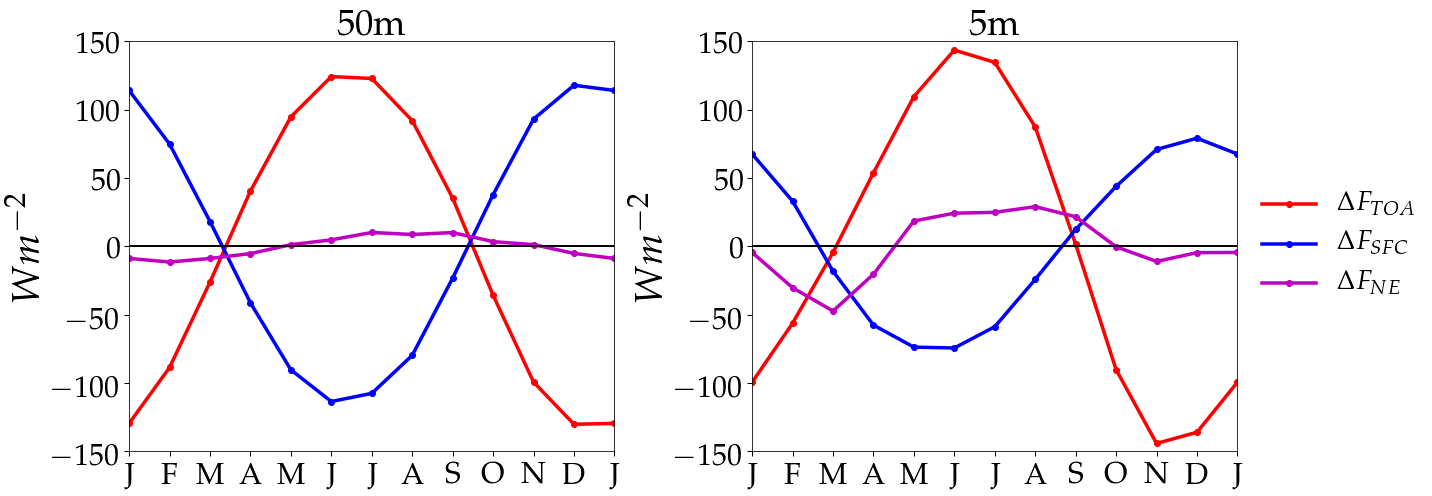

In [223]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_sfc_toa_dhdt(d,P_toa,'r',r'$\Delta F_{TOA}$',month_to_month=0,l=150)
    compare_sfc_toa_dhdt(d,P_sfc,'b',r'$\Delta F_{SFC}$',month_to_month=0,l=150)
    compare_sfc_toa_dhdt(d,P_NE,'m', r'$\Delta F_{NE}$' ,month_to_month=0,l=150)
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
py.tight_layout()
# py.savefig('Jan25/TOA_SFC_NE.pdf',bbox_inches='tight')

# Third figure

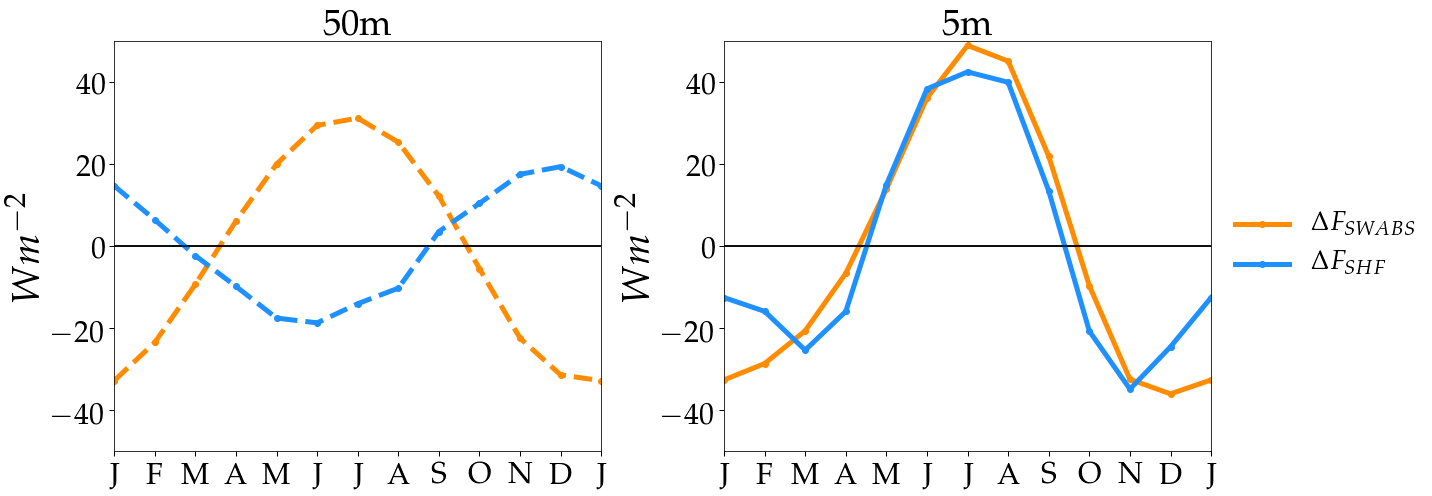

In [263]:
py.figure(figsize=(20,7))
i=0; l=6
lss = ['--','-']
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_sfc_toa_dhdt(d,P_SWAB,'darkorange',r'$\Delta F_{SWABS}$',month_to_month=0,l=50, ls=lss[i-1], LW=5)
    compare_sfc_toa_dhdt(d,P_SHF,'dodgerblue',r'$\Delta F_{SHF}$',month_to_month=0, ls=lss[i-1],l=50, LW=5)
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
py.tight_layout()
# py.savefig('Jan25/swabs_shf.pdf',bbox_inches='tight')

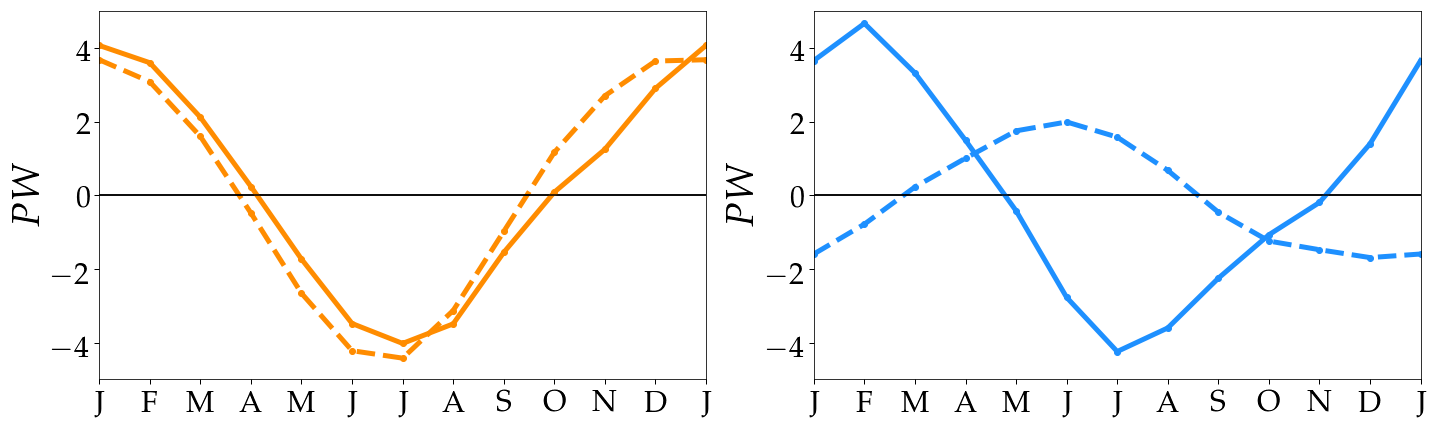

In [267]:
py.figure(figsize=(20,6))
i=0; l=6
# for d in [50,5]:


# def compare_sfc_toa_dhdt(de,X,c,T,month_to_month=1,l=3, ylab=r'$Wm^{-2}$', ls='-')
py.subplot(1,2,1)
compare_swabs_shf_olr(50,I_SWAB,'darkorange','50 m',month_to_month=0, l=5, ylab=r'$PW$', ls='--', LW=5 )
compare_swabs_shf_olr(5,I_SWAB, 'darkorange','5 m', month_to_month=0, l=5, ylab=r'$PW$', ls='-', LW=5)


py.subplot(1,2,2)
compare_swabs_shf_olr(50,I_SHF,'dodgerblue','50 m',month_to_month=0, l=5, ylab=r'$PW$', ls='--', LW=5 )
compare_swabs_shf_olr(5,I_SHF, 'dodgerblue','5 m', month_to_month=0, l=5, ylab=r'$PW$', ls='-', LW=5)


py.tight_layout()
py.savefig('March4_20/Iswabs_shf_together.png',bbox_inches='tight')

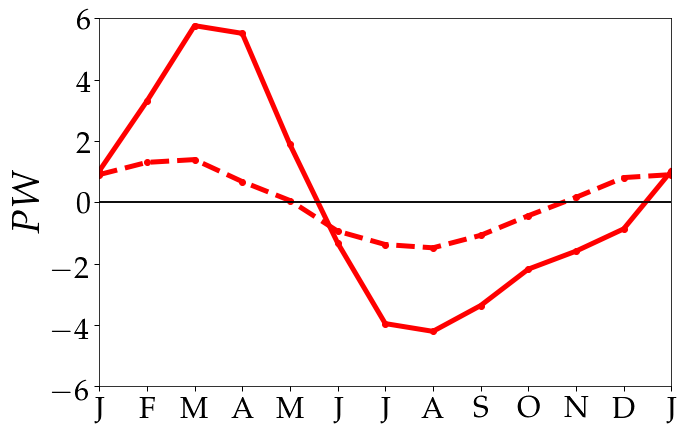

In [272]:
py.figure(figsize=(18,6))
i=0; l=6
# for d in [50,5]:

# def compare_sfc_toa_dhdt(de,X,c,T,month_to_month=1,l=3, ylab=r'$Wm^{-2}$', ls='-')
py.subplot(1,2,1)
compare_swabs_shf_olr(50,Intensity_te,'r','50 m',month_to_month=0, l=6, ylab=r'$PW$', ls='--', LW=5 )
compare_swabs_shf_olr(5,Intensity_te, 'r','5 m', month_to_month=0, l=6, ylab=r'$PW$', ls='-', LW=5)
py.tight_layout()
py.savefig('March4_20/Ite.png',bbox_inches='tight')

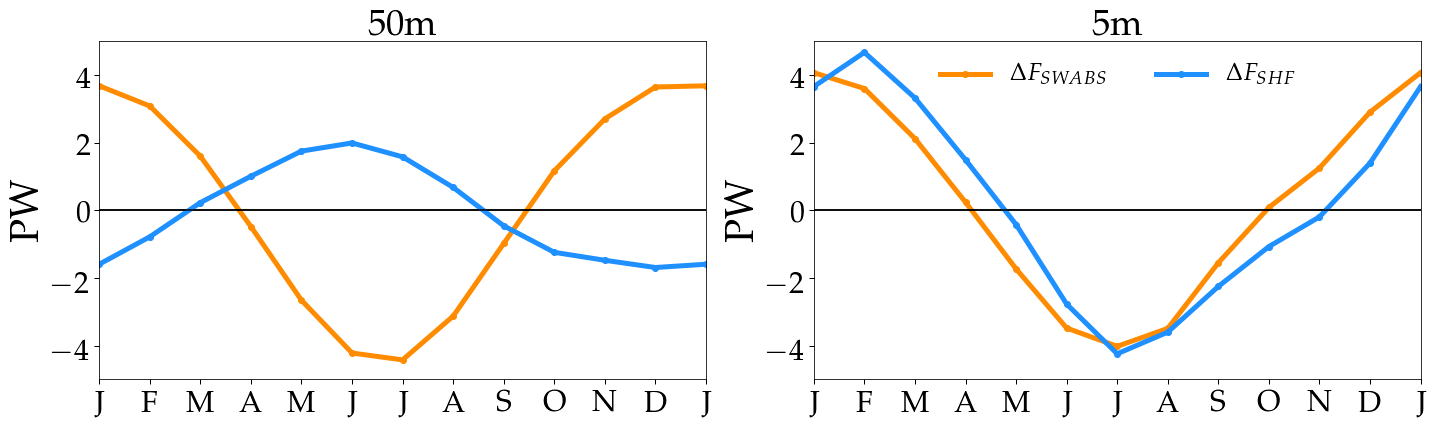

In [265]:
py.figure(figsize=(20,6))
i=0; l=6
lss = ['-','-']
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_sfc_toa_dhdt(d,I_SWAB,'darkorange',r'$\Delta F_{SWABS}$',month_to_month=0,l=5,ls=lss[i-1], LW=5)
    compare_sfc_toa_dhdt(d,I_SHF,'dodgerblue',r'$\Delta F_{SHF}$',month_to_month=0,   l=5,ls=lss[i-1], LW=5)
    py.ylabel('PW')
#     if d==5:
#         py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
py.tight_layout()
py.savefig('March4_20/Iswabs_Ishf_solid.pdf',bbox_inches='tight')
py.savefig('March4_20/Iswabs_Ishf_solid.png',bbox_inches='tight')

# Fourth figure

In [159]:
### radiation

def plot_intensity(de,l,month_to_month=1):
    
    d=np.squeeze(np.where(np.array(depth_values)==de))
    depth=depth_values[d]
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
                  
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=3.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=3.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=3.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=3.5)
    
#     if de==50:
#         py.legend(loc="best",fontsize=29,ncol=2,frameon=False)
                                                     
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=37)
    title=""+" "+" "+str(depth_values[d])+"m"+ "  Intensity"
    title1="Intensity_decomposition_"+"_"+str(depth_values[d])+"m"
    py.title(title,fontsize=37,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)    
    py.tight_layout()

In [248]:
def compare_swabs_shf_olr(de,X,c,T,month_to_month=1,l=3, ylab=r'$PW$', ls='-', LW=3.5):
    
    d=np.squeeze(np.where(np.array(depth_values)==de))
    depth=depth_values[d]
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']            
    py.plot(range(13),D(X[d,:]),'o'+ls ,color=c,label=T,lw=LW)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
#     if depth==50 :
#         py.legend(loc="best",fontsize=29,ncol=2,frameon=False)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
#     py.title(str(depth)+'m'+' Net energy',fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)

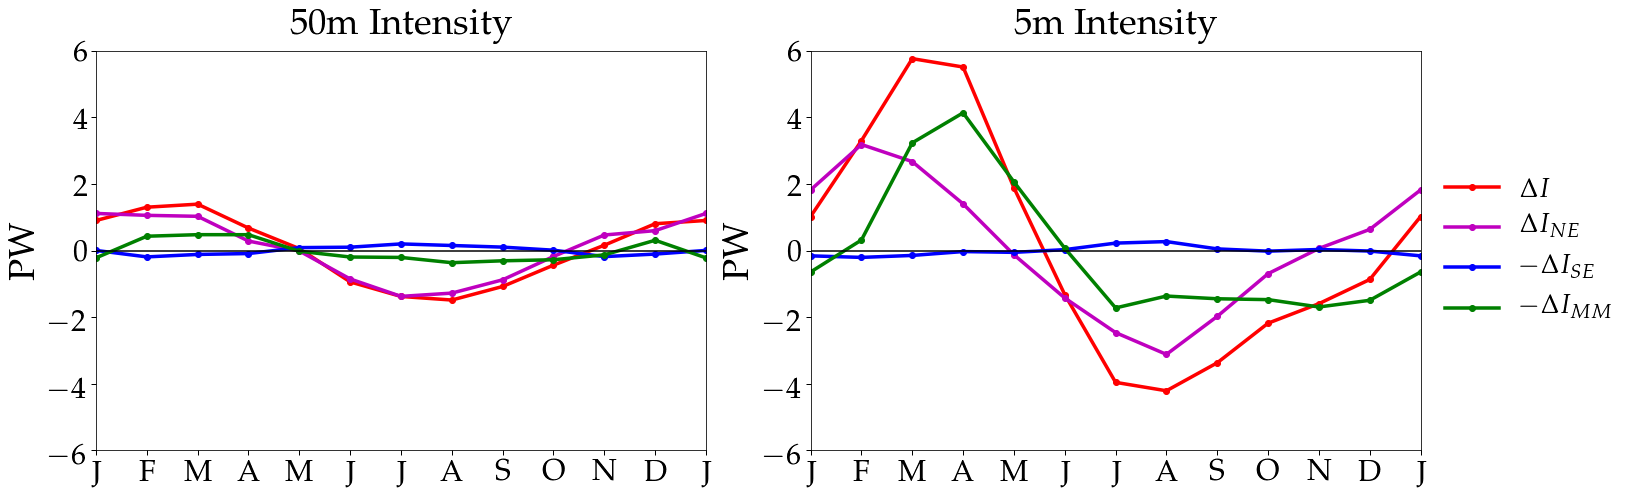

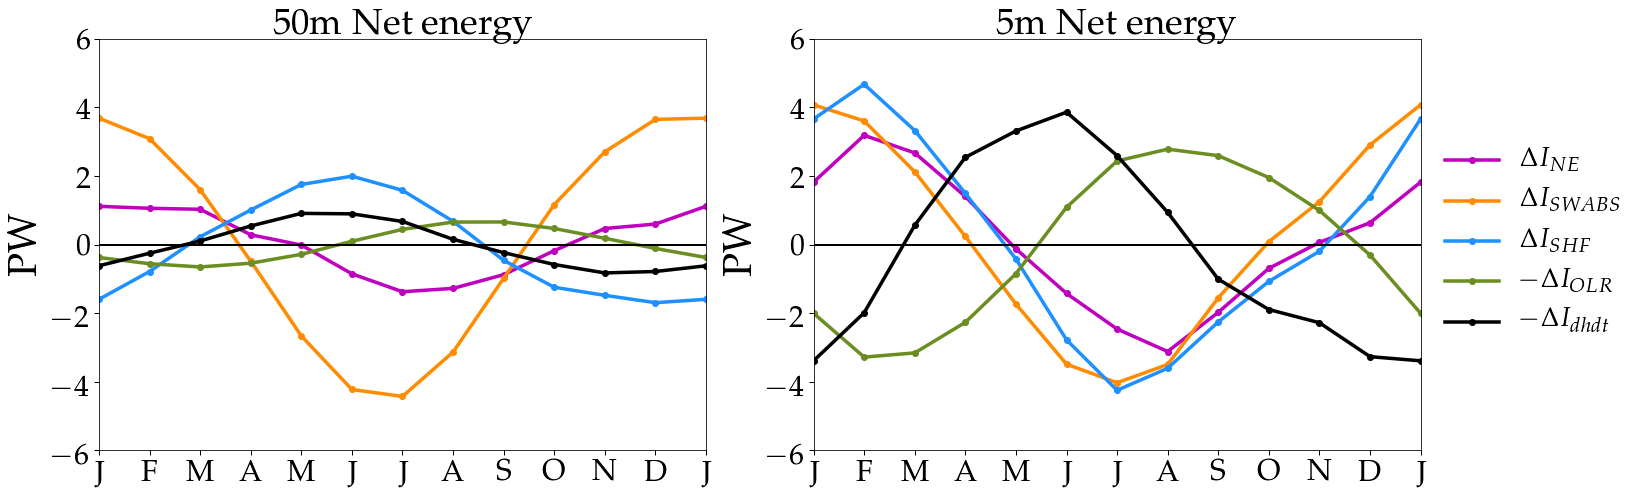

In [161]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    plot_intensity(d,6,0)
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)

py.tight_layout()
# py.savefig('Jan25/Intensity_decomp.pdf',bbox_inches='tight')


py.figure(figsize=(20,7))
i=0; l=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,Intensity_ne,  'm',r'$\Delta I_{NE}$'      ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SWAB,'darkorange',r'$\Delta I_{SWABS}$'  ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SHF, 'dodgerblue',r'$\Delta I_{SHF}$'    ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,-I_OLR,'olivedrab',r'$-\Delta I_{OLR}$'     ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,-I_dhdt,'k',r'$-\Delta I_{dhdt}$'           ,month_to_month=0,l=6,ylab='PW')
#     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
py.tight_layout() 
# py.savefig('Jan25/net_energy_decomp.pdf',bbox_inches='tight')


# py.figure(figsize=(20,7))
# i=0; l=6
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     compare_swabs_shf_olr(d,I_SFC,'b',       r'$\Delta I_{SFC}$'      ,month_to_month=0,l=18,ylab='PW')
#     compare_swabs_shf_olr(d,I_TOA,'r',       r'$\Delta I_{TOA}$'        ,month_to_month=0,l=18,ylab='PW')
#     compare_swabs_shf_olr(d,Intensity_ne,'m',r'$\Delta I_{NE}$'  ,month_to_month=0,l=18,ylab='PW')
#     py.legend().set_visible(False)
#     if d==5:
#         py.legend(loc="best",fontsize=28,ncol=3,frameon=False)  
#     py.title(str(d)+'m'+' SFC and TOA',fontsize=37)
# py.tight_layout() 
# py.savefig('Jan9/Itoa_&_Isfc.pdf')

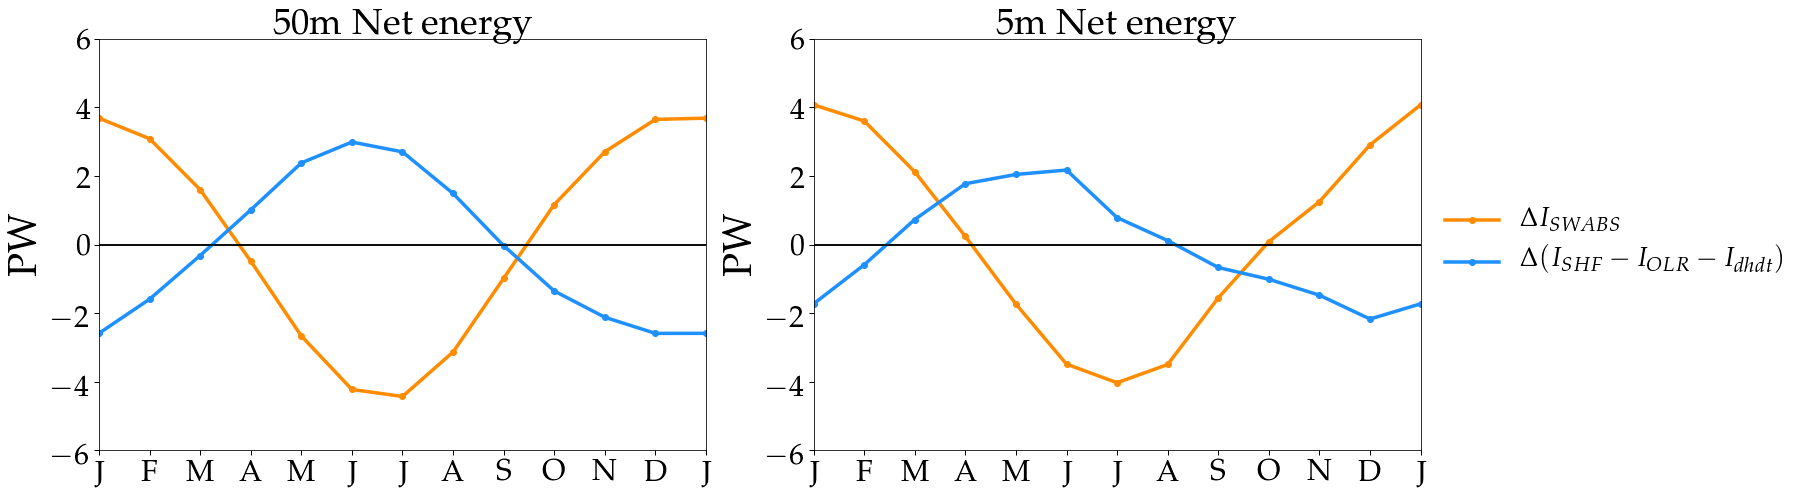

In [162]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
#    compare_swabs_shf_olr(d,Intensity_ne,  'm',r'$\Delta I_{NE}$'      ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SWAB,'darkorange',r'$\Delta I_{SWABS}$'  ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SHF-I_OLR-I_dhdt, 'dodgerblue',r'$\Delta (I_{SHF}-I_{OLR}-I_{dhdt})$'    ,month_to_month=0,l=6,ylab='PW')
#     compare_swabs_shf_olr(d,-I_OLR,'olivedrab',r'$-\Delta I_{OLR}$'     ,month_to_month=0,l=6,ylab='PW')
#     compare_swabs_shf_olr(d,-I_dhdt,'k',r'$-\Delta I_{dhdt}$'           ,month_to_month=0,l=6,ylab='PW')
# #     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
py.tight_layout() 
#

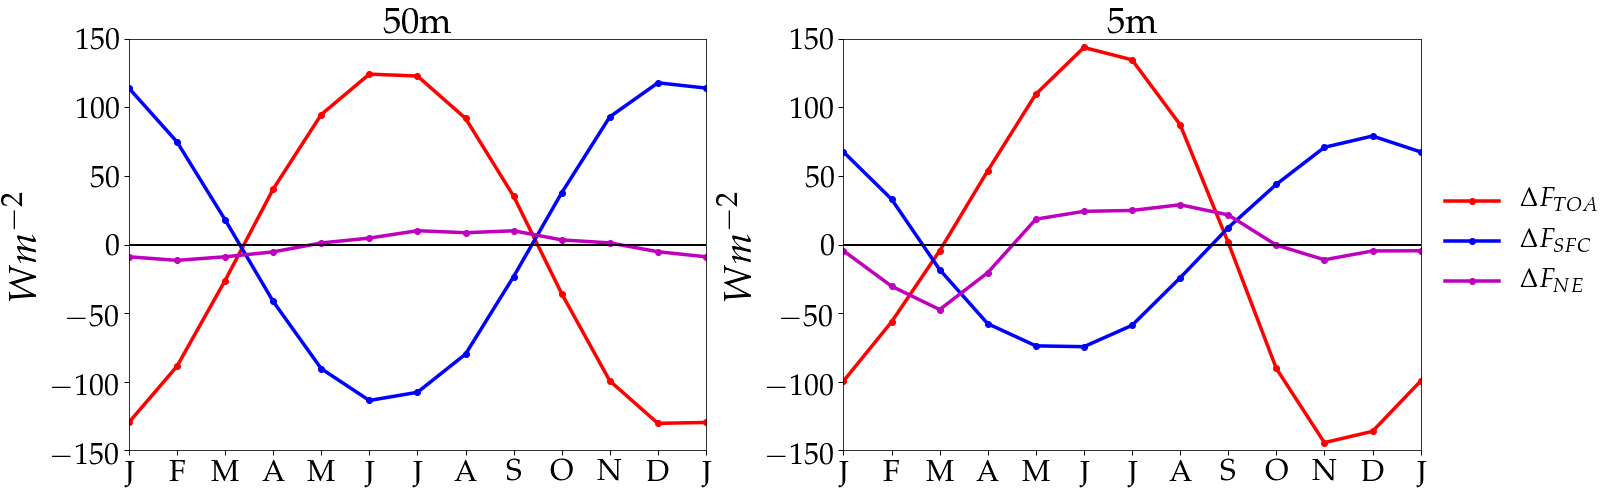

In [163]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_sfc_toa_dhdt(d,P_toa,'r',r'$\Delta F_{TOA}$',month_to_month=0,l=150)
    compare_sfc_toa_dhdt(d,P_sfc,'b',r'$\Delta F_{SFC}$',month_to_month=0,l=150)
    compare_sfc_toa_dhdt(d,P_NE,'m', r'$\Delta F_{NE}$' ,month_to_month=0,l=150)
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
py.tight_layout()
# py.savefig('Jan25/TOA_SFC_NE.pdf',bbox_inches='tight')

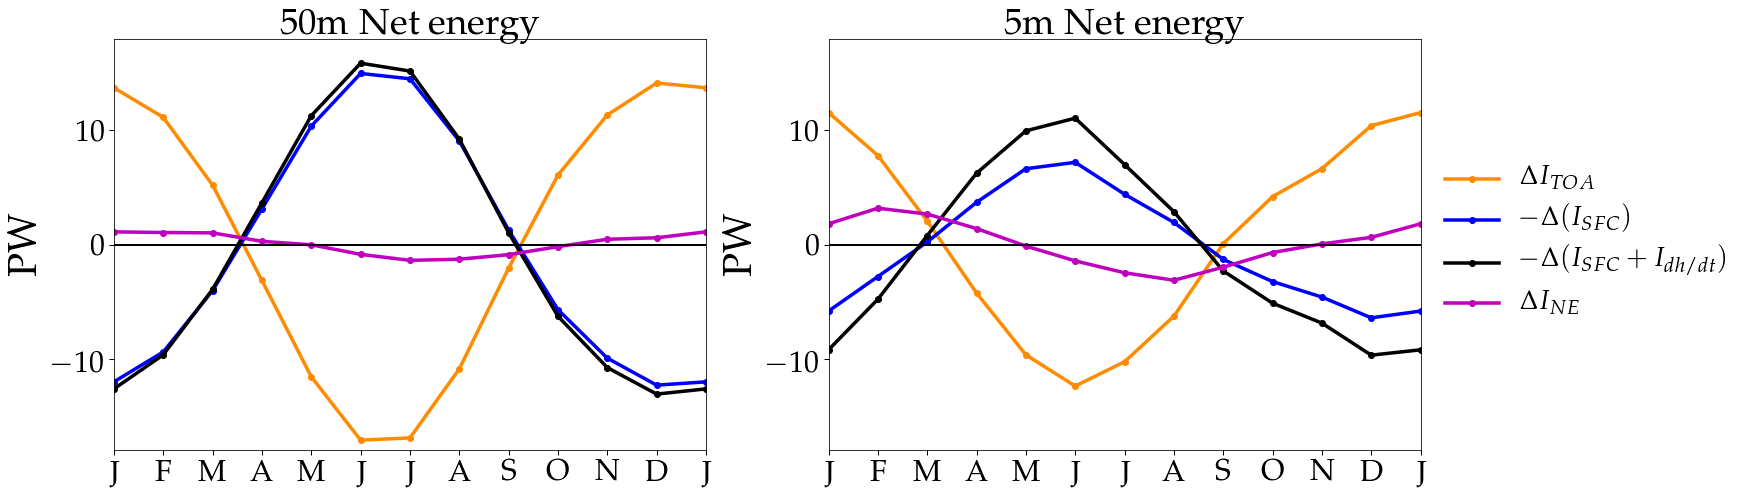

In [165]:
py.figure(figsize=(20,7))
i=0; L=18
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,I_TOA,          'darkorange',r'$\Delta I_{TOA}$'      ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_SFC,          'b',r'$-\Delta (I_{SFC})$'     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_SFC-I_dhdt,   'k',r'$-\Delta (I_{SFC}+I_{dh/dt})$'     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,Intensity_ne,   'm',r'$\Delta I_{NE}$'      ,month_to_month=0,l=L,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
    py.ylim(-L,L) 
py.tight_layout()
#py.savefig('Sep18/Isca_NE_decomp_ebm.pdf',bbox_inches='tight')

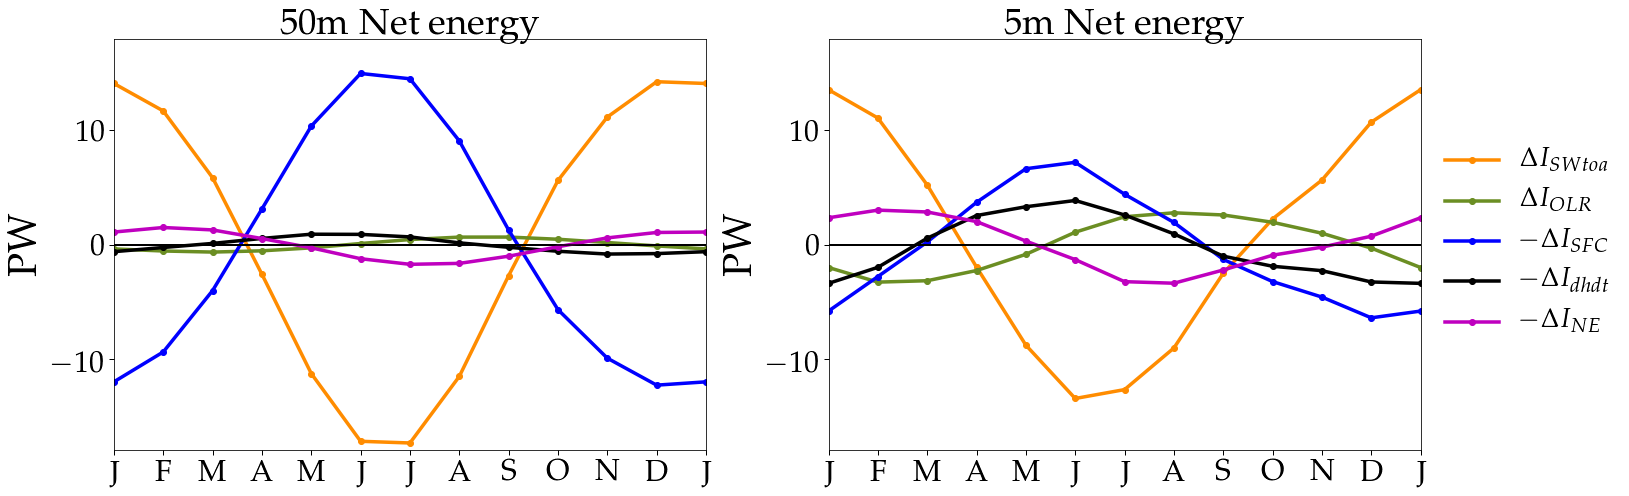

In [167]:
py.figure(figsize=(20,7))
i=0; L=18
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,I_SWtoa,  'darkorange',r'$\Delta I_{SWtoa}$'   ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,-I_OLR,   'olivedrab',r'$\Delta I_{OLR}$'      ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_SFC,    'b',r'$-\Delta I_{SFC}$'             ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,-I_dhdt,  'k',r'$-\Delta I_{dhdt}$'            ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_NE,     'm',r'$-\Delta I_{NE}$'              ,month_to_month=0,l=L,ylab='PW')    
#     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
    py.ylim(-L,L)
py.tight_layout() 
#py.savefig('Sep8/NE_decomp_Isca_ebm1.pdf',bbox_inches='tight')

In [ ]:
c

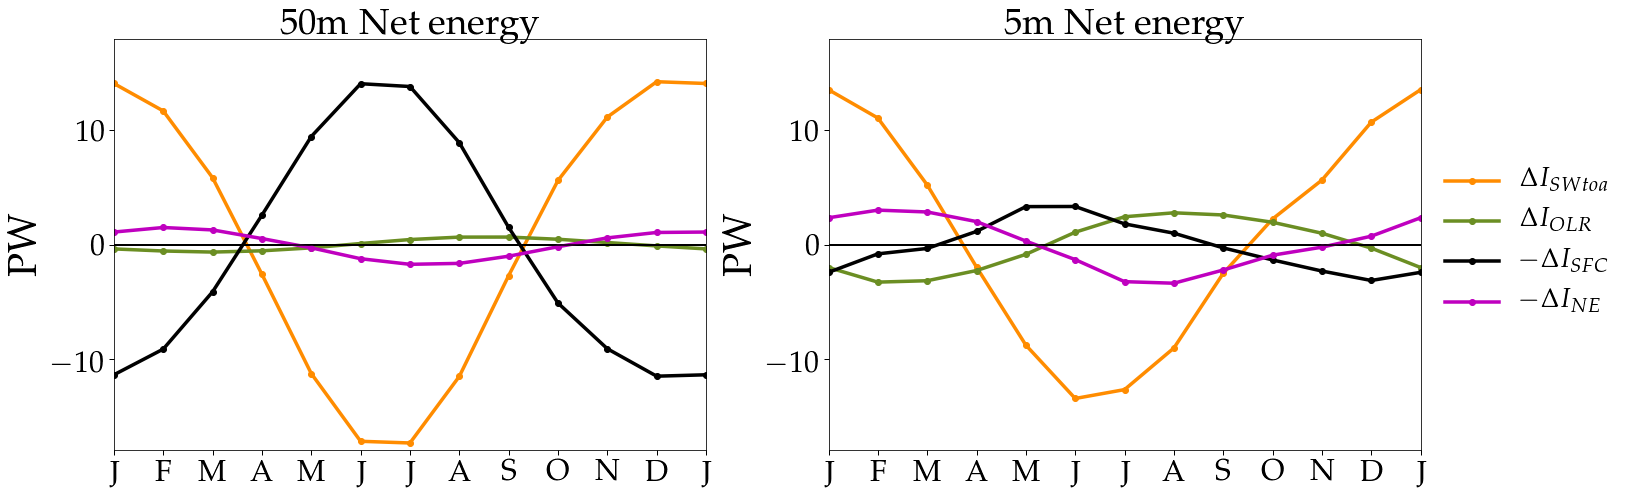

In [168]:
py.figure(figsize=(20,7))
i=0; L=18
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,I_SWtoa,        'darkorange',r'$\Delta I_{SWtoa}$'      ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,-I_OLR,         'olivedrab',r'$\Delta I_{OLR}$'      ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_SFC+I_dhdt,   'k',r'$-\Delta I_{SFC}$'     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_NE,           'm',r'$-\Delta I_{NE}$'      ,month_to_month=0,l=L,ylab='PW')    
#     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
    py.ylim(-L,L)
py.tight_layout() 
# py.savefig('May8/shf_olr_50m.pdf',bbox_inches='tight')

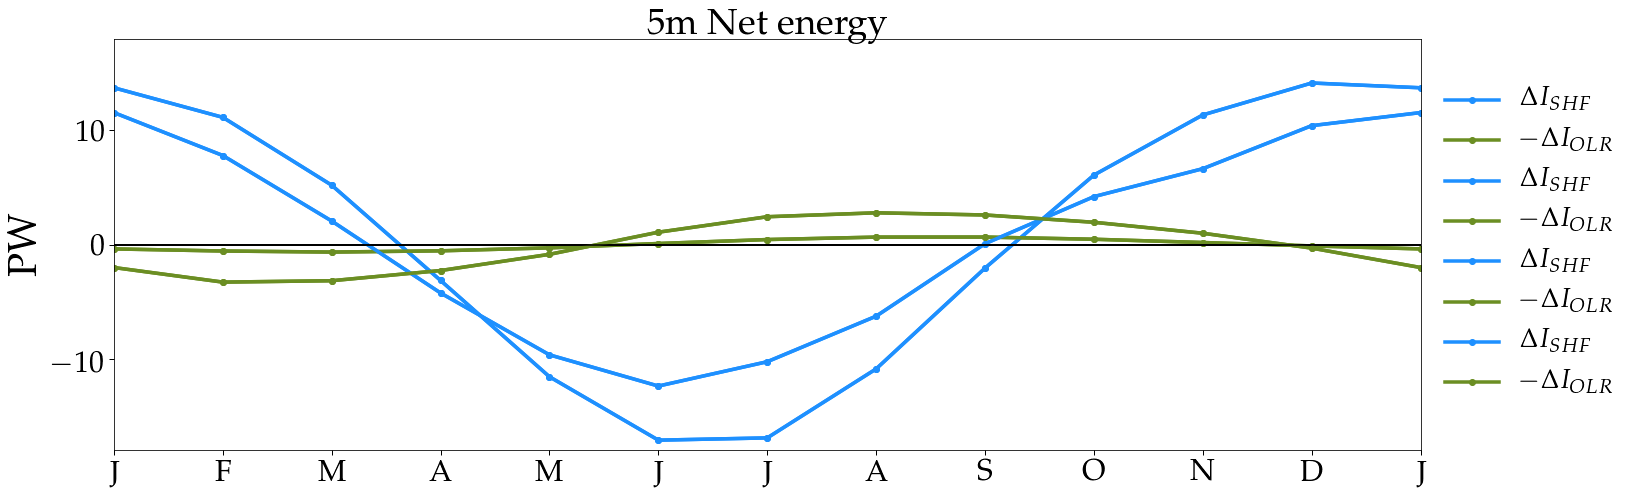

In [169]:
import pylab as py
py.figure(figsize=(20,7))
i=0; l=15
for d in [50,5]:
    i=i+1
    for d in [50,5]:
        compare_swabs_shf_olr(d,I_TOA, 'dodgerblue',r'$\Delta I_{SHF}$' ,month_to_month=0,l=L,ylab='PW')
        compare_swabs_shf_olr(d,-I_OLR,'olivedrab',r'$-\Delta I_{OLR}$' ,month_to_month=0,l=L,ylab='PW')
#     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
    py.ylim(-L,L)
py.tight_layout() 
# py.savefig('TOA OLR /shf_olr_50m.pdf',bbox_inches='tight')


# Fifth figure 
## Sea ice NE decomposition

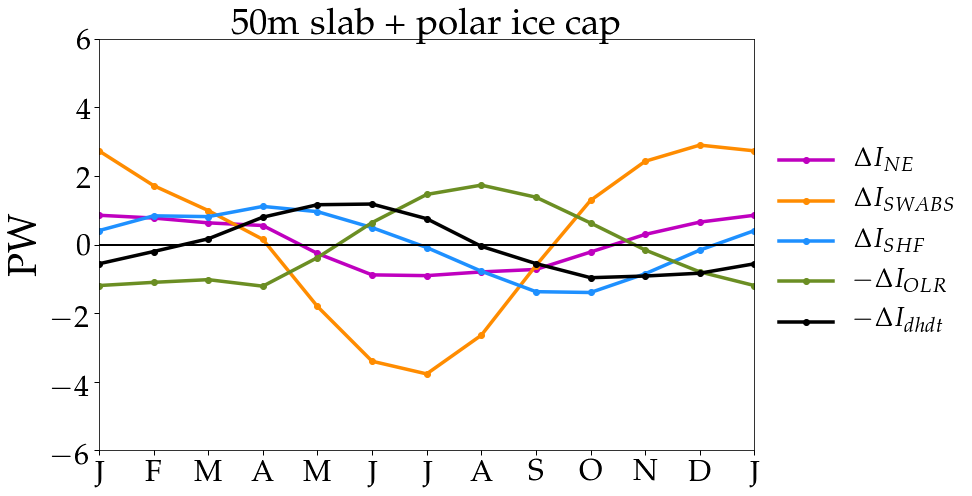

In [170]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [999]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,Intensity_ne,  'm',r'$\Delta I_{NE}$'    ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SWAB,        'darkorange',r'$\Delta I_{SWABS}$',month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SHF,         'dodgerblue',r'$\Delta I_{SHF}$'   ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,-I_OLR,        'olivedrab',r'$-\Delta I_{OLR}$'   ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,-I_dhdt,       'k',r'$-\Delta I_{dhdt}$'     ,month_to_month=0,l=6,ylab='PW')
    py.legend(loc="best",fontsize=29,ncol=2,frameon=False)
    if d==50:
        py.title('50m slab',fontsize=37)        
    if d==999:
        py.title('50m slab +'+' polar ice cap ',fontsize=37)
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)

py.tight_layout()
# py.savefig('Jan25/net_energy_with_polar_ice.pdf',bbox_inches='tight')

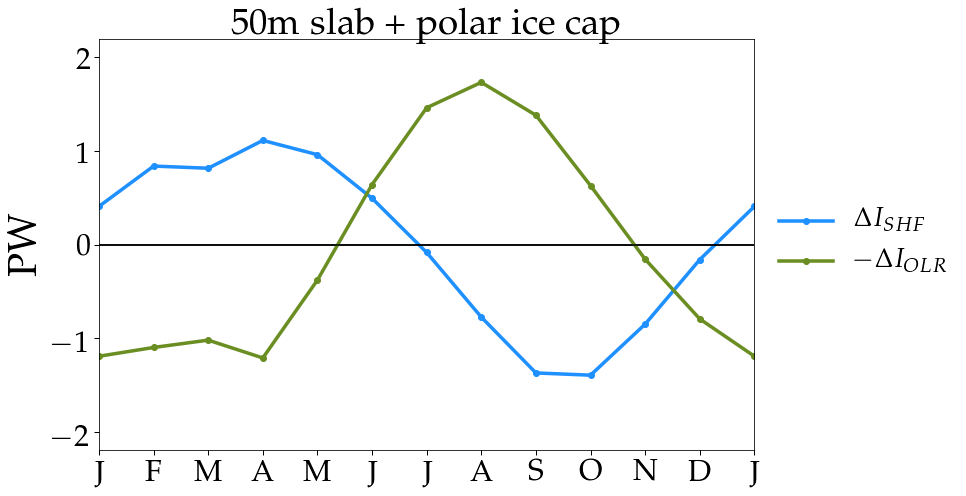

In [172]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [999]:
    i=i+1
    py.subplot(1,2,i)
#     compare_swabs_shf_olr(d,Intensity_ne,  'm',r'$\Delta I_{NE}$'    ,month_to_month=0,l=6,ylab='PW')
#     compare_swabs_shf_olr(d,I_SWAB,        'darkorange',r'$\Delta I_{SWABS}$',month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,I_SHF,         'dodgerblue',r'$\Delta I_{SHF}$'   ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr(d,-I_OLR,        'olivedrab',r'$-\Delta I_{OLR}$'   ,month_to_month=0,l=6,ylab='PW')
#     compare_swabs_shf_olr(d,-I_dhdt,       'k',r'$-\Delta I_{dhdt}$'     ,month_to_month=0,l=6,ylab='PW')
    py.legend(loc="best",fontsize=29,ncol=2,frameon=False)
    if d==50:
        py.title('50m slab',fontsize=37)        
    if d==999:
        py.title('50m slab +'+' polar ice cap ',fontsize=37)
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
        py.ylim(-2.2,2.2)
py.tight_layout()
#py.savefig('May8/net_energy_with_polar_ice.pdf',bbox_inches='tight')



# Sixth figure

In [173]:
def plot_at_storm_position(de,l,month_to_month=1):
    
    d=np.squeeze(np.where(np.array(depth_values)==de))
    depth=depth_values[d]
    
    I1   =r'$ ({\Delta D \Delta I_{m}})_{o}$'
    I2   =r'$-(\Delta D) (\Delta I_{m})$'
    I3   =r'$-(\Delta D) {I_{m_{o}}}$'
    I4   =r'$-{D_{o}} (\Delta I_{m})$'
    ISUM =r'$\Delta I =$ '+I1 +I2 +I3 +I4
    Iorig=r'$\Delta I =$' + r'$\Delta\langle[\overline{v^{\prime}m^{\prime}}]\rangle$'
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
#     def D(y,d):
#         return y[d,...]
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']

    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=3.5) 
    py.plot(D(i3_a,d),'ko-',label=I3,lw=3.5)
    py.plot(D(i4_a,d),'bo-',label=I4,lw=3.5)
        
#     py.plot(D(i1_a,d),'co-',label=r'$+$'+I1,lw=3.5)
#     py.plot(D(i2_a,d),'yo-',label=I2,lw=3.5)   
    
#     py.plot(D(i_a,d),'ro-',label=r'$\Delta I_{calc}$',lw=3.5) 
    #py.plot(D(teprime_a,d),'ro-',label=r'$\Delta I$',lw=3.5) 

                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title=""+" "+" "+str(depth)+"m"
    py.title(title,fontsize=35,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
#     if de==50:        
#         py.legend(loc='best',fontsize=29,ncol=2,frameon=False)
    py.tight_layout()

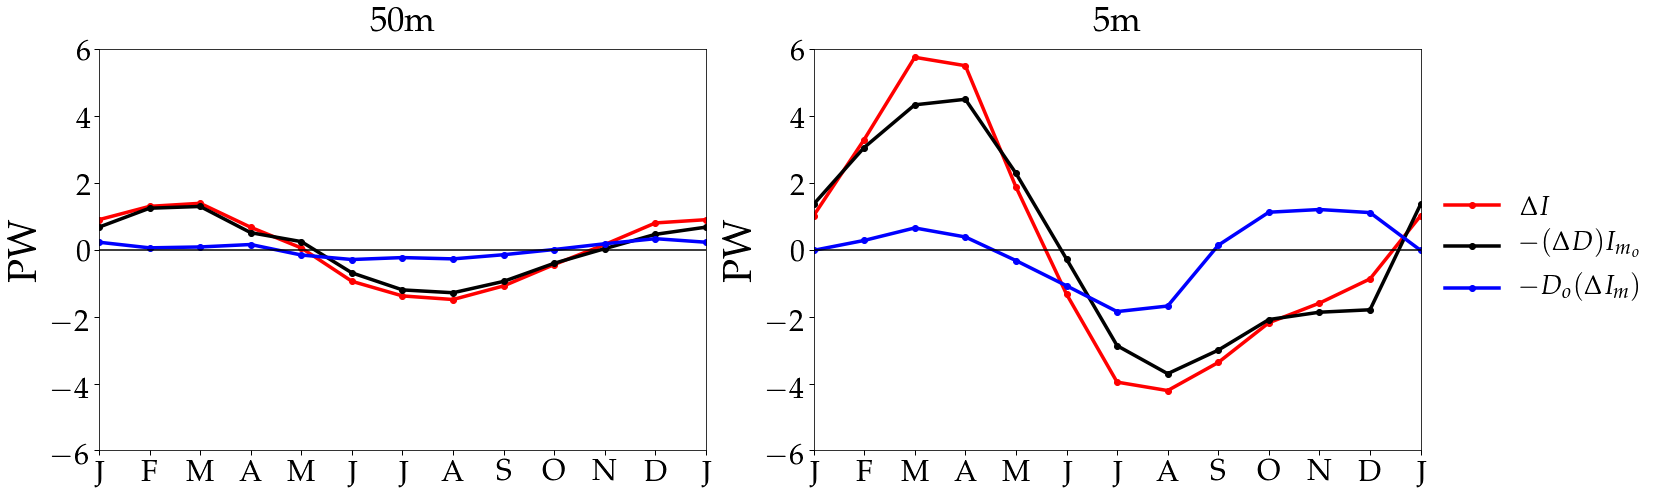

In [174]:
l=6.0; i=0;
py.figure(figsize=(20,7))
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    plot_at_storm_position(d,l,0)
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
py.tight_layout()
# py.savefig('Jan25/diffusive_decomp.pdf',bbox_inches='tight')

# Seventh figure

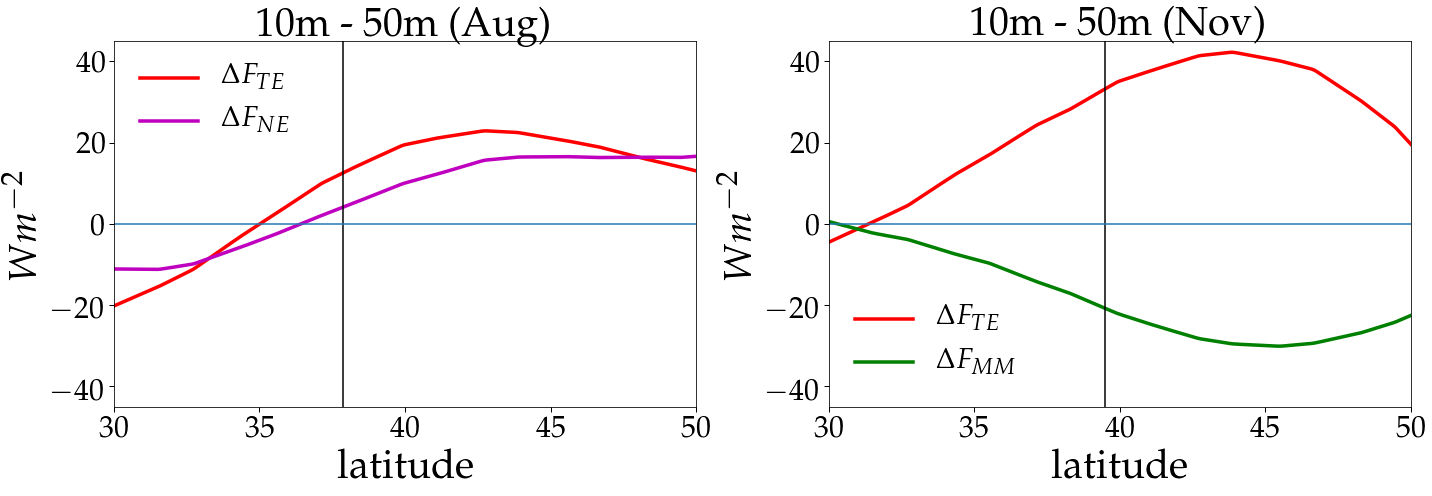

In [175]:
py.figure(figsize=(20,7))

py.subplot(1,2,2)
m=10
py.plot(lat_a,div_TE_a[3,:,m]-div_TE_a[-4,:,m],'r-',lw=3.5,label=r'$\Delta F_{TE}$')
py.plot(lat_a,div_MM_a[3,:,m]-div_MM_a[-4,:,m],'g-',lw=3.5,label=r'$\Delta F_{MM}$')
py.axvline(storm_pos[-4,m],color='k')
py.axhline(0)
py.xlim(30,50)
py.ylim(-45,45)
py.xticks([30,35,40,45,50])
py.xticks([30,35,40,45,50],size=37)
py.tick_params(labelsize=30,size=5,width=1)
py.xlabel('latitude',fontsize=40)
py.ylabel(r'$Wm^{-2}$',fontsize=40)
py.title('10m - 50m (Nov)',fontsize=40)
py.legend(loc='best',fontsize=29,frameon=False)


py.subplot(1,2,1)
m=7
py.plot(lat_a,div_TE_a[3,:,m]-div_TE_a[-4,:,m],'r-',lw=3.5,  label=r'$\Delta F_{TE}$')
py.plot(lat_a,div_NE_a[3,:,m]-div_NE_a[-4,:,m],'m-',lw=3.5, label=r'$\Delta F_{NE}$')
# py.plot(lat_a,div_MM_a[3,:,m]-div_MM_a[-4,:,m],'g-')
py.axvline(storm_pos[-4,m],color='k')
py.axhline(0)
py.xlim(30,50)
py.ylim(-45,45)
py.xticks([30,35,40,45,50],size=37)
py.tick_params(labelsize=30,size=5,width=1)
py.xlabel('latitude',fontsize=40)
py.ylabel(r'$Wm^{-2}$',fontsize=40)
py.title('10m - 50m (Aug)',fontsize=40)
py.legend(loc='best',fontsize=29,frameon=False)

py.tight_layout()
# py.savefig('Jan25/Shift_compensation.pdf')

### Latent heat flux decomposition

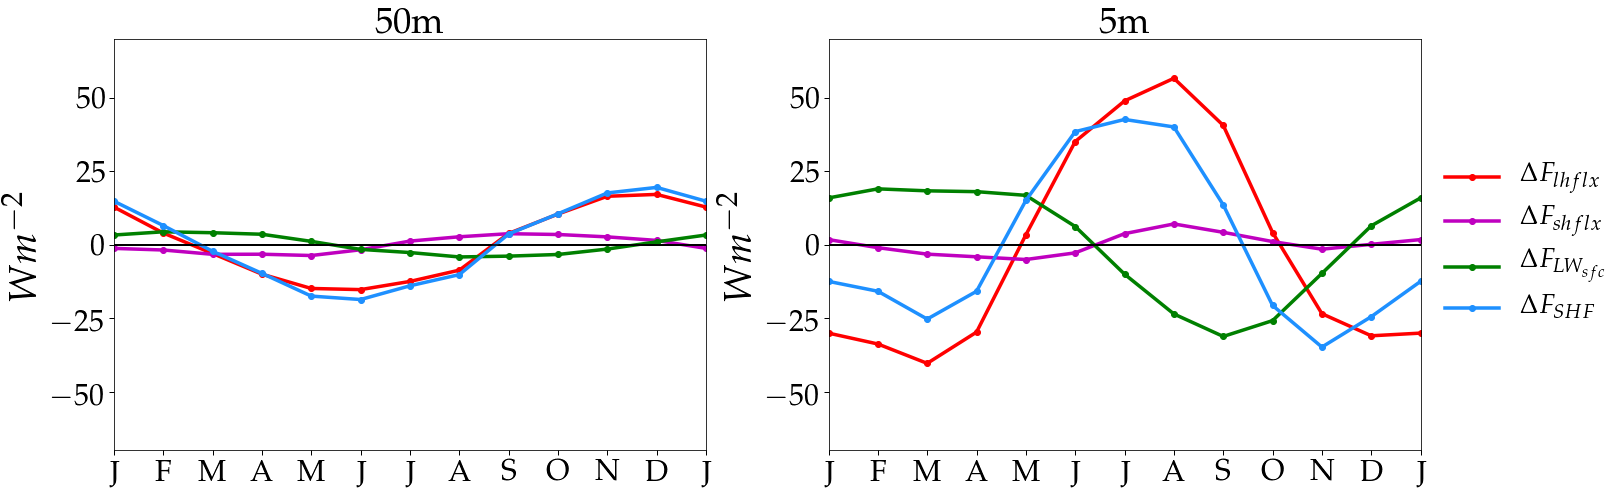

In [177]:
py.figure(figsize=(20,7))
i=0; l=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_sfc_toa_dhdt(d,P_lhflx,'r',r'$\Delta F_{lhflx}$',month_to_month=0,l=60)
    compare_sfc_toa_dhdt(d,P_shflx,'m',r'$\Delta F_{shflx}$',month_to_month=0,l=60)
    compare_sfc_toa_dhdt(d,P_SHF-(P_lhflx+P_shflx),'g', r'$\Delta F_{LW_{sfc}}$' ,month_to_month=0,l=60)
    compare_sfc_toa_dhdt(d,P_SHF,  'dodgerblue', r'$\Delta F_{SHF}$' ,month_to_month=0,l=70)
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     py.title("(a)", x=0.0, fontsize=37)
#     py.title("50m", x=0.5, fontsize=37)
py.tight_layout()
# py.savefig('Sep8/SHF_decompose.pdf',bbox_inches='tight')

In [178]:
I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)


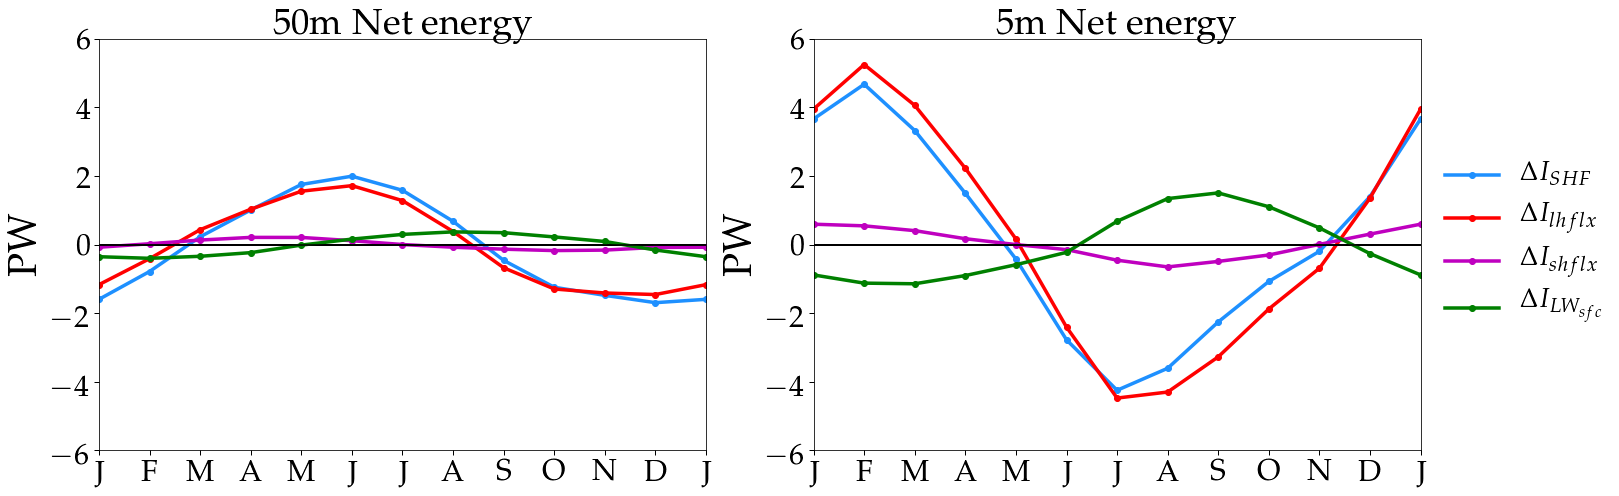

In [179]:
py.figure(figsize=(20,7))
i=0; L=6
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,I_SHF, 'dodgerblue',r'$\Delta I_{SHF}$'    ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_lhflx,'r',r'$\Delta I_{lhflx}$'     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_shflx,'m',r'$\Delta I_{shflx}$'     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_LWsfc,'g',r'$\Delta I_{LW_{sfc}}$'     ,month_to_month=0,l=L,ylab='PW')
#     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
#     py.ylim(-2.2,2.2)
py.tight_layout() 
# py.savefig('Sep16/shf_decomp_5m_50m.pdf',bbox_inches='tight')


In [180]:
def compare_swabs_shf_olr1(de,X,c,T,month_to_month=1,l=3, ylab=r'$PW$', ls='-'):
    d            = np.squeeze(np.where(np.array(depth_values)==de))
    depth=depth_values[d]
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']            
    py.plot(range(13),D(X[:]),'o'+ls ,color=c,label=T,lw=3.5)
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel(ylab,fontsize=40)
#     if depth==50 :
#         py.legend(loc="best",fontsize=29,ncol=2,frameon=False)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title('50m - 5m'+' (Isca)',fontsize=37)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.xlim(0,12)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


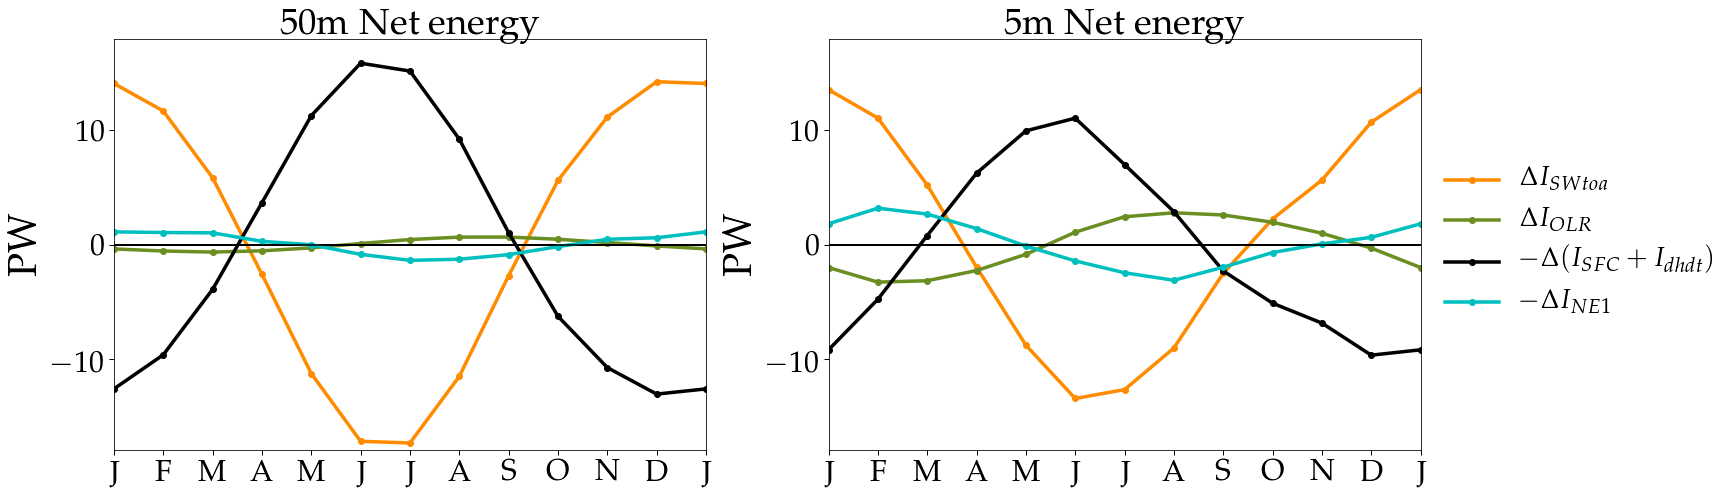

In [181]:
py.figure(figsize=(20,7))
i=0; L=18
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    compare_swabs_shf_olr(d,I_SWtoa,        'darkorange',r'$\Delta I_{SWtoa}$'      ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,-I_OLR,         'olivedrab',r'$\Delta I_{OLR}$'      ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr(d,I_SFC-I_dhdt,   'k',r'$-\Delta (I_{SFC}+I_{dhdt})$'             ,month_to_month=0,l=L,ylab='PW')
#    compare_swabs_shf_olr(d,I_NE,           'm',r'$-\Delta I_{NE}$'              ,month_to_month=0,l=L,ylab='PW')    
    compare_swabs_shf_olr(d,Intensity_ne,   'c',r'$-\Delta I_{NE1}$'              ,month_to_month=0,l=L,ylab='PW')    

    #     compare_swabs_shf_olr(d,I_SWAB+I_SHF-I_OLR-I_dhdt,'c',r'$-\Delta I_{EIA}$'           ,month_to_month=0,l=6,ylab='PW')
    if d==5:
        py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
    py.ylim(-L,L)
py.tight_layout() 
# py.savefig('May8/shf_olr_50m.pdf',bbox_inches='tight')

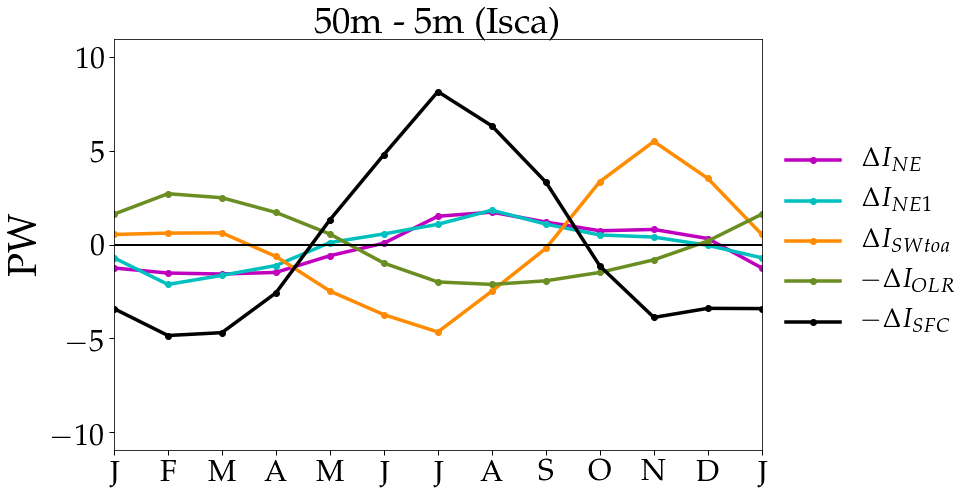

In [182]:
def DIF(y):
    return y[-4,...]-y[1,...] 

py.figure(figsize=(20,7))
i=0; L=11
x=0;

#Intensity_ne
for d in [50]:
    i=i+1
    py.subplot(1,2,i)
#    compare_swabs_shf_olr(d, I_te[:,x,:],  'r',r'$\Delta I$'                     ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr1(d, DIF(I_NE),  'm',r'$\Delta I_{NE}$'                     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d, DIF(Intensity_ne),  'c',r'$\Delta I_{NE1}$'                     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d, DIF(I_SWtoa), 'darkorange',r'$\Delta I_{SWtoa}$'          ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d,-DIF(I_OLR), 'olivedrab',r'$-\Delta I_{OLR}$'            ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d,DIF(I_SFC-I_dhdt),'k',r'$- \Delta I_{SFC}$'            ,month_to_month=0,l=L,ylab='PW')
#     if d==5:
    py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
py.tight_layout() 

source= "/project2/tas1/pragallva/Winter_quarter_2019/codes/python_scripts/miscellaneous/Paper_figures_ISCA/Sep8/"
#py.savefig(source+'Isca_storage_SW_OLR_NE_diff.pdf',bbox_inches='tight')


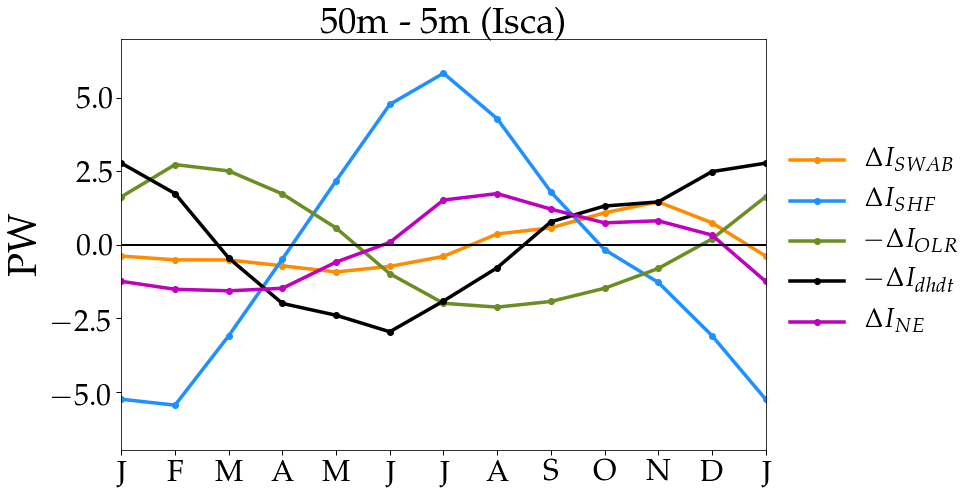

In [183]:
def DIF(y):
    return y[-4,...]-y[1,...] 

py.figure(figsize=(20,7))
i=0; L=7
x=0;
for d in [50]:
    i=i+1
    py.subplot(1,2,i)
#    compare_swabs_shf_olr(d, I_te[:,x,:],  'r',r'$\Delta I$'                     ,month_to_month=0,l=6,ylab='PW')
    compare_swabs_shf_olr1(d, DIF(I_SWAB),  'darkorange',r'$\Delta I_{SWAB}$'                     ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d, DIF(I_SHF), 'dodgerblue',r'$\Delta I_{SHF}$'          ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d,-DIF(I_OLR), 'olivedrab',r'$-\Delta I_{OLR}$'            ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d,DIF(-I_dhdt),'k',r'$- \Delta I_{dhdt}$'            ,month_to_month=0,l=L,ylab='PW')
    compare_swabs_shf_olr1(d,DIF(I_NE),'m',r'$ \Delta I_{NE}$'            ,month_to_month=0,l=L,ylab='PW')
#     if d==5:
    py.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=27,ncol=1,frameon=False)
#     I_dhdt
py.tight_layout() 

source= "/project2/tas1/pragallva/Winter_quarter_2019/codes/python_scripts/miscellaneous/Paper_figures_ISCA/Sep8/"
# py.savefig(source+'Isca_storage_SW_OLR_NE_diff.pdf',bbox_inches='tight')


In [184]:
LAT = 46
ind = ((lat_a>LAT) & (lat_a<LAT+0.1))
Ts  = CpTv_a[[1,-4],ind,0,:]/1000.0
SW  = SW_toa_a[[1,-4],ind,:]

storms   = Intensity_te[[1,-4],:]

delta_Ts = Ts-Ts[...,-1].mean(axis=-1)[...,None]
delta_SW = SW-SW[...,-1].mean(axis=-1)[...,None]
delta_storms = storms-storms[...,-1].mean(axis=-1)[...,None]

days = np.array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300., 330.])

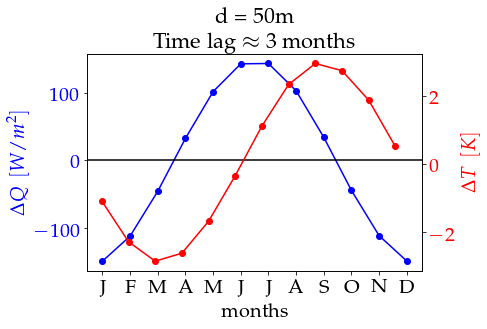

In [185]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
days= range(12)
d=1
fig, ax1 = py.subplots()
ax2 = ax1.twinx()
ax1.plot(days, delta_SW[d,:-1]-150,'o-',color='b')
#ax1.axvline(days[5],color='b')
ax1.set_xlabel('months', fontsize=20)
ax1.set_ylabel(r'$\Delta Q \:\: [W/m^2]$', color='b', fontsize=20)
ax1.tick_params(axis='y', labelcolor='b', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.axhline(0,color='k')

ax2.plot(days, np.roll(delta_Ts[d,:-1]-5.5,0),'o-',color='r')
#ax2.axvline(days[8], color='r')
ax2.set_xlabel('months', fontsize=20)
ax2.set_ylabel(r'$\Delta T \:\: [K]$', color='r', fontsize=20)
ax2.tick_params(axis='y', labelcolor='r', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),0)
py.xticks(range(13), (mticks),fontsize=15)

py.title('d = 50m \n Time lag'+r' $\approx$ 3 months', fontsize=22)
py.savefig('Sep8/50m_Isca_temp_lag.pdf',bbox_inches='tight')

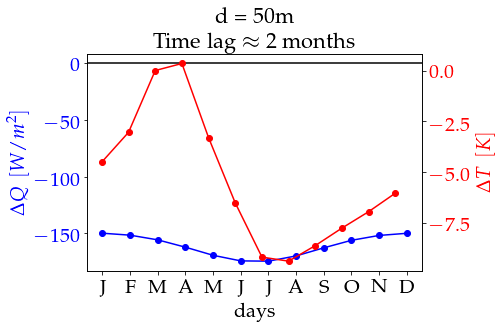

In [191]:
days = range(12)
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
d=0
fig, ax1 = py.subplots()
ax2 = ax1.twinx()
ax1.plot(days, delta_SW[d,:-1]-150,'o-',color='b')
#ax1.axvline(days[6],color='b')
ax1.set_xlabel('days', fontsize=20)
ax1.set_ylabel(r'$\Delta Q \:\: [W/m^2]$', color='b', fontsize=20)
ax1.tick_params(axis='y', labelcolor='b', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.axhline(0,color='k')

ax2.plot(days, np.roll(delta_Ts[d,:-1]-5,0),'o-',color='r')
#ax2.axvline(days[8], color='r')
ax2.set_xlabel('months', fontsize=20)
ax2.set_ylabel(r'$\Delta T \:\: [K]$', color='r', fontsize=20)
ax2.tick_params(axis='y', labelcolor='r', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D']),0)
py.xticks(range(13), (mticks),fontsize=15)

py.title('d = 50m \n Time lag'+r' $\approx$ 2 months', fontsize=22)
#py.savefig('Sep8/5m_Isca_temp_lag.pdf',bbox_inches='tight')


In [187]:
ISW_toa_a.shape

(12, 870, 13)

In [188]:
LAT = 46
ind = ((lat_a[:-1]>LAT) & (lat_a[:-1]<LAT+0.1))
Ts  = TE_a[:,:-1,:][[1,-4],ind,:]
SW  = ISW_toa_a[[1,-4],ind,:]

delta_Ts = Ts-Ts[...,-1].mean(axis=-1)[...,None]
delta_SW = SW-SW[...,-1].mean(axis=-1)[...,None]
delta_storms = storms-storms[...,-1].mean(axis=-1)[...,None]

days = np.array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300., 330.])

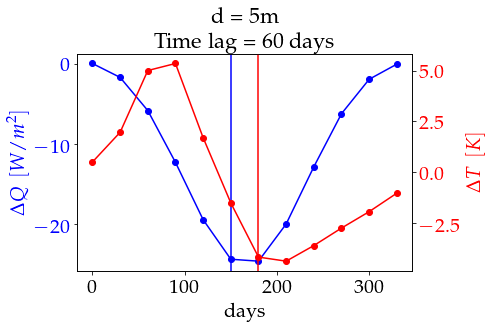

In [189]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
d=0
fig, ax1 = py.subplots()
ax2 = ax1.twinx()
ax1.plot(days, delta_SW[d,:-1],'o-',color='b')
ax1.axvline(days[5],color='b')
ax1.set_xlabel('days', fontsize=20)
ax1.set_ylabel(r'$\Delta Q \:\: [W/m^2]$', color='b', fontsize=20)
ax1.tick_params(axis='y', labelcolor='b', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

ax2.plot(days, np.roll(delta_Ts[d,:-1],0),'o-',color='r')
ax2.axvline(days[6],color='r')
ax2.set_xlabel('days', fontsize=20)
ax2.set_ylabel(r'$\Delta T \:\: [K]$', color='r', fontsize=20)
ax2.tick_params(axis='y', labelcolor='r', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
py.title('d = 5m \n Time lag = %1d days'%(days[8]-days[6]), fontsize=22)

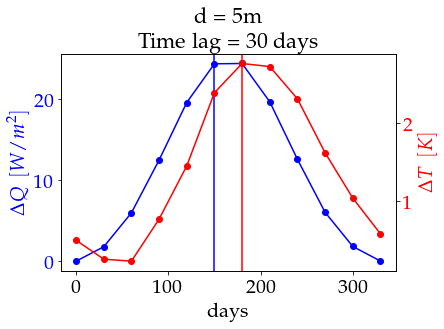

In [190]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')
d=1
fig, ax1 = py.subplots()
ax2 = ax1.twinx()
ax1.plot(days, -delta_SW[d,:-1],'o-',color='b')
ax1.axvline(days[5],color='b')
ax1.set_xlabel('days', fontsize=20)
ax1.set_ylabel(r'$\Delta Q \:\: [W/m^2]$', color='b', fontsize=20)
ax1.tick_params(axis='y', labelcolor='b', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

ax2.plot(days, np.roll(-delta_Ts[d,:-1],0),'o-',color='r')
ax2.axvline(days[6],color='r')
ax2.set_xlabel('days', fontsize=20)
ax2.set_ylabel(r'$\Delta T \:\: [K]$', color='r', fontsize=20)
ax2.tick_params(axis='y', labelcolor='r', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
py.title('d = 5m \n Time lag = %1d days'%(days[6]-days[5]), fontsize=22)